In [21]:
# Pytorch
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
# External
import BatchMaker
import numpy as np
import PIL
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
# Built-Ins
import math
import random
import time
import os
import glob
# Version control
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.5.0
Torchvision Version:  0.6.0


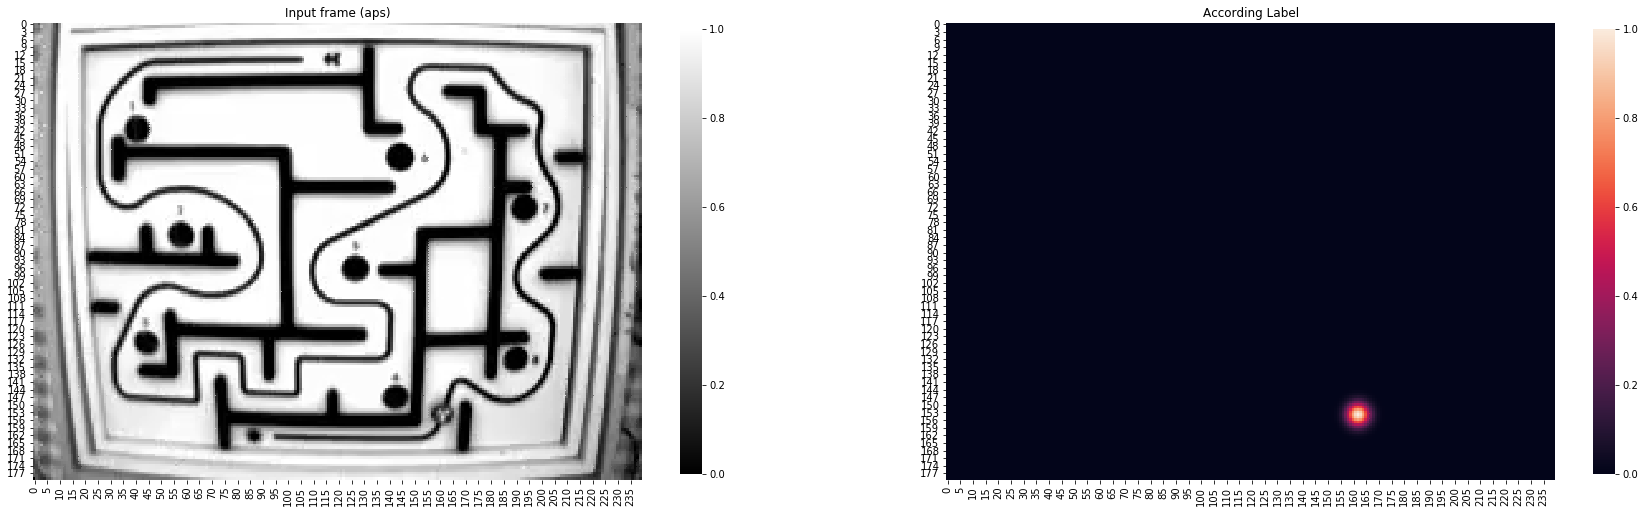

In [16]:
# Visualize the Data
fig = plt.figure(figsize = (30,30))
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Input frame (aps)')
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('According Label')

x = Image.open('Data/Dataset_036/frames/frame0253.png').getchannel(0)
y = Image.open('Data/Dataset_036/labels/label-0253.png')

x = TF.to_tensor(x)
y = TF.to_tensor(y)

sns.heatmap(x[0], cmap='gray', vmin=0, vmax=1, ax=ax1, square=True, cbar_kws={'shrink': .6})
sns.heatmap(y[0], ax=ax2, square=True, cbar_kws={'shrink': .6})
plt.show()

In [22]:
batch_size = 1

path_file = "data.csv"

train_inputs, train_labels, val_inputs, val_labels = BatchMaker.BatchMaker(path_file)


transform = transforms.Compose([
    transforms.ToPILImage(),
#     transforms.Resize((165, 220)),
    transforms.RandomRotation(degrees=random.randint(0,360)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),

])

class CreateDataset(Dataset):
    def __init__(self, inputs, labels, transform=transform):
        self.inputs = torch.FloatTensor(inputs)
        self.labels = torch.FloatTensor(labels)

        self.transform = transform
        
    def __getitem__(self, index):
        x = self.inputs[index]
        y = self.labels[index]
        
        if self.transform:
            seed = np.random.randint(2147483647) 
            random.seed(seed)

            x = self.transform(x)
            if random.random() > 0.5:
                x = TF.adjust_brightness(x, random.uniform(0.4,0.6))

            if random.random() > 0.5:
                x = TF.adjust_contrast(x, random.uniform(0.4,0.6))
            x = TF.to_tensor(x)

            random.seed(seed)
            y = self.transform(y)
            y = TF.to_tensor(y)
            
        y = y/np.sum(np.array(y))
        
        return x.view(3,180,240), y.view(1,180,240)

    def __len__(self):
        return len(self.inputs)

    
# Get the data, transform it
data = {
   'train':
   CreateDataset(train_inputs, train_labels),
   'val':
   CreateDataset(val_inputs, val_labels, transform=None),
#     'test':
#    CreateDataset(test_inputs, test_labels, transform=None)
}

# Load Data in batches, shuffled
dataloaders = {
   'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True, drop_last=True),
   'val': DataLoader(data['val'], batch_size=batch_size, shuffle=False, drop_last=True),
#     'test': DataLoader(data['test'], batch_size=batch_size, shuffle=False, drop_last=True),
}

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Dataset_421/locations.txt'

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(64))
    
        self.layer2 = nn.Sequential( 
            nn.Conv2d(64, 64,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(64))
        
        self.layer3 = nn.Sequential(
            nn.MaxPool2d(2, stride=2, padding=0))
            
        self.layer4 = nn.Sequential(
            nn.Conv2d(64,128,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(128))

        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 128,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(128))
            
        self.layer6 = nn.Sequential(
            nn.MaxPool2d(2, stride=2, padding=0))
            
        self.layer7 = nn.Sequential(
            nn.Conv2d(128, 256,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(256))
            
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 256,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(256))
            
        self.layer9 = nn.Sequential(
            nn.Conv2d(256, 256,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(256))
            
        self.layer10 = nn.UpsamplingBilinear2d(scale_factor=2)
            
        self.layer11 = nn.Sequential(
            nn.Conv2d(256, 128,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(128))
            
        self.layer12 = nn.Sequential(
            nn.Conv2d(128, 128,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(128))
            
        self.layer13 = nn.Sequential(
            nn.Conv2d(128, 128,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(128))
            
        self.layer14 = nn.UpsamplingBilinear2d(scale_factor=2)
            
        self.layer15 = nn.Sequential(
            nn.Conv2d(128, 64,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(64))
            
        self.layer16 = nn.Sequential(
            nn.Conv2d(64, 64,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(64))
            
        self.layer17 = nn.Sequential(
            nn.Conv2d(64, 1,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(),
            nn.BatchNorm2d(1))
        
        self.layer18 = nn.Softmax(dim=1)
            
            
    def forward(self,x):
        x = self.layer1(x)  
        x = self.layer2(x)  
        x = self.layer3(x)  
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)  
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.layer9(x)  
        x = self.layer10(x)  
        x = self.layer11(x)  
        x = self.layer12(x)  
        x = self.layer13(x)  
        x = self.layer14(x)  
        x = self.layer15(x)  
        x = self.layer16(x)
        x = self.layer17(x) 
        x = x.view(1, -1)
        x = self.layer18(x)
        x = x.reshape(1, 180, 240)
        
        return x

In [10]:
# Check if GPU is available and move the model over to GPU
if torch.cuda.is_available():
    device = torch.device("cuda: 0")
    gpu_name = torch.cuda.get_device_name()
    print(f"Running on your {gpu_name} (GPU)")
else:
    device = torch.device("cpu")
    print("Running on your CPU")

net = CNN().to(device)

Running on your GeForce GTX 1080 (GPU)


In [11]:
# Define the Loss function: LAD-Loss + distance factor
def distance(output, target):
    center_output = np.where(output==np.amax(output))
    center_target = np.where(target==np.amax(target))
    
    if center_target[0].size == 0:
        return 1
    else:
        try:
            x1 = center_output[1][0]
            y1 = center_output[0][0]
            x2 = center_target[1][0]
            y2 = center_target[0][0]

            distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            return distance
        except:
            print(center_target[0])

loss_fn = nn.L1Loss(reduction='sum')

In [14]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 20
epochs_no_improve_limit = 5
plot_heatmaps = False


train_losses = []
val_losses = []
def train():
    epochs_no_improve = 0
    min_val_loss = np.Inf
    since = time.time()
    iteration = 0
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))
        print('-' * 10)
        val_loss = 0
        train_loss = 0
        num = 10
        
        for train_inputs, train_labels in dataloaders['train']:            
                optimizer.zero_grad()
                output = net(torch.from_numpy(np.array(train_inputs)).to(device))
                loss = loss_fn(output[0].cpu(), torch.from_numpy(np.array(train_labels)[0]).cpu())*4*(distance(output[0].cpu().detach().numpy(), np.array(train_labels)[0][0])/8)
                train_loss += loss

                if plot_heatmaps:
                    fig = plt.figure(figsize = (32,24))
                    ax1 = fig.add_subplot(3, 3, 1)
                    ax1.set_title('Input frame (aps)')
                    ax2 = fig.add_subplot(3, 3, 2)
                    ax2.set_title('Label')
                    ax3 = fig.add_subplot(3, 3, 3)
                    ax3.set_title('Output of the FCN')
                    sns.heatmap(train_inputs[0][0], vmin=0, vmax=1, cmap='gray', ax=ax1, cbar_kws={'shrink': .9})
                    try:
                        sns.heatmap(train_labels[0][0], ax=ax2, cbar_kws={'shrink': .9})
                    except ValueError:  #raised if `train_labels` is empty.
                        pass
                    
                    sns.heatmap(output[0].cpu().detach().numpy(), ax=ax3, cbar_kws={'shrink': .9})
                    plt.show()

                print('Training Loss: {:.4f}'.format(loss.item()))
                loss.backward()
                optimizer.step()
                train_losses.append(float(loss))
                iteration += 1
        
        with torch.no_grad():
            for val_inputs, val_labels in dataloaders['val']:
                
                output = net(torch.from_numpy(np.array(val_inputs)).to(device))
                loss = loss_fn(output[0].cpu(), torch.from_numpy(np.array(val_labels)[0][0]).cpu())*(distance(output[0].cpu().detach().numpy(), np.array(val_labels)[0][0])/4)
                val_loss += loss

            val_loss = val_loss / len(dataloaders['val'])
            val_losses.append(float(val_loss))
            print('-' * 10)
            print('Validation Loss: {:.4f}'.format(val_loss))

            if val_loss < min_val_loss:
                torch.save({'state_dict': net.state_dict()}, 'Nets/pt-labi_CNN.pt')
                epochs_no_improve = 0
                min_val_loss = val_loss
            else:
                epochs_no_improve += 1
                if epochs_no_improve == epochs_no_improve_limit:
                    print('Early stopping initiated')
                    model = torch.load('Nets/pt-labi_CNN.pt')
                    print('Best model so far has been loaded')

    print('Least validation Loss: {:4f}'.format(min_val_loss))
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Finished training')
train()

Epoch 1/20
----------
Training Loss: 1.0075
Training Loss: 1.3012
Training Loss: 3.3180
Training Loss: 138.5856
Training Loss: 1.4546
Training Loss: 0.8493
Training Loss: 71.3930
Training Loss: 0.3020
Training Loss: 72.8717
Training Loss: 1.0643
Training Loss: 3.5924
Training Loss: nan
Training Loss: 165.2981
Training Loss: 2.1564
Training Loss: 1.1581
Training Loss: 1.5857
Training Loss: 36.0013
Training Loss: 1.8317
Training Loss: 0.3928
Training Loss: 2.4059
Training Loss: 1.0775
Training Loss: 2.6006
Training Loss: 3.0679
Training Loss: 0.0000
Training Loss: 1.0829
Training Loss: 1.4557
Training Loss: 1.8284
Training Loss: 89.0981
Training Loss: 68.1944
Training Loss: 118.9335
Training Loss: 2.2865
Training Loss: 3.0877
Training Loss: 0.2581
Training Loss: 1.0986
Training Loss: 2.3337
Training Loss: 1.6930
Training Loss: 2.4836
Training Loss: 0.7894
Training Loss: 3.3731
Training Loss: 5.3369
Training Loss: 3.8237
Training Loss: 1.0262
Training Loss: 0.2079
Training Loss: 4.4692
Tr

Training Loss: 84.0336
Training Loss: 0.8529
Training Loss: 1.0619
Training Loss: 2.1510
Training Loss: 1.0964
Training Loss: 1.7142
Training Loss: 213.4842
Training Loss: 160.7584
Training Loss: 2.5601
Training Loss: 2.7181
Training Loss: 0.4265
Training Loss: 0.5318
Training Loss: 1.6667
Training Loss: 2.3329
Training Loss: 3.4653
Training Loss: 1.0674
Training Loss: 4.9964
Training Loss: 3.4143
Training Loss: nan
Training Loss: 5.2909
Training Loss: 125.7989
Training Loss: 0.3289
Training Loss: 192.8340
Training Loss: 1.7165
Training Loss: 2.7098
Training Loss: 4.9332
Training Loss: 2.0141
Training Loss: 5.5923
Training Loss: 5.5247
Training Loss: 0.8556
Training Loss: 1.6805
Training Loss: nan
Training Loss: 82.7467
Training Loss: 121.7440
Training Loss: 49.3160
Training Loss: 220.8395
Training Loss: 198.2447
Training Loss: 133.5102
Training Loss: 1.6421
Training Loss: 4.7225
Training Loss: 2.2479
Training Loss: 3.9868
Training Loss: 0.9834
Training Loss: 3.7113
Training Loss: 1.03

Training Loss: 0.3941
Training Loss: 1.3748
Training Loss: 2.1606
Training Loss: 1.1615
Training Loss: 2.0225
Training Loss: 169.7716
Training Loss: 1.2232
Training Loss: 0.8953
Training Loss: 129.8589
Training Loss: 3.3683
Training Loss: 1.1938
Training Loss: nan
Training Loss: 2.0053
Training Loss: 1.7436
Training Loss: 1.2350
Training Loss: 0.3251
Training Loss: 0.7787
Training Loss: 1.2772
Training Loss: 2.7215
Training Loss: 1.0203
Training Loss: 161.7072
Training Loss: 2.5204
Training Loss: 4.7852
Training Loss: 5.4754
Training Loss: 1.5865
Training Loss: 0.3447
Training Loss: 0.5262
Training Loss: 3.0223
Training Loss: 2.3965
Training Loss: 2.0991
Training Loss: 2.2846
Training Loss: 1.3506
Training Loss: 0.6935
Training Loss: 2.4252
Training Loss: 6.2792
Training Loss: 187.0273
Training Loss: 116.3918
Training Loss: 0.7991
Training Loss: 1.4753
Training Loss: 2.0609
Training Loss: 2.1266
Training Loss: 72.6229
Training Loss: 181.0930
Training Loss: 0.7391
Training Loss: 2.0343


Training Loss: nan
Training Loss: 5.3538
Training Loss: 6.4773
Training Loss: 1.8641
Training Loss: 3.8360
Training Loss: 54.4234
Training Loss: 5.4133
Training Loss: 3.9004
Training Loss: 4.8655
Training Loss: 6.4196
Training Loss: 108.6861
Training Loss: 7.9261
Training Loss: 4.1955
Training Loss: 2.0123
Training Loss: 2.1083
Training Loss: 3.2238
Training Loss: 2.9195
Training Loss: 8.1999
Training Loss: 2.8155
Training Loss: 3.2130
Training Loss: 1.7421
Training Loss: nan
Training Loss: 1.6644
Training Loss: 2.0588
Training Loss: 3.1784
Training Loss: 2.8216
Training Loss: 0.0000
Training Loss: 6.2372
Training Loss: 0.4673
Training Loss: 191.1855
Training Loss: 1.1370
Training Loss: 3.8839
Training Loss: 2.8769
Training Loss: 2.6611
Training Loss: 5.0467
Training Loss: 5.0935
Training Loss: 0.4779
Training Loss: 1.2463
Training Loss: 3.6416
Training Loss: 77.0552
Training Loss: 1.3170
Training Loss: 4.2868
Training Loss: 1.7838
Training Loss: 2.3599
Training Loss: 2.1688
Training L

Training Loss: 0.4249
Training Loss: 1.0973
Training Loss: 114.3100
Training Loss: 1.7114
Training Loss: 0.4258
Training Loss: 0.7161
Training Loss: 0.8486
Training Loss: 1.4139
Training Loss: 15.8080
Training Loss: 1.6766
Training Loss: 0.2932
Training Loss: 1.7955
Training Loss: 1.6487
Training Loss: 1.3278
Training Loss: 0.8310
Training Loss: 0.4251
Training Loss: 2.6608
Training Loss: 1.2409
Training Loss: 1.6868
Training Loss: 0.8007
Training Loss: 4.0981
Training Loss: 0.7769
Training Loss: 0.5143
Training Loss: 1.0961
Training Loss: 3.6070
Training Loss: 0.7612
Training Loss: 0.5819
Training Loss: 0.2370
Training Loss: 0.2815
Training Loss: 1.4485
Training Loss: 105.7172
Training Loss: 1.1833
Training Loss: 2.5236
Training Loss: 1.9216
Training Loss: nan
Training Loss: 1.0758
Training Loss: 1.2084
Training Loss: 1.1235
Training Loss: 0.8702
Training Loss: 2.5062
Training Loss: 0.2551
Training Loss: 1.2371
Training Loss: 1.7728
Training Loss: 1.1737
Training Loss: 1.8655
Training

Training Loss: 0.5954
Training Loss: 1.1302
Training Loss: 93.0872
Training Loss: 1.6218
Training Loss: 1.5537
Training Loss: 2.0726
Training Loss: 0.0000
Training Loss: 1.2240
Training Loss: 1.0333
Training Loss: 0.2190
Training Loss: 2.1253
Training Loss: 0.5502
Training Loss: 0.7990
Training Loss: 3.0010
Training Loss: 1.5565
Training Loss: 1.2783
Training Loss: 1.7770
Training Loss: 42.4375
Training Loss: 0.5374
Training Loss: 1.2955
Training Loss: nan
Training Loss: 0.0000
Training Loss: 1.8259
Training Loss: 0.5939
Training Loss: 1.9837
Training Loss: 1.4989
Training Loss: 0.7171
Training Loss: 1.8516
Training Loss: 2.7049
Training Loss: 3.2916
Training Loss: 1.1428
Training Loss: 0.2550
Training Loss: 1.3002
Training Loss: 0.6214
Training Loss: 1.5856
Training Loss: 1.2464
Training Loss: 1.6257
Training Loss: 1.5190
Training Loss: 4.4438
Training Loss: 0.2110
Training Loss: 1.4719
Training Loss: 1.9939
Training Loss: 4.2598
Training Loss: 0.2467
Training Loss: 0.8930
Training Lo

Training Loss: 1.9120
Training Loss: 1.7584
Training Loss: 0.6219
Training Loss: 0.2763
Training Loss: 0.3062
Training Loss: 4.3216
Training Loss: 2.2006
Training Loss: 120.7232
Training Loss: 2.9007
Training Loss: 0.2767
Training Loss: 1.3018
Training Loss: 2.1218
Training Loss: 0.3695
Training Loss: 126.5829
Training Loss: 0.9362
Training Loss: 224.7243
Training Loss: 0.8886
Training Loss: 0.7831
Training Loss: 0.0000
Training Loss: 1.7798
Training Loss: 1.7328
Training Loss: 167.5248
Training Loss: 3.3517
Training Loss: nan
Training Loss: 3.6322
Training Loss: 3.1295
Training Loss: 0.8476
Training Loss: 2.5558
Training Loss: 0.8961
Training Loss: 2.3609
Training Loss: 2.7089
Training Loss: 1.6295
Training Loss: 0.8611
Training Loss: 0.9367
Training Loss: 1.1659
Training Loss: 163.8562
Training Loss: 1.8050
Training Loss: 1.3096
Training Loss: 0.7694
Training Loss: 131.2685
Training Loss: 1.5946
Training Loss: 1.0744
Training Loss: 0.7893
Training Loss: 1.4975
Training Loss: 58.8281


Training Loss: 1.6412
Training Loss: 2.2784
Training Loss: 0.2692
Training Loss: 1.9677
Training Loss: 0.2522
Training Loss: 5.9358
Training Loss: 0.9034
Training Loss: 117.9721
Training Loss: 1.8843
Training Loss: 0.9493
Training Loss: 2.0525
Training Loss: 193.6324
Training Loss: 0.0000
Training Loss: 2.5263
Training Loss: 0.7480
Training Loss: 3.1767
Training Loss: 56.6481
Training Loss: 2.7907
Training Loss: 1.4072
Training Loss: 0.9075
Training Loss: 1.0525
Training Loss: 3.5561
Training Loss: 1.4237
Training Loss: 1.5945
Training Loss: 5.8212
Training Loss: 2.7525
Training Loss: 1.4251
Training Loss: 1.4236
Training Loss: 0.2509
Training Loss: 1.4320
Training Loss: 0.9102
Training Loss: 0.4415
Training Loss: 3.5830
Training Loss: 2.2359
Training Loss: 3.4040
Training Loss: 0.7219
Training Loss: 2.8473
Training Loss: 4.7160
Training Loss: 123.8461
Training Loss: 0.4963
Training Loss: 36.0680
Training Loss: 2.0873
Training Loss: 1.9120
Training Loss: 2.6739
Training Loss: 1.5826
Tr

Training Loss: 0.1526
Training Loss: 1.2930
Training Loss: 0.3600
Training Loss: 2.3810
Training Loss: 0.2975
Training Loss: 0.6505
Training Loss: 0.0938
Training Loss: nan
Training Loss: 0.6632
Training Loss: 2.7885
Training Loss: 0.0000
Training Loss: 1.0278
Training Loss: 0.0000
Training Loss: 116.4256
Training Loss: 0.9105
Training Loss: 0.2653
Training Loss: 0.5650
Training Loss: 0.5588
Training Loss: 1.8591
Training Loss: 183.5938
Training Loss: 1.4707
Training Loss: 0.4172
Training Loss: 2.0473
Training Loss: 0.9732
Training Loss: 0.2114
Training Loss: 0.7380
Training Loss: 0.7373
Training Loss: 1.5227
Training Loss: 2.6943
Training Loss: 0.3279
Training Loss: 3.4324
Training Loss: 1.0988
Training Loss: 1.0147
Training Loss: 0.6729
Training Loss: 1.1177
Training Loss: 6.0564
Training Loss: 0.2423
Training Loss: 0.0955
Training Loss: 0.3181
Training Loss: 1.4449
Training Loss: 2.0367
Training Loss: 1.1038
Training Loss: 0.4003
Training Loss: 0.3675
Training Loss: 0.8890
Training 

Training Loss: 1.7743
Training Loss: 2.3656
Training Loss: 21.4979
Training Loss: 3.9476
Training Loss: 0.0000
Training Loss: 5.6526
Training Loss: 1.4595
Training Loss: 174.8833
Training Loss: 3.4726
Training Loss: 5.7781
Training Loss: 5.8561
Training Loss: 3.8321
Training Loss: 7.2611
Training Loss: 0.8845
Training Loss: nan
Training Loss: 4.9965
Training Loss: 1.0550
Training Loss: 0.8570
Training Loss: 8.1782
Training Loss: 0.4471
Training Loss: 2.9249
Training Loss: 119.5553
Training Loss: 4.5461
Training Loss: 200.6691
Training Loss: nan
Training Loss: 0.7186
Training Loss: 0.0000
Training Loss: 1.5883
Training Loss: 4.5580
Training Loss: 113.5727
Training Loss: 2.9912
Training Loss: 2.9759
Training Loss: 0.5994
Training Loss: 3.1353
Training Loss: 1.4081
Training Loss: 51.6843
Training Loss: 1.7089
Training Loss: 3.4578
Training Loss: 0.8582
Training Loss: 0.8249
Training Loss: 1.1621
Training Loss: 1.2750
Training Loss: 1.2557
Training Loss: 0.4626
Training Loss: 0.0000
Traini

Training Loss: 1.4123
Training Loss: 0.5746
Training Loss: 5.9575
Training Loss: 2.9329
Training Loss: 0.1530
Training Loss: 1.1024
Training Loss: 0.0000
Training Loss: 1.1176
Training Loss: 1.4298
Training Loss: 0.6606
Training Loss: 87.2057
Training Loss: 0.5058
Training Loss: 0.8899
Training Loss: 2.2427
Training Loss: 0.4527
Training Loss: 1.4907
Training Loss: 0.2181
Training Loss: 0.6442
Training Loss: 1.1463
Training Loss: 0.2262
Training Loss: 0.1925
Training Loss: 2.3882
Training Loss: 0.5924
Training Loss: 1.8842
Training Loss: 180.1479
Training Loss: 0.6435
Training Loss: 3.1873
Training Loss: nan
Training Loss: 0.7729
Training Loss: 1.3869
Training Loss: 15.0898
Training Loss: 116.4634
Training Loss: 0.5565
Training Loss: 0.3334
Training Loss: 0.3399
Training Loss: 0.3105
Training Loss: 0.7841
Training Loss: 0.3397
Training Loss: 0.6811
Training Loss: 0.6443
Training Loss: 0.9477
Training Loss: 2.2779
Training Loss: nan
Training Loss: 0.9205
Training Loss: 0.5839
Training L

Training Loss: 0.2545
Training Loss: 1.5931
Training Loss: 0.2705
Training Loss: 0.1973
Training Loss: 0.9002
Training Loss: 2.3155
Training Loss: 1.0330
Training Loss: 1.3982
Training Loss: 1.4366
Training Loss: 0.1006
Training Loss: 1.4408
Training Loss: 1.4577
Training Loss: 2.8458
Training Loss: 0.4818
Training Loss: nan
Training Loss: 0.4002
Training Loss: 0.6784
Training Loss: 0.2659
Training Loss: 1.4148
Training Loss: 0.2062
Training Loss: 1.4555
Training Loss: nan
Training Loss: 1.3075
Training Loss: 0.7145
Training Loss: 1.9758
Training Loss: 1.0474
Training Loss: 0.1382
Training Loss: 0.5568
Training Loss: 0.3439
Training Loss: 1.6520
Training Loss: 1.3084
Training Loss: nan
Training Loss: 0.5103
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.2954
Training Loss: 0.2556
Training Loss: 0.7134
Training Loss: 1.8127
Training Loss: 0.1412
Training Loss: 1.0692
Training Loss: 2.0603
Training Loss: 0.6915
Training Loss: 0.6389
Training Loss: 0.1954
Training Loss: 2.0905


Training Loss: 0.9798
Training Loss: 0.3264
Training Loss: 0.7003
Training Loss: 2.2354
Training Loss: 0.6716
Training Loss: 0.7078
Training Loss: 17.8733
Training Loss: 0.3705
Training Loss: nan
Training Loss: 0.3501
Training Loss: 1.6330
Training Loss: 0.2746
Training Loss: 1.7210
Training Loss: 108.2671
Training Loss: nan
Training Loss: 1.2895
Training Loss: 1.0982
Training Loss: 1.3152
Training Loss: 0.2697
Training Loss: 1.8751
Training Loss: 0.4187
Training Loss: 0.8308
Training Loss: 0.7734
Training Loss: 0.3575
Training Loss: 0.7500
Training Loss: 0.2288
Training Loss: 0.6943
Training Loss: 74.2245
Training Loss: 0.5293
Training Loss: 1.9995
Training Loss: 0.2669
Training Loss: 1.2191
Training Loss: 0.8147
Training Loss: 1.4491
Training Loss: 24.0202
Training Loss: 1.0240
Training Loss: 2.6469
Training Loss: 2.2587
Training Loss: 176.1407
Training Loss: 119.7180
Training Loss: 0.7723
Training Loss: 2.0193
Training Loss: 3.0566
Training Loss: 0.7061
Training Loss: 112.1920
Train

Training Loss: 0.3943
Training Loss: 1.4718
Training Loss: 18.5984
Training Loss: 2.8516
Training Loss: 1.6670
Training Loss: 0.8783
Training Loss: 0.9529
Training Loss: 1.3537
Training Loss: 0.3875
Training Loss: 2.3325
Training Loss: 0.5313
Training Loss: 0.1154
Training Loss: 1.8116
Training Loss: 0.3925
Training Loss: 1.4339
Training Loss: 0.9458
Training Loss: 1.8830
Training Loss: 0.8460
Training Loss: 1.1491
Training Loss: 1.0623
Training Loss: 0.5472
Training Loss: 1.0816
Training Loss: 1.2156
Training Loss: 0.2752
Training Loss: 0.6680
Training Loss: 0.6778
Training Loss: 0.2709
Training Loss: 1.0320
Training Loss: 0.2702
Training Loss: 0.2170
Training Loss: 1.1245
Training Loss: 188.1593
Training Loss: 0.6091
Training Loss: 0.5602
Training Loss: 0.9103
Training Loss: 0.6720
Training Loss: 34.5013
Training Loss: 1.8586
Training Loss: 0.2571
Training Loss: 2.0277
Training Loss: 2.2542
Training Loss: 0.6269
Training Loss: 0.2874
Training Loss: 0.2088
Training Loss: 0.3626
Traini

Training Loss: 0.4586
Training Loss: 1.4397
Training Loss: 0.6775
Training Loss: 1.0728
Training Loss: 0.5145
Training Loss: 2.1828
Training Loss: 0.3401
Training Loss: 2.6192
Training Loss: 1.9441
Training Loss: 0.0000
Training Loss: 2.4965
Training Loss: 2.7028
Training Loss: 1.4957
Training Loss: 1.9315
Training Loss: 0.8051
Training Loss: 0.6062
Training Loss: 1.1274
Training Loss: 0.6705
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 2.5244
Training Loss: 0.6690
Training Loss: 0.5970
Training Loss: 1.9374
Training Loss: 0.1669
Training Loss: 0.5923
Training Loss: 0.3024
Training Loss: 0.1997
Training Loss: 0.3020
Training Loss: 0.1364
Training Loss: 0.1999
Training Loss: 0.7550
Training Loss: 0.7366
Training Loss: 0.2876
Training Loss: 0.2568
Training Loss: 0.8538
Training Loss: 3.4260
Training Loss: 113.1551
Training Loss: 0.9838
Training Loss: 1.0880
Training Loss: 0.0000
Training Loss: 0.7065
Training Loss: 0.2419
Training Loss: 0.4088
Training Loss: 0.8835
Training

Training Loss: 2.3709
Training Loss: 0.8694
Training Loss: 0.1096
Training Loss: 0.2724
Training Loss: 0.4034
Training Loss: 0.2623
Training Loss: 0.0000
Training Loss: 39.8118
Training Loss: 89.4648
Training Loss: 1.9093
Training Loss: 0.4329
Training Loss: 0.2211
Training Loss: 2.2169
Training Loss: 1.0099
Training Loss: 0.2208
Training Loss: 1.7674
Training Loss: 0.2363
Training Loss: 0.2395
Training Loss: 0.5681
Training Loss: 1.3687
Training Loss: 192.2969
Training Loss: 1.3610
Training Loss: 0.1996
Training Loss: 0.8681
Training Loss: 0.4076
Training Loss: 0.5472
Training Loss: 0.3339
Training Loss: 0.1213
Training Loss: 179.8184
Training Loss: 0.4825
Training Loss: 0.2173
Training Loss: 3.0103
Training Loss: 1.5388
Training Loss: 3.7010
Training Loss: 1.9906
Training Loss: 0.3140
Training Loss: 147.3825
Training Loss: 2.8796
Training Loss: 1.6140
Training Loss: 1.0106
Training Loss: 0.8085
Training Loss: 4.5068
Training Loss: 0.4525
Training Loss: 0.9067
Training Loss: 0.8731
Tr

Training Loss: 0.9001
Training Loss: 0.4769
Training Loss: 0.2472
Training Loss: 0.0000
Training Loss: 0.0957
Training Loss: 0.2077
Training Loss: 1.1280
Training Loss: 1.1402
Training Loss: 1.0696
Training Loss: 0.7749
Training Loss: 0.2811
Training Loss: 1.1345
Training Loss: 1.1246
Training Loss: 0.3572
Training Loss: 47.8821
Training Loss: 0.3655
Training Loss: 1.4859
Training Loss: 1.0332
Training Loss: 0.2000
Training Loss: 26.4761
Training Loss: 2.4763
Training Loss: 0.7991
Training Loss: 0.6869
Training Loss: 0.1010
Training Loss: 0.7321
Training Loss: 66.3855
Training Loss: 1.0321
Training Loss: 1.7081
Training Loss: 0.2197
Training Loss: 0.6617
Training Loss: 0.2700
Training Loss: 0.4363
Training Loss: 0.8076
Training Loss: 1.6602
Training Loss: 1.5387
Training Loss: 0.6139
Training Loss: 1.3170
Training Loss: 0.3157
Training Loss: 0.7739
Training Loss: nan
Training Loss: 0.4860
Training Loss: 1.2810
Training Loss: 0.7521
Training Loss: 1.4825
Training Loss: 0.8750
Training L

Training Loss: 0.2057
Training Loss: 0.4149
Training Loss: 1.3263
Training Loss: 0.3359
Training Loss: 1.1066
Training Loss: 1.1061
Training Loss: 3.5527
Training Loss: 2.0524
Training Loss: 1.6520
Training Loss: 2.7423
Training Loss: 2.4867
Training Loss: 1.2735
Training Loss: 0.2439
Training Loss: 1.9326
Training Loss: 3.8637
Training Loss: 1.5168
Training Loss: 3.2863
Training Loss: 0.2382
Training Loss: 3.0171
Training Loss: 3.0351
Training Loss: 161.8858
Training Loss: 3.6788
Training Loss: 3.2768
Training Loss: 88.6824
Training Loss: 0.0000
Training Loss: 1.5332
Training Loss: 62.1233
Training Loss: 1.0173
Training Loss: 0.8123
Training Loss: 0.0000
Training Loss: 2.7527
Training Loss: 0.2707
Training Loss: 0.3783
Training Loss: 1.5410
Training Loss: 2.0525
Training Loss: 0.5824
Training Loss: 0.8560
Training Loss: 0.5418
Training Loss: 0.9347
Training Loss: nan
Training Loss: 1.6397
Training Loss: 0.9426
Training Loss: 0.7088
Training Loss: 0.6537
Training Loss: 0.2143
Training 

Training Loss: 0.5169
Training Loss: 0.6401
Training Loss: 0.3405
Training Loss: 0.3405
Training Loss: 0.8544
Training Loss: 2.1447
Training Loss: 0.3157
Training Loss: 0.5673
Training Loss: 14.1910
Training Loss: nan
Training Loss: 1.1064
Training Loss: 1.6423
Training Loss: 0.7883
Training Loss: 1.1565
Training Loss: 0.4491
Training Loss: 0.7680
Training Loss: 0.0000
Training Loss: 0.3332
Training Loss: 0.7227
Training Loss: 0.1589
Training Loss: 1.5767
Training Loss: 1.5335
Training Loss: 2.1191
Training Loss: 1.5813
Training Loss: 0.7443
Training Loss: 0.5859
Training Loss: 0.5255
Training Loss: 0.6653
Training Loss: 0.0000
Training Loss: 0.1220
Training Loss: 0.2159
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5762
Training Loss: 0.1349
Training Loss: 0.6548
Training Loss: 0.2171
Training Loss: 0.1538
Training Loss: 0.6417
Training Loss: 0.3243
Training Loss: 0.9502
Training Loss: 1.3575
Training Loss: 0.9957
Training Loss: 0.8147
Training Loss: 0.3530
Training Los

Training Loss: 0.6461
Training Loss: 39.2046
Training Loss: 1.4189
Training Loss: 0.8204
Training Loss: 0.5710
Training Loss: 1.0175
Training Loss: 0.1292
Training Loss: 2.2786
Training Loss: nan
Training Loss: 1.3589
Training Loss: 0.8461
Training Loss: 1.0113
Training Loss: 0.9653
Training Loss: 0.3010
Training Loss: 0.3216
Training Loss: 1.2577
Training Loss: 1.3848
Training Loss: 0.6845
Training Loss: 0.2036
Training Loss: 86.6974
Training Loss: 0.5714
Training Loss: 0.6385
Training Loss: 0.3961
Training Loss: 0.0000
Training Loss: 2.1524
Training Loss: 0.6305
Training Loss: 1.9667
Training Loss: 2.4379
Training Loss: 0.1629
Training Loss: 0.2452
Training Loss: 0.7167
Training Loss: 0.1791
Training Loss: nan
Training Loss: 0.2086
Training Loss: 0.2068
Training Loss: 0.0000
Training Loss: 0.3362
Training Loss: 0.3209
Training Loss: 0.7840
Training Loss: 0.2233
Training Loss: 0.1366
Training Loss: 0.1682
Training Loss: 0.1363
Training Loss: nan
Training Loss: 0.9918
Training Loss: 13

Training Loss: 2.3821
Training Loss: 0.8599
Training Loss: 3.2268
Training Loss: 1.8739
Training Loss: 0.6481
Training Loss: 0.4949
Training Loss: 0.3560
Training Loss: 3.0838
Training Loss: nan
Training Loss: 0.7474
Training Loss: 0.9668
Training Loss: 2.2218
Training Loss: 0.4179
Training Loss: 0.6488
Training Loss: 0.6457
Training Loss: 1.9315
Training Loss: 156.1949
Training Loss: 0.7286
Training Loss: 1.4491
Training Loss: 1.4708
Training Loss: 0.1625
Training Loss: 3.0177
Training Loss: 1.1043
Training Loss: 1.2877
Training Loss: 0.9245
Training Loss: 1.1426
Training Loss: 1.1950
Training Loss: 1.8648
Training Loss: 1.3926
Training Loss: 1.4177
Training Loss: 0.3733
Training Loss: 1.4241
Training Loss: 0.4593
Training Loss: 0.4888
Training Loss: 1.3368
Training Loss: 0.7629
Training Loss: 0.5815
Training Loss: 1.7331
Training Loss: 0.5161
Training Loss: 1.0934
Training Loss: 143.8344
Training Loss: 0.1453
Training Loss: 2.0294
Training Loss: 0.7346
Training Loss: 1.0820
Training 

Training Loss: 3.1953
Training Loss: 0.1754
Training Loss: 6.3820
Training Loss: 3.4983
Training Loss: 1.2124
Training Loss: 0.5916
Training Loss: 5.9838
Training Loss: 1.1325
Training Loss: 2.8433
Training Loss: 0.6257
Training Loss: 3.3420
Training Loss: 1.3020
Training Loss: 1.8804
Training Loss: 4.2525
Training Loss: 2.1260
Training Loss: 0.8388
Training Loss: 1.1398
Training Loss: 1.8246
Training Loss: 0.6202
Training Loss: 1.2199
Training Loss: 0.1549
Training Loss: 1.1073
Training Loss: 1.3369
Training Loss: 0.3148
Training Loss: 0.7644
Training Loss: 3.5697
Training Loss: 0.3192
Training Loss: nan
Training Loss: 0.5404
Training Loss: 0.5084
Training Loss: 0.4546
Training Loss: 0.8128
Training Loss: 0.7542
Training Loss: 0.4982
Training Loss: 0.7308
Training Loss: 30.3504
Training Loss: 0.8766
Training Loss: 0.2379
Training Loss: 0.0000
Training Loss: 0.4242
Training Loss: 1.0896
Training Loss: 1.1209
Training Loss: 0.5011
Training Loss: 1.8134
Training Loss: 0.6238
Training Los

Training Loss: 1.7762
Training Loss: 0.5945
Training Loss: 140.0778
Training Loss: 180.6870
Training Loss: 1.9233
Training Loss: 1.0456
Training Loss: 0.9491
Training Loss: 0.5031
Training Loss: nan
Training Loss: 2.0149
Training Loss: 1.2327
Training Loss: 0.4902
Training Loss: 0.0000
Training Loss: 0.3174
Training Loss: 0.6416
Training Loss: 0.2680
Training Loss: 1.9619
Training Loss: 0.0000
Training Loss: 0.2248
Training Loss: 0.8973
Training Loss: 0.6095
Training Loss: 0.2429
Training Loss: 0.2010
Training Loss: 1.1318
Training Loss: 46.4860
Training Loss: 0.4384
Training Loss: 0.5693
Training Loss: 2.3059
Training Loss: 0.1475
Training Loss: 0.5055
Training Loss: 0.6319
Training Loss: 0.6203
Training Loss: 2.1836
Training Loss: 0.2540
Training Loss: 0.4054
Training Loss: 0.5865
Training Loss: 1.3603
Training Loss: 1.7569
Training Loss: 1.3209
Training Loss: 1.0035
Training Loss: 1.4918
Training Loss: 1.9262
Training Loss: 37.1985
Training Loss: 1.0834
Training Loss: 0.6078
Trainin

Training Loss: 0.5485
Training Loss: 0.5147
Training Loss: 0.8444
Training Loss: 0.2478
Training Loss: 0.7845
Training Loss: 0.7243
Training Loss: 0.5211
Training Loss: 170.0649
Training Loss: 0.2041
Training Loss: 1.6553
Training Loss: 1.8650
Training Loss: 0.5208
Training Loss: 2.5239
Training Loss: 0.4858
Training Loss: 0.5417
Training Loss: 2.3273
Training Loss: nan
Training Loss: 1.1090
Training Loss: 0.1767
Training Loss: 0.7246
Training Loss: 0.3135
Training Loss: 0.7668
Training Loss: 0.5590
Training Loss: 3.0939
Training Loss: 0.6633
Training Loss: 0.6227
Training Loss: 0.8621
Training Loss: 0.5089
Training Loss: 0.6021
Training Loss: 111.5539
Training Loss: 0.2945
Training Loss: 1.2419
Training Loss: 19.6796
Training Loss: 1.3833
Training Loss: 1.1020
Training Loss: 0.4711
Training Loss: 26.8255
Training Loss: 0.2188
Training Loss: 54.5895
Training Loss: 0.2757
Training Loss: 0.1804
Training Loss: 31.2568
Training Loss: 4.0488
Training Loss: 0.4459
Training Loss: 3.6529
Train

Training Loss: 3.1295
Training Loss: 2.7820
Training Loss: 2.9230
Training Loss: 0.6628
Training Loss: 1.4076
Training Loss: 1.1527
Training Loss: 3.0131
Training Loss: 1.0514
Training Loss: 212.4983
Training Loss: 1.3076
Training Loss: 0.2625
Training Loss: 2.4086
Training Loss: 2.2473
Training Loss: 0.2279
Training Loss: 1.4166
Training Loss: 64.0412
Training Loss: 0.1403
Training Loss: 2.0137
Training Loss: 2.9627
Training Loss: 0.6308
Training Loss: 0.5919
Training Loss: 0.3742
Training Loss: 3.0205
Training Loss: 0.7617
Training Loss: 0.0738
Training Loss: 1.7467
Training Loss: 1.8283
Training Loss: 1.2101
Training Loss: 1.1724
Training Loss: 0.4138
Training Loss: 0.3910
Training Loss: 0.7318
Training Loss: 0.2679
Training Loss: 2.4975
Training Loss: 0.7771
Training Loss: 0.2478
Training Loss: 1.4862
Training Loss: 86.9526
Training Loss: 0.6633
Training Loss: 112.7946
Training Loss: 0.6889
Training Loss: 2.0804
Training Loss: 1.8017
Training Loss: 0.3362
Training Loss: 0.7573
Trai

Training Loss: 1.8732
Training Loss: 2.5082
Training Loss: 0.2732
Training Loss: 1.9477
Training Loss: 0.5329
Training Loss: 1.4024
Training Loss: 153.4567
Training Loss: 1.3310
Training Loss: nan
Training Loss: 0.0000
Training Loss: 2.8279
Training Loss: 0.1880
Training Loss: 0.2309
Training Loss: nan
Training Loss: 0.8395
Training Loss: 0.2088
Training Loss: 2.6602
Training Loss: 0.2931
Training Loss: 0.2677
Training Loss: 0.3641
Training Loss: nan
Training Loss: 0.7079
Training Loss: 0.7830
Training Loss: 0.7627
Training Loss: 0.7801
Training Loss: 0.8591
Training Loss: 0.4978
Training Loss: 1.0509
Training Loss: 2.8038
Training Loss: 0.5526
Training Loss: 1.9232
Training Loss: 1.5553
Training Loss: 1.4171
Training Loss: 1.1403
Training Loss: 0.8399
Training Loss: 1.3963
Training Loss: 0.9683
Training Loss: 0.2894
Training Loss: 1.0510
Training Loss: 0.8406
Training Loss: 1.5010
Training Loss: 0.7604
Training Loss: 1.4706
Training Loss: 0.2552
Training Loss: 0.2638
Training Loss: na

Training Loss: 3.4223
Training Loss: 0.3835
Training Loss: 1.1364
Training Loss: 0.8291
Training Loss: 0.8127
Training Loss: 0.3451
Training Loss: 0.2314
Training Loss: 90.4550
Training Loss: nan
Training Loss: 0.1292
Training Loss: 0.2197
Training Loss: 1.5324
Training Loss: 0.3706
Training Loss: 92.8743
Training Loss: 0.2553
Training Loss: 0.6694
Training Loss: 1.0999
Training Loss: 0.1998
Training Loss: 1.1681
Training Loss: 1.2461
Training Loss: 0.4652
Training Loss: 0.6674
Training Loss: 0.0000
Training Loss: 0.3112
Training Loss: 0.8894
Training Loss: 1.6085
Training Loss: 1.1789
Training Loss: 0.1466
Training Loss: 1.3121
Training Loss: 0.2460
Training Loss: 1.6170
Training Loss: 1.3789
Training Loss: 0.3584
Training Loss: 25.6320
Training Loss: 1.1869
Training Loss: 0.7395
Training Loss: 0.8507
Training Loss: 0.9038
Training Loss: 1.3122
Training Loss: 0.9824
Training Loss: 0.3094
Training Loss: 0.6158
Training Loss: 1.1641
Training Loss: 0.7285
Training Loss: 0.0000
Training L

Training Loss: 190.2077
Training Loss: 0.6089
Training Loss: 0.5931
Training Loss: 1.0287
Training Loss: 0.8978
Training Loss: 0.1993
Training Loss: 0.1881
Training Loss: 0.6568
Training Loss: 1.0244
Training Loss: 0.3398
Training Loss: 0.0000
Training Loss: 0.1895
Training Loss: 2.1472
Training Loss: 1.0248
Training Loss: 3.2979
Training Loss: 1.6395
Training Loss: 48.3280
Training Loss: 1.0059
Training Loss: 0.3304
Training Loss: 1.3209
Training Loss: 1.3366
Training Loss: 0.1897
Training Loss: 0.5458
Training Loss: 0.7492
Training Loss: 0.2370
Training Loss: 1.3967
Training Loss: 0.6908
Training Loss: 39.7194
Training Loss: 0.6303
Training Loss: 0.2699
Training Loss: 0.2721
Training Loss: 1.3170
Training Loss: 1.0341
Training Loss: 0.6711
Training Loss: 0.6619
Training Loss: 0.0000
Training Loss: 2.0345
Training Loss: 129.4805
Training Loss: 0.3810
Training Loss: 0.6592
Training Loss: 0.9315
Training Loss: 0.1724
Training Loss: 1.2730
Training Loss: 1.1978
Training Loss: 1.7077
Trai

Training Loss: 0.7176
Training Loss: 0.4178
Training Loss: 3.3126
Training Loss: 125.1978
Training Loss: 0.3910
Training Loss: 0.1414
Training Loss: 0.5749
Training Loss: nan
Training Loss: 0.5853
Training Loss: 1.2294
Training Loss: 0.4356
Training Loss: 0.8751
Training Loss: 0.7377
Training Loss: 0.4879
Training Loss: 5.3819
Training Loss: 0.3517
Training Loss: 0.5959
Training Loss: 2.0970
Training Loss: 0.4684
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1474
Training Loss: 88.2007
Training Loss: 1.3588
Training Loss: 0.2514
Training Loss: 0.8342
Training Loss: 0.5411
Training Loss: 0.3557
Training Loss: 1.8783
Training Loss: 0.8773
Training Loss: 0.8310
Training Loss: nan
Training Loss: 0.4548
Training Loss: 0.2947
Training Loss: 0.1453
Training Loss: 0.4928
Training Loss: 2.0886
Training Loss: 0.3187
Training Loss: 0.1621
Training Loss: 0.8871
Training Loss: 0.8298
Training Loss: 0.3053
Training Loss: 0.1947
Training Loss: 0.6341
Training Loss: nan
Training Loss: 17.9

Training Loss: 0.4329
Training Loss: 0.7325
Training Loss: 0.2456
Training Loss: 0.3077
Training Loss: 0.6245
Training Loss: 1.2746
Training Loss: 0.9342
Training Loss: 0.6289
Training Loss: 78.2774
Training Loss: 0.3490
Training Loss: 2.5736
Training Loss: 0.2204
Training Loss: 0.3063
Training Loss: 0.9397
Training Loss: 0.5561
Training Loss: 233.1923
Training Loss: 1.1647
Training Loss: 0.4657
Training Loss: 2.3628
Training Loss: 0.8178
Training Loss: 0.2535
Training Loss: 1.4356
Training Loss: 56.2213
Training Loss: 0.0000
Training Loss: nan
Training Loss: 1.3160
Training Loss: 0.5352
Training Loss: 0.9983
Training Loss: 0.6672
Training Loss: 0.7228
Training Loss: 0.1371
Training Loss: 1.1433
Training Loss: 1.5169
Training Loss: 0.7186
Training Loss: 0.0000
Training Loss: 1.8998
Training Loss: 0.7377
Training Loss: 0.3419
Training Loss: 0.1303
Training Loss: 0.9321
Training Loss: 0.2606
Training Loss: 0.2496
Training Loss: 1.6030
Training Loss: 0.5583
Training Loss: 2.6635
Training 

Training Loss: 3.4359
Training Loss: 0.4104
Training Loss: 0.1658
Training Loss: 0.1784
Training Loss: nan
Training Loss: 2.3131
Training Loss: 0.2281
Training Loss: 0.2053
Training Loss: 0.2287
Training Loss: 0.3427
Training Loss: 0.3814
Training Loss: 0.1928
Training Loss: 0.2647
Training Loss: 0.6693
Training Loss: 0.2351
Training Loss: 153.9252
Training Loss: 86.0924
Training Loss: 0.5706
Training Loss: 150.5844
Training Loss: 0.3479
Training Loss: 1.3733
Training Loss: 0.9278
Training Loss: 0.5619
Training Loss: 100.1248
Training Loss: 0.6592
Training Loss: 1.2740
Training Loss: 0.6459
Training Loss: 0.7487
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1897
Training Loss: 1.0490
Training Loss: 1.1888
Training Loss: 0.4458
Training Loss: nan
Training Loss: 170.8362
Training Loss: 0.2211
Training Loss: 2.0037
Training Loss: 0.6910
Training Loss: 0.3612
Training Loss: 0.5552
Training Loss: 0.8235
Training Loss: 0.0000
Training Loss: 0.2025
Training Loss: 0.0993
Training L

Training Loss: 0.2254
Training Loss: 0.1278
Training Loss: 0.4636
Training Loss: 0.6591
Training Loss: 1.5820
Training Loss: 0.6579
Training Loss: 0.3742
Training Loss: 1.1614
Training Loss: 0.2507
Training Loss: 0.3746
Training Loss: 0.5325
Training Loss: 0.9643
Training Loss: 0.8977
Training Loss: 0.8329
Training Loss: 0.2931
Training Loss: 0.4508
Training Loss: 0.8927
Training Loss: 2.4482
Training Loss: 0.1926
Training Loss: 0.2698
Training Loss: 1.4027
Training Loss: 0.5130
Training Loss: 0.1249
Training Loss: 1.0919
Training Loss: nan
Training Loss: 0.7029
Training Loss: 78.0878
Training Loss: 0.7391
Training Loss: 0.2024
Training Loss: 0.2933
Training Loss: 0.3488
Training Loss: 1.1955
Training Loss: 0.9961
Training Loss: 0.1250
Training Loss: 0.7719
Training Loss: 0.2678
Training Loss: 0.1884
Training Loss: 0.4256
Training Loss: 0.3276
Training Loss: 0.1821
Training Loss: 0.6244
Training Loss: 0.3586
Training Loss: 0.7188
Training Loss: 0.3008
Training Loss: 0.6213
Training Los

Training Loss: 0.2771
Training Loss: 0.6464
Training Loss: 1.0918
Training Loss: 1.2979
Training Loss: 0.3204
Training Loss: 1.8188
Training Loss: 31.7796
Training Loss: 1.2573
Training Loss: 0.6938
Training Loss: 0.2241
Training Loss: 0.8086
Training Loss: 0.4755
Training Loss: 0.7347
Training Loss: 0.1733
Training Loss: 0.3378
Training Loss: 0.6272
Training Loss: 62.1270
Training Loss: 41.4832
Training Loss: 0.1773
Training Loss: 0.6424
Training Loss: 0.6488
Training Loss: 0.8808
Training Loss: 0.1471
Training Loss: 0.0000
Training Loss: 0.6456
Training Loss: 0.0000
Training Loss: 0.4354
Training Loss: 0.2908
Training Loss: 0.3528
Training Loss: 0.3838
Training Loss: 0.4588
Training Loss: 51.1556
Training Loss: 1.5166
Training Loss: 3.4031
Training Loss: 0.4090
Training Loss: 0.8523
Training Loss: 216.4471
Training Loss: 0.2680
Training Loss: 2.5138
Training Loss: 2.2177
Training Loss: 0.8367
Training Loss: 0.0000
Training Loss: 1.6274
Training Loss: 3.0541
Training Loss: 0.2661
Trai

Training Loss: nan
Training Loss: 0.2108
Training Loss: 0.6843
Training Loss: 0.3396
Training Loss: 0.8662
Training Loss: 0.2089
Training Loss: 0.2260
Training Loss: 0.8790
Training Loss: 2.0302
Training Loss: 0.1742
Training Loss: 0.8228
Training Loss: 0.1493
Training Loss: 0.9958
Training Loss: 0.6650
Training Loss: 0.5516
Training Loss: 0.2423
Training Loss: 0.3032
Training Loss: 0.2330
Training Loss: 39.3568
Training Loss: 176.5023
Training Loss: 0.0000
Training Loss: 0.2065
Training Loss: 0.2511
Training Loss: 0.4103
Training Loss: 1.9298
Training Loss: 0.7609
Training Loss: 0.4443
Training Loss: 1.8877
Training Loss: 0.1700
Training Loss: 0.1559
Training Loss: 0.3065
Training Loss: 0.1189
Training Loss: 0.3502
Training Loss: 194.9418
Training Loss: 0.9733
Training Loss: 0.2089
Training Loss: 191.9812
Training Loss: 0.9864
Training Loss: 0.2213
Training Loss: 0.3070
Training Loss: 0.4814
Training Loss: 1.4768
Training Loss: 0.3412
Training Loss: 0.2774
Training Loss: 0.4167
Traini

Training Loss: 0.8837
Training Loss: 0.9463
Training Loss: 0.8122
Training Loss: 1.0821
Training Loss: 0.3758
Training Loss: 0.2443
Training Loss: 0.1437
Training Loss: 2.8745
Training Loss: 0.5818
Training Loss: 0.3792
Training Loss: 4.3134
Training Loss: 0.5155
Training Loss: 0.3221
Training Loss: 0.3854
Training Loss: 0.8187
Training Loss: 0.3202
Training Loss: 1.3569
Training Loss: 0.0000
Training Loss: 0.2340
Training Loss: 36.6097
Training Loss: 0.6115
Training Loss: 0.2040
Training Loss: 2.4586
Training Loss: 62.0719
Training Loss: 1.5390
Training Loss: 1.0872
Training Loss: 0.0000
Training Loss: 0.3103
Training Loss: 1.0042
Training Loss: 1.2494
Training Loss: 0.2221
Training Loss: 0.1707
Training Loss: 0.2663
Training Loss: 0.8220
Training Loss: 1.7052
Training Loss: 0.4060
Training Loss: 0.3031
Training Loss: 0.6746
Training Loss: 0.6763
Training Loss: 0.8918
Training Loss: 1.0964
Training Loss: 136.1620
Training Loss: 0.0000
Training Loss: 1.3333
Training Loss: 1.2353
Traini

Training Loss: 0.5725
Training Loss: 0.5962
Training Loss: 1.3035
Training Loss: 0.6145
Training Loss: 0.9419
Training Loss: 0.7472
Training Loss: 0.3850
Training Loss: 0.2447
Training Loss: 0.5258
Training Loss: 0.6399
Training Loss: 0.6027
Training Loss: 2.1450
Training Loss: 80.1544
Training Loss: 0.3848
Training Loss: 0.6889
Training Loss: 0.1840
Training Loss: 0.8759
Training Loss: 1.4474
Training Loss: 0.6440
Training Loss: 3.9252
Training Loss: 1.1212
Training Loss: 2.1566
Training Loss: 32.6496
Training Loss: 1.4179
Training Loss: 0.8358
Training Loss: 1.2451
Training Loss: 2.7650
Training Loss: 103.0969
Training Loss: 1.3887
Training Loss: 1.0226
Training Loss: 0.6631
Training Loss: 1.1125
Training Loss: 0.5648
Training Loss: 0.3113
Training Loss: 1.1039
Training Loss: 0.7809
Training Loss: 0.4905
Training Loss: 0.6734
Training Loss: 0.4083
Training Loss: 0.6214
Training Loss: 0.7025
Training Loss: 0.6738
Training Loss: 0.4375
Training Loss: 0.5536
Training Loss: 0.5937
Traini

Training Loss: 0.2396
Training Loss: 0.6035
Training Loss: 0.2440
Training Loss: 0.3804
Training Loss: 225.6688
Training Loss: 0.4941
Training Loss: 0.2165
Training Loss: 186.8143
Training Loss: 0.2999
Training Loss: 0.3401
Training Loss: 0.1036
Training Loss: 0.9622
Training Loss: 0.2597
Training Loss: 0.1742
Training Loss: 148.5287
Training Loss: 0.2514
Training Loss: 2.3629
Training Loss: 2.1199
Training Loss: 0.5235
Training Loss: 1.7778
Training Loss: 2.8898
Training Loss: 0.6446
Training Loss: 3.1699
Training Loss: 0.1676
Training Loss: 1.3191
Training Loss: 0.8487
Training Loss: nan
Training Loss: 0.4612
Training Loss: 1.9075
Training Loss: 3.1937
Training Loss: 0.1380
Training Loss: 0.7121
Training Loss: 2.2531
Training Loss: 0.7945
Training Loss: 0.9029
Training Loss: 0.7705
Training Loss: 1.3538
Training Loss: 0.8617
Training Loss: 0.4441
Training Loss: 0.3888
Training Loss: 0.3426
Training Loss: 1.7662
Training Loss: 0.1550
Training Loss: nan
Training Loss: 0.7519
Training L

Training Loss: 0.5159
Training Loss: 0.3182
Training Loss: 0.2177
Training Loss: 0.3034
Training Loss: 0.2489
Training Loss: 0.2022
Training Loss: 0.3784
Training Loss: 65.0305
Training Loss: 0.2930
Training Loss: 0.4690
Training Loss: 0.1241
Training Loss: 0.0975
Training Loss: 2.6244
Training Loss: 0.6577
Training Loss: 1.1338
Training Loss: 0.7531
Training Loss: 0.6204
Training Loss: 1.1004
Training Loss: 0.4923
Training Loss: 0.5906
Training Loss: 0.8044
Training Loss: 1.0871
Training Loss: 0.8945
Training Loss: 0.5482
Training Loss: 0.5808
Training Loss: 0.5506
Training Loss: 0.7748
Training Loss: 0.5541
Training Loss: 0.4043
Training Loss: 0.1537
Training Loss: 1.1771
Training Loss: 0.2190
Training Loss: nan
Training Loss: 0.7038
Training Loss: 2.2758
Training Loss: nan
Training Loss: 0.2344
Training Loss: 0.2496
Training Loss: 0.3744
Training Loss: 0.4423
Training Loss: 0.9497
Training Loss: 1.5338
Training Loss: 0.2634
Training Loss: 0.2255
Training Loss: 0.1370
Training Loss: 

Training Loss: 0.6767
Training Loss: 0.7826
Training Loss: 0.5378
Training Loss: 0.0000
Training Loss: 1.3698
Training Loss: 0.8660
Training Loss: 0.2538
Training Loss: 0.4763
Training Loss: 2.2826
Training Loss: 0.6738
Training Loss: 0.1702
Training Loss: 0.2813
Training Loss: 0.1827
Training Loss: 0.6633
Training Loss: 0.7416
Training Loss: 0.0816
Training Loss: 0.5650
Training Loss: 0.1041
Training Loss: 26.0767
Training Loss: 2.0374
Training Loss: 0.7986
Training Loss: 0.3286
Training Loss: 0.2660
Training Loss: 0.4674
Training Loss: 0.2782
Training Loss: 0.5438
Training Loss: 0.5375
Training Loss: 0.7499
Training Loss: 0.3642
Training Loss: 0.4975
Training Loss: 0.1548
Training Loss: 0.5228
Training Loss: 0.1751
Training Loss: 0.1213
Training Loss: 0.2461
Training Loss: 0.1791
Training Loss: 0.7983
Training Loss: 0.4349
Training Loss: 2.2525
Training Loss: 0.7510
Training Loss: 1.2463
Training Loss: 0.6773
Training Loss: 0.2867
Training Loss: 1.6058
Training Loss: 0.2665
Training 

Training Loss: 0.7069
Training Loss: 0.3273
Training Loss: 0.1516
Training Loss: 0.1665
Training Loss: 0.0000
Training Loss: 0.1884
Training Loss: 0.5056
Training Loss: 0.3816
Training Loss: 0.6995
Training Loss: 0.4676
Training Loss: 0.5933
Training Loss: 47.1756
Training Loss: 203.2953
Training Loss: 0.3460
Training Loss: 0.3623
Training Loss: 0.1939
Training Loss: 0.3888
Training Loss: 0.3964
Training Loss: 0.4319
Training Loss: 0.8330
Training Loss: 0.2881
Training Loss: 0.6983
Training Loss: 0.3051
Training Loss: 176.0256
Training Loss: 88.5206
Training Loss: 0.3037
Training Loss: 0.4318
Training Loss: 1.1359
Training Loss: 3.0750
Training Loss: 0.7058
Training Loss: 0.8325
Training Loss: 2.2677
Training Loss: nan
Training Loss: 1.9840
Training Loss: 1.2239
Training Loss: 1.1671
Training Loss: 1.3451
Training Loss: 0.9098
Training Loss: 95.3977
Training Loss: 1.9065
Training Loss: 89.0050
Training Loss: 0.4025
Training Loss: 0.4951
Training Loss: 1.2701
Training Loss: 2.1383
Train

Training Loss: 2.1227
Training Loss: 2.3335
Training Loss: 1.8173
Training Loss: 1.0343
Training Loss: 0.3510
Training Loss: 0.7748
Training Loss: 0.5731
Training Loss: 0.2591
Training Loss: 0.5261
Training Loss: 0.7361
Training Loss: 0.5726
Training Loss: 0.4447
Training Loss: 1.9873
Training Loss: 0.2448
Training Loss: 0.2973
Training Loss: 0.8383
Training Loss: 181.9114
Training Loss: 0.1579
Training Loss: 1.4193
Training Loss: 0.5334
Training Loss: 1.5189
Training Loss: 0.4920
Training Loss: 0.2161
Training Loss: 0.2203
Training Loss: 2.0758
Training Loss: 1.2560
Training Loss: 0.4837
Training Loss: 0.7014
Training Loss: 0.5287
Training Loss: 1.3578
Training Loss: 0.5074
Training Loss: 0.6150
Training Loss: 0.4890
Training Loss: 0.6586
Training Loss: 0.2181
Training Loss: 0.2543
Training Loss: 0.1487
Training Loss: 1.3322
Training Loss: 1.3160
Training Loss: 3.4643
Training Loss: 1.1548
Training Loss: nan
Training Loss: 0.4790
Training Loss: nan
Training Loss: 1.2919
Training Loss:

Training Loss: 0.3355
Training Loss: 0.8359
Training Loss: 175.8007
Training Loss: 0.1378
Training Loss: 0.5700
Training Loss: 0.4348
Training Loss: 1.9242
Training Loss: 0.1449
Training Loss: 0.4950
Training Loss: 0.0000
Training Loss: 0.0997
Training Loss: 0.5227
Training Loss: 0.1658
Training Loss: nan
Training Loss: 0.1745
Training Loss: 0.5321
Training Loss: 1.7328
Training Loss: 0.2656
Training Loss: 1.3091
Training Loss: 2.5006
Training Loss: 0.1743
Training Loss: 0.1919
Training Loss: 1.3807
Training Loss: 0.9486
Training Loss: 0.5442
Training Loss: 0.7314
Training Loss: 0.2931
Training Loss: 0.0000
Training Loss: 0.1581
Training Loss: 1.1920
Training Loss: 0.0000
Training Loss: 0.9393
Training Loss: 58.0088
Training Loss: 0.0000
Training Loss: 0.8290
Training Loss: 0.1517
Training Loss: 0.8070
Training Loss: 0.5711
Training Loss: 0.5449
Training Loss: 0.3008
Training Loss: 1.1267
Training Loss: 2.3032
Training Loss: 1.0870
Training Loss: nan
Training Loss: 0.0000
Training Loss

Training Loss: 0.2928
Training Loss: 187.9675
Training Loss: 0.5440
Training Loss: nan
Training Loss: 0.5010
Training Loss: 1.7007
Training Loss: 214.9714
Training Loss: 0.6393
Training Loss: 0.1868
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1739
Training Loss: 0.2993
Training Loss: 0.6298
Training Loss: 1.3464
Training Loss: 0.5407
Training Loss: 203.9605
Training Loss: 1.7574
Training Loss: 0.1261
Training Loss: 41.1946
Training Loss: 0.1495
Training Loss: 0.1447
Training Loss: 1.7919
Training Loss: nan
Training Loss: 0.1626
Training Loss: 0.7315
Training Loss: 1.1506
Training Loss: 0.9692
Training Loss: 0.1296
Training Loss: 0.2290
Training Loss: nan
Training Loss: 0.4644
Training Loss: 0.4883
Training Loss: 76.8918
Training Loss: 0.6367
Training Loss: 1.1156
Training Loss: 0.2466
Training Loss: 0.6542
Training Loss: 0.2338
Training Loss: 0.5339
Training Loss: 0.5384
Training Loss: 0.4225
Training Loss: 106.7932
Training Loss: nan
Training Loss: 0.8994
Training Los

Training Loss: 0.1463
Training Loss: nan
Training Loss: nan
Training Loss: 0.3585
Training Loss: 0.2885
Training Loss: 0.5457
Training Loss: nan
Training Loss: 0.1828
Training Loss: 2.1614
Training Loss: nan
Training Loss: 0.1838
Training Loss: 0.3104
Training Loss: 0.2418
Training Loss: 0.4687
Training Loss: 0.6825
Training Loss: 0.1427
Training Loss: 0.3895
Training Loss: 166.5079
Training Loss: 1.4381
Training Loss: nan
Training Loss: 1.6635
Training Loss: 1.0066
Training Loss: 0.4779
Training Loss: 0.7448
Training Loss: 0.1175
Training Loss: 0.6481
Training Loss: 0.0000
Training Loss: 1.4306
Training Loss: 0.5639
Training Loss: nan
Training Loss: 0.1684
Training Loss: 0.0000
Training Loss: 1.1892
Training Loss: 0.2613
Training Loss: 1.9432
Training Loss: 0.6348
Training Loss: 0.5963
Training Loss: 0.5079
Training Loss: 0.2896
Training Loss: 0.0000
Training Loss: 0.9424
Training Loss: 1.0819
Training Loss: 0.4394
Training Loss: 0.5586
Training Loss: 0.2512
Training Loss: 0.4218
Trai

Training Loss: 1.0680
Training Loss: 2.5264
Training Loss: 0.3904
Training Loss: 1.3092
Training Loss: 0.7928
Training Loss: 0.9547
Training Loss: 0.2125
Training Loss: 0.3087
Training Loss: 1.1671
Training Loss: 0.9338
Training Loss: 0.5484
Training Loss: 0.5331
Training Loss: 0.4800
Training Loss: 0.2072
Training Loss: 0.6022
Training Loss: 0.1911
Training Loss: 0.5254
Training Loss: 0.2052
Training Loss: 0.9148
Training Loss: 0.1951
Training Loss: 0.1658
Training Loss: 0.3035
Training Loss: 0.1408
Training Loss: 1.3324
Training Loss: 1.7695
Training Loss: nan
Training Loss: 0.3456
Training Loss: 2.4074
Training Loss: 1.3984
Training Loss: 0.3271
Training Loss: 1.9229
Training Loss: 0.2681
Training Loss: nan
Training Loss: 0.7436
Training Loss: 0.5080
Training Loss: 0.2311
Training Loss: 1.3079
Training Loss: 0.8516
Training Loss: 1.2429
Training Loss: 1.3797
Training Loss: 0.2430
Training Loss: 0.1583
Training Loss: 0.6873
Training Loss: 2.0639
Training Loss: 0.6530
Training Loss: n

Training Loss: 0.1879
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2599
Training Loss: 0.1271
Training Loss: 1.4399
Training Loss: 0.4299
Training Loss: 0.1985
Training Loss: 0.3868
Training Loss: 0.1226
Training Loss: 0.7261
Training Loss: 1.6857
Training Loss: 0.5158
Training Loss: 0.1954
Training Loss: 0.1403
Training Loss: 0.2038
Training Loss: 0.5678
Training Loss: 1.0352
Training Loss: 0.3635
Training Loss: 0.4607
Training Loss: 0.9345
Training Loss: 0.4953
Training Loss: 0.4815
Training Loss: 0.3077
Training Loss: 1.4167
Training Loss: 1.8756
Training Loss: 0.1106
Training Loss: 0.2109
Training Loss: 1.4730
Training Loss: 0.2996
Training Loss: 0.3564
Training Loss: 0.5550
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.4149
Training Loss: 0.1450
Training Loss: 0.9626
Training Loss: 0.6791
Training Loss: 0.7817
Training Loss: 0.1406
Training Loss: 0.7055
Training Loss: 0.0000
Training Loss: 0.2363
Training Loss: 0.5612
Training Loss: 0.7046
Training Loss

Training Loss: 2.5206
Training Loss: 31.0851
Training Loss: 70.2771
Training Loss: 0.0000
Training Loss: 0.3800
Training Loss: 2.7226
Training Loss: 1.9317
Training Loss: 60.0744
Training Loss: 1.1353
Training Loss: 2.0269
Training Loss: 2.7140
Training Loss: 3.8020
Training Loss: 2.9977
Training Loss: 1.7144
Training Loss: 0.4515
Training Loss: 0.9145
Training Loss: 0.9159
Training Loss: 1.7773
Training Loss: 2.4517
Training Loss: 2.5983
Training Loss: 0.5680
Training Loss: 2.2071
Training Loss: 1.0714
Training Loss: nan
Training Loss: 1.1689
Training Loss: 0.9611
Training Loss: 1.4052
Training Loss: 0.4663
Training Loss: 2.9579
Training Loss: 0.0000
Training Loss: 1.9378
Training Loss: 0.2988
Training Loss: 1.3094
Training Loss: 0.8195
Training Loss: 0.8636
Training Loss: 0.7301
Training Loss: 1.3121
Training Loss: 0.3401
Training Loss: 1.2595
Training Loss: 0.3174
Training Loss: 0.5665
Training Loss: 0.0000
Training Loss: 177.8757
Training Loss: 0.1659
Training Loss: 0.3771
Training

Training Loss: 0.7903
Training Loss: 0.9258
Training Loss: 0.2733
Training Loss: 1.2575
Training Loss: 0.2678
Training Loss: 0.1821
Training Loss: 141.8446
Training Loss: 1.5875
Training Loss: 0.6450
Training Loss: 0.5190
Training Loss: 1.1076
Training Loss: 0.7252
Training Loss: 2.4284
Training Loss: 0.8128
Training Loss: 0.3925
Training Loss: 1.1555
Training Loss: 0.2366
Training Loss: 1.9982
Training Loss: 0.2227
Training Loss: 1.0486
Training Loss: 0.9761
Training Loss: 2.4286
Training Loss: 0.4607
Training Loss: 0.7130
Training Loss: 0.4744
Training Loss: 0.3858
Training Loss: 0.4219
Training Loss: 0.0000
Training Loss: 2.8604
Training Loss: 0.6379
Training Loss: 1.9456
Training Loss: nan
Training Loss: 0.5912
Training Loss: 1.5611
Training Loss: nan
Training Loss: 0.1238
Training Loss: 0.5543
Training Loss: 0.5868
Training Loss: 1.0155
Training Loss: 0.8269
Training Loss: 0.4533
Training Loss: 0.2449
Training Loss: 0.7127
Training Loss: 0.9723
Training Loss: 0.5128
Training Loss:

Training Loss: 1.4722
Training Loss: 0.3754
Training Loss: 0.4169
Training Loss: 0.8994
Training Loss: 0.6221
Training Loss: 0.4424
Training Loss: 0.4003
Training Loss: 65.7949
Training Loss: 0.0000
Training Loss: 2.0769
Training Loss: 0.5884
Training Loss: 0.2292
Training Loss: 0.5864
Training Loss: 0.5242
Training Loss: 0.2424
Training Loss: 0.5702
Training Loss: 0.4881
Training Loss: 2.0722
Training Loss: 1.9582
Training Loss: 0.3679
Training Loss: 0.1695
Training Loss: 0.6957
Training Loss: 0.3188
Training Loss: 0.4293
Training Loss: 0.2284
Training Loss: 0.8392
Training Loss: 0.3907
Training Loss: 0.2989
Training Loss: 0.1114
Training Loss: 0.0000
Training Loss: 0.2223
Training Loss: 0.3454
Training Loss: 0.6003
Training Loss: 53.6004
Training Loss: 2.6644
Training Loss: nan
Training Loss: 0.2527
Training Loss: 1.2051
Training Loss: 0.2553
Training Loss: 0.7417
Training Loss: 0.1080
Training Loss: nan
Training Loss: 0.6925
Training Loss: 0.9962
Training Loss: 1.9889
Training Loss:

Training Loss: 0.5410
Training Loss: 0.4361
Training Loss: 1.6928
Training Loss: 0.0000
Training Loss: 0.5367
Training Loss: 1.2127
Training Loss: nan
Training Loss: 0.1947
Training Loss: 0.2981
Training Loss: 0.1101
Training Loss: 0.6294
Training Loss: 54.6097
Training Loss: 0.2474
Training Loss: 0.6838
Training Loss: 0.1880
Training Loss: 0.2276
Training Loss: 0.4564
Training Loss: 0.2138
Training Loss: 0.1340
Training Loss: 0.8623
Training Loss: 0.1766
Training Loss: nan
Training Loss: 0.5590
Training Loss: 0.0000
Training Loss: 1.1390
Training Loss: 2.8900
Training Loss: 0.2522
Training Loss: 0.1897
Training Loss: 1.0139
Training Loss: 0.6673
Training Loss: nan
Training Loss: 0.1646
Training Loss: 1.1472
Training Loss: 0.7720
Training Loss: 1.4609
Training Loss: 0.1658
Training Loss: 0.7774
Training Loss: 1.2566
Training Loss: 0.5169
Training Loss: 0.4078
Training Loss: 1.6250
Training Loss: 1.2152
Training Loss: 0.3560
Training Loss: 0.1186
Training Loss: 1.0550
Training Loss: 0.5

Training Loss: 0.3169
Training Loss: 0.1712
Training Loss: 0.8304
Training Loss: 0.6233
Training Loss: 0.5655
Training Loss: 0.2312
Training Loss: 0.3167
Training Loss: 136.4015
Training Loss: 1.1173
Training Loss: 0.2543
Training Loss: 0.7791
Training Loss: 0.4280
Training Loss: 0.7846
Training Loss: 0.4007
Training Loss: 0.4940
Training Loss: 0.7489
Training Loss: 0.9279
Training Loss: 0.2012
Training Loss: 0.4915
Training Loss: nan
Training Loss: 0.1868
Training Loss: 0.2394
Training Loss: 0.1622
Training Loss: 0.6052
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.6457
Training Loss: 0.2366
Training Loss: 1.2137
Training Loss: 0.2973
Training Loss: 0.5947
Training Loss: 0.4765
Training Loss: 1.0742
Training Loss: 1.0041
Training Loss: 0.4321
Training Loss: 1.4541
Training Loss: 0.1110
Training Loss: 1.0512
Training Loss: 0.1200
Training Loss: 0.1861
Training Loss: 0.9108
Training Loss: 0.2971
Training Loss: 0.4790
Training Loss: 65.8023
Training Loss: 0.5526
Training L

Training Loss: 0.6742
Training Loss: 0.7425
Training Loss: 0.4499
Training Loss: 0.4858
Training Loss: 2.4301
Training Loss: 0.5665
Training Loss: 0.0987
Training Loss: 0.2113
Training Loss: 1.2155
Training Loss: 0.0000
Training Loss: 0.3178
Training Loss: 0.5284
Training Loss: 0.8701
Training Loss: 154.7802
Training Loss: 0.1790
Training Loss: 0.5686
Training Loss: 0.5086
Training Loss: 1.9045
Training Loss: 0.1890
Training Loss: 0.1136
Training Loss: nan
Training Loss: 0.6226
Training Loss: 0.9582
Training Loss: 0.1132
Training Loss: 0.1428
Training Loss: 1.7281
Training Loss: 0.2911
Training Loss: 0.0000
Training Loss: 0.2875
Training Loss: 0.2626
Training Loss: nan
Training Loss: 0.8882
Training Loss: 0.1065
Training Loss: 0.1567
Training Loss: 0.3243
Training Loss: 0.1538
Training Loss: 0.3616
Training Loss: 0.4843
Training Loss: 2.6399
Training Loss: 0.2236
Training Loss: 0.2510
Training Loss: 0.1349
Training Loss: 0.4176
Training Loss: 0.3847
Training Loss: 165.4959
Training Los

Training Loss: nan
Training Loss: nan
Training Loss: 0.3006
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 30.4794
Training Loss: 0.8812
Training Loss: 0.1604
Training Loss: 0.0000
Training Loss: 0.5852
Training Loss: 2.4093
Training Loss: 1.0333
Training Loss: 0.1206
Training Loss: 0.3171
Training Loss: 0.6306
Training Loss: 1.0085
Training Loss: 0.3152
Training Loss: 0.1368
Training Loss: 0.0995
Training Loss: 0.1837
Training Loss: 0.3712
Training Loss: 0.4600
Training Loss: 201.4414
Training Loss: 0.1933
Training Loss: 0.4439
Training Loss: 1.3492
Training Loss: 0.2516
Training Loss: 1.0482
Training Loss: 0.3804
Training Loss: 0.8915
Training Loss: 0.2222
Training Loss: 0.3493
Training Loss: 0.4239
Training Loss: 0.0000
Training Loss: 1.1757
Training Loss: 0.8391
Training Loss: 1.0229
Training Loss: 0.4121
Training Loss: 0.7936
Training Loss: nan
Training Loss: 0.6512
Training Loss: 0.3750
Training Loss: 0.3809
Training Loss: 0

Training Loss: nan
Training Loss: 0.3910
Training Loss: 0.4256
Training Loss: 0.6151
Training Loss: 0.4465
Training Loss: 1.5362
Training Loss: 0.5178
Training Loss: 0.1009
Training Loss: 0.2084
Training Loss: 0.3057
Training Loss: 32.1403
Training Loss: 0.2494
Training Loss: 0.1807
Training Loss: 0.2671
Training Loss: 0.0000
Training Loss: 0.4899
Training Loss: 2.3702
Training Loss: 0.8915
Training Loss: 0.0000
Training Loss: 85.2020
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5607
Training Loss: 1.1944
Training Loss: nan
Training Loss: 0.1824
Training Loss: 0.2356
Training Loss: 0.3518
Training Loss: 0.7024
Training Loss: 6.0933
Training Loss: 0.8708
Training Loss: 0.2801
Training Loss: 0.3591
Training Loss: 0.1996
Training Loss: 0.2861
Training Loss: 0.4307
Training Loss: 0.1714
Training Loss: 0.1274
Training Loss: 0.6772
Training Loss: 0.4674
Training Loss: 1.1517
Training Loss: 2.2352
Training Loss: 0.6041
Training Loss: 0.4756
Training Loss: 1.0243
Training Loss:

Training Loss: 0.0000
Training Loss: 1.0738
Training Loss: 0.0000
Training Loss: 94.7873
Training Loss: 0.1080
Training Loss: nan
Training Loss: nan
Training Loss: 0.1508
Training Loss: 0.3442
Training Loss: 0.3880
Training Loss: 0.9973
Training Loss: 71.7062
Training Loss: 0.1399
Training Loss: 0.1883
Training Loss: 0.3936
Training Loss: 0.6443
Training Loss: 0.3844
Training Loss: 0.1922
Training Loss: 188.3067
Training Loss: 0.3501
Training Loss: 0.0000
Training Loss: 0.2272
Training Loss: 0.0000
Training Loss: 0.4873
Training Loss: 0.2438
Training Loss: 0.5666
Training Loss: 0.8188
Training Loss: 0.2038
Training Loss: 0.6061
Training Loss: 0.5182
Training Loss: 0.2474
Training Loss: 1.0843
Training Loss: 1.0978
Training Loss: 0.2836
Training Loss: 1.0410
Training Loss: 0.2330
Training Loss: 0.2169
Training Loss: 1.5843
Training Loss: 0.1302
Training Loss: 1.0355
Training Loss: 0.1275
Training Loss: nan
Training Loss: 0.2131
Training Loss: 0.1225
Training Loss: 0.5308
Training Loss: 

Training Loss: 0.2329
Training Loss: 1.7735
Training Loss: 1.2085
Training Loss: 142.1394
Training Loss: 2.0170
Training Loss: 1.0633
Training Loss: 2.3902
Training Loss: 0.1439
Training Loss: 0.1985
Training Loss: 0.1764
Training Loss: 0.1504
Training Loss: 0.7707
Training Loss: 0.4371
Training Loss: 1.1709
Training Loss: 0.2308
Training Loss: 0.6445
Training Loss: 3.2095
Training Loss: 0.3308
Training Loss: 0.9640
Training Loss: 0.9108
Training Loss: 0.6080
Training Loss: 0.5999
Training Loss: 1.1307
Training Loss: 0.0000
Training Loss: 43.0116
Training Loss: 0.7297
Training Loss: 0.6204
Training Loss: 0.1283
Training Loss: 0.5729
Training Loss: 42.9418
Training Loss: 0.6387
Training Loss: 2.3802
Training Loss: 0.8210
Training Loss: 0.4270
Training Loss: 0.1905
Training Loss: 1.9047
Training Loss: 0.1781
Training Loss: 0.5350
Training Loss: 0.2689
Training Loss: 0.8685
Training Loss: 1.1063
Training Loss: 0.0000
Training Loss: 78.7461
Training Loss: 1.2571
Training Loss: 0.3312
Train

Training Loss: 0.1967
Training Loss: 1.3949
Training Loss: 0.7185
Training Loss: 0.6445
Training Loss: 0.4303
Training Loss: 0.6824
Training Loss: 1.2514
Training Loss: 0.2429
Training Loss: 0.7077
Training Loss: 0.3731
Training Loss: 0.0000
Training Loss: 0.1303
Training Loss: 0.1828
Training Loss: 0.9894
Training Loss: 122.4677
Training Loss: 1.0897
Training Loss: 0.0000
Training Loss: 0.2771
Training Loss: 0.6335
Training Loss: 0.0000
Training Loss: 1.1389
Training Loss: 1.1089
Training Loss: 0.0000
Training Loss: 0.3265
Training Loss: 0.3441
Training Loss: 0.1531
Training Loss: 0.2577
Training Loss: 0.3633
Training Loss: 1.6493
Training Loss: 0.2195
Training Loss: 0.1603
Training Loss: 0.7755
Training Loss: 0.9419
Training Loss: 0.3581
Training Loss: 0.1385
Training Loss: 0.1972
Training Loss: 0.1820
Training Loss: 0.2458
Training Loss: 0.3203
Training Loss: 0.6977
Training Loss: 1.4747
Training Loss: nan
Training Loss: 0.2580
Training Loss: 0.3384
Training Loss: 4.1362
Training Lo

Training Loss: 0.4866
Training Loss: 0.8544
Training Loss: 1.5279
Training Loss: 0.3140
Training Loss: nan
Training Loss: 0.2150
Training Loss: 0.2329
Training Loss: 0.5447
Training Loss: 3.9438
Training Loss: 0.2123
Training Loss: 0.3920
Training Loss: 0.0000
Training Loss: 1.0334
Training Loss: 0.2659
Training Loss: 0.1021
Training Loss: 0.1855
Training Loss: 0.4368
Training Loss: 0.2209
Training Loss: 0.4317
Training Loss: 0.7084
Training Loss: 0.5562
Training Loss: 0.3349
Training Loss: 0.1302
Training Loss: 0.3318
Training Loss: 0.1555
Training Loss: 0.6113
Training Loss: 0.1677
Training Loss: 0.1971
Training Loss: 0.0923
Training Loss: 45.0096
Training Loss: 0.2249
Training Loss: 0.5017
Training Loss: 1.1994
Training Loss: 90.8988
Training Loss: 0.1982
Training Loss: 0.5802
Training Loss: 0.5904
Training Loss: 0.6301
Training Loss: 0.2003
Training Loss: 0.8775
Training Loss: 0.6020
Training Loss: 0.2417
Training Loss: 2.1182
Training Loss: 0.5861
Training Loss: nan
Training Loss:

Training Loss: 0.2847
Training Loss: 108.8953
Training Loss: 0.8085
Training Loss: 0.1802
Training Loss: 0.1426
Training Loss: 0.0000
Training Loss: 0.6742
Training Loss: 1.4432
Training Loss: 0.3930
Training Loss: 0.6533
Training Loss: 0.8298
Training Loss: 0.6302
Training Loss: 0.3323
Training Loss: 0.7873
Training Loss: 1.3173
Training Loss: 1.2743
Training Loss: 0.9333
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2170
Training Loss: 0.3880
Training Loss: 2.0267
Training Loss: 0.1516
Training Loss: nan
Training Loss: 0.6260
Training Loss: 1.2533
Training Loss: 1.0706
Training Loss: 1.8364
Training Loss: 0.4292
Training Loss: 1.4570
Training Loss: 1.2213
Training Loss: 1.5444
Training Loss: 0.4370
Training Loss: 0.6992
Training Loss: 0.0000
Training Loss: 0.3628
Training Loss: 0.1510
Training Loss: 0.3438
Training Loss: 0.0000
Training Loss: 0.2496
Training Loss: 0.4593
Training Loss: 0.8015
Training Loss: 0.2716
Training Loss: 1.0055
Training Loss: 0.9193
Training Lo

Training Loss: 0.7676
Training Loss: 0.1782
Training Loss: 1.0239
Training Loss: 1.3678
Training Loss: 0.7381
Training Loss: 0.5901
Training Loss: 0.0926
Training Loss: 0.4871
Training Loss: 0.1812
Training Loss: 0.3365
Training Loss: 1.3079
Training Loss: 0.3397
Training Loss: 0.5942
Training Loss: 1.3442
Training Loss: 0.6054
Training Loss: 0.2589
Training Loss: 0.1422
Training Loss: 0.4594
Training Loss: 0.5119
Training Loss: 0.5743
Training Loss: 111.0161
Training Loss: 0.5911
Training Loss: 4.9581
Training Loss: 0.0000
Training Loss: 1.3180
Training Loss: 0.6236
Training Loss: 0.5241
Training Loss: 0.2821
Training Loss: 0.6543
Training Loss: 0.2615
Training Loss: 1.1804
Training Loss: 0.3146
Training Loss: 0.2297
Training Loss: 0.1547
Training Loss: 0.3586
Training Loss: 0.6754
Training Loss: 0.6269
Training Loss: 0.1176
Training Loss: 0.3298
Training Loss: 0.2611
Training Loss: 0.5656
Training Loss: 0.1136
Training Loss: nan
Training Loss: 0.3047
Training Loss: 1.4229
Training Lo

Training Loss: 0.1116
Training Loss: 0.6166
Training Loss: 0.3742
Training Loss: 0.1238
Training Loss: 0.4818
Training Loss: 0.1695
Training Loss: 0.1828
Training Loss: 0.1757
Training Loss: 0.3416
Training Loss: 0.3210
Training Loss: 0.1591
Training Loss: 0.2335
Training Loss: 0.5862
Training Loss: 0.1551
Training Loss: 1.0469
Training Loss: 0.5585
Training Loss: 0.2288
Training Loss: 0.1908
Training Loss: 0.1213
Training Loss: 0.1557
Training Loss: 0.0666
Training Loss: 0.2915
Training Loss: 1.8766
Training Loss: 0.5168
Training Loss: 0.1418
Training Loss: 8.7159
Training Loss: 0.1556
Training Loss: 1.1473
Training Loss: 0.3624
Training Loss: 0.1846
Training Loss: 0.9109
Training Loss: 0.5400
Training Loss: 1.0021
Training Loss: 0.2882
Training Loss: 0.5227
Training Loss: 0.1440
Training Loss: 0.3727
Training Loss: 0.7601
Training Loss: 0.8193
Training Loss: 0.5984
Training Loss: nan
Training Loss: 0.4705
Training Loss: 0.1746
Training Loss: 0.2737
Training Loss: 144.7785
Training Lo

Training Loss: nan
Training Loss: 0.1579
Training Loss: 0.1998
Training Loss: 1.0808
Training Loss: 157.0375
Training Loss: 0.2040
Training Loss: 0.2701
Training Loss: 0.3174
Training Loss: 0.6820
Training Loss: nan
Training Loss: 0.7741
Training Loss: 1.2829
Training Loss: nan
Training Loss: 1.7959
Training Loss: 1.7312
Training Loss: 0.4425
Training Loss: 0.4446
Training Loss: 0.8893
Training Loss: 1.1526
Training Loss: 1.4138
Training Loss: 83.7816
Training Loss: 1.1200
Training Loss: 0.5997
Training Loss: 0.2584
Training Loss: 0.7669
Training Loss: 0.0000
Training Loss: 0.3885
Training Loss: 1.8071
Training Loss: 0.2030
Training Loss: 0.2008
Training Loss: 0.2336
Training Loss: 0.4136
Training Loss: 0.1638
Training Loss: 1.3781
Training Loss: 0.1595
Training Loss: 0.5625
Training Loss: 0.9377
Training Loss: 0.9129
Training Loss: 3.5632
Training Loss: 0.5031
Training Loss: 0.9860
Training Loss: 0.3108
Training Loss: 0.5018
Training Loss: 0.8317
Training Loss: 0.2259
Training Loss: 3

Training Loss: 1.6525
Training Loss: 2.0016
Training Loss: 0.8022
Training Loss: 0.2953
Training Loss: 2.8754
Training Loss: 2.4402
Training Loss: 2.8701
Training Loss: 0.9134
Training Loss: 0.6678
Training Loss: 149.3073
Training Loss: 0.3105
Training Loss: 99.5126
Training Loss: 2.1567
Training Loss: 0.9684
Training Loss: 0.7646
Training Loss: 24.3310
Training Loss: 1.3851
Training Loss: 0.4159
Training Loss: 1.1730
Training Loss: 0.3182
Training Loss: 0.6835
Training Loss: 0.2233
Training Loss: 1.4152
Training Loss: 88.8544
Training Loss: 0.9473
Training Loss: 113.6001
Training Loss: 1.0339
Training Loss: 1.3430
Training Loss: 1.0771
Training Loss: 0.3007
Training Loss: 0.2122
Training Loss: 0.6577
Training Loss: 1.4867
Training Loss: 0.1571
Training Loss: 0.2258
Training Loss: 0.4007
Training Loss: 2.2595
Training Loss: 0.7445
Training Loss: 2.8052
Training Loss: 0.6878
Training Loss: 1.8239
Training Loss: 0.2605
Training Loss: 0.5953
Training Loss: 1.2780
Training Loss: 0.4076
Tra

Training Loss: 0.6358
Training Loss: 0.5419
Training Loss: 1.0070
Training Loss: 0.2310
Training Loss: 3.0253
Training Loss: 0.1306
Training Loss: 0.5767
Training Loss: 0.2215
Training Loss: 0.9810
Training Loss: 0.0000
Training Loss: 0.7412
Training Loss: 0.6221
Training Loss: 1.4980
Training Loss: 0.1212
Training Loss: 0.4331
Training Loss: 0.0000
Training Loss: 0.3630
Training Loss: 0.8592
Training Loss: 1.1543
Training Loss: 1.1913
Training Loss: 0.5267
Training Loss: 85.9876
Training Loss: 0.6600
Training Loss: 0.5846
Training Loss: 0.5874
Training Loss: 0.6890
Training Loss: 0.5003
Training Loss: 0.5278
Training Loss: 0.3535
Training Loss: 0.6274
Training Loss: 1.4966
Training Loss: 0.1435
Training Loss: 0.2052
Training Loss: 0.2693
Training Loss: 0.2052
Training Loss: 2.0069
Training Loss: 0.4016
Training Loss: nan
Training Loss: 0.6878
Training Loss: 0.1865
Training Loss: 0.7617
Training Loss: 0.1083
Training Loss: 0.0000
Training Loss: 1.5319
Training Loss: 0.5640
Training Los

Training Loss: 0.1715
Training Loss: 1.2010
Training Loss: 0.0000
Training Loss: 1.2973
Training Loss: 0.1560
Training Loss: 0.1274
Training Loss: 0.1287
Training Loss: 0.0000
Training Loss: 0.5767
Training Loss: 0.2569
Training Loss: 0.8164
Training Loss: 0.5684
Training Loss: 0.1570
Training Loss: 0.0000
Training Loss: 2.0036
Training Loss: 0.0000
Training Loss: 1.3010
Training Loss: 0.1726
Training Loss: 0.0990
Training Loss: 1.0203
Training Loss: 0.7004
Training Loss: 0.2119
Training Loss: 0.5271
Training Loss: 0.1650
Training Loss: 0.5552
Training Loss: 0.2192
Training Loss: 1.5893
Training Loss: 0.3608
Training Loss: 0.2236
Training Loss: nan
Training Loss: 0.4505
Training Loss: 0.9466
Training Loss: nan
Training Loss: 0.2365
Training Loss: 0.9249
Training Loss: 0.2949
Training Loss: 0.8258
Training Loss: 0.1741
Training Loss: 0.9074
Training Loss: 0.2912
Training Loss: 0.6984
Training Loss: 0.2576
Training Loss: 0.7146
Training Loss: 0.5327
Training Loss: 0.8109
Training Loss: 0

Training Loss: 0.6522
Training Loss: 0.3702
Training Loss: 0.6509
Training Loss: 0.2243
Training Loss: 0.4191
Training Loss: 0.2519
Training Loss: 183.8065
Training Loss: 0.1258
Training Loss: 0.2984
Training Loss: 0.1553
Training Loss: 0.2192
Training Loss: 1.3179
Training Loss: 0.6672
Training Loss: 0.8173
Training Loss: 0.1774
Training Loss: 0.0000
Training Loss: 0.6126
Training Loss: 0.1863
Training Loss: 0.0000
Training Loss: 37.1216
Training Loss: 1.8449
Training Loss: 0.3995
Training Loss: 0.3593
Training Loss: 1.1974
Training Loss: 0.2353
Training Loss: 0.0000
Training Loss: 0.3622
Training Loss: 0.2359
Training Loss: 1.2597
Training Loss: 0.1554
Training Loss: 3.3130
Training Loss: 0.6514
Training Loss: 0.0000
Training Loss: 0.1666
Training Loss: 0.6547
Training Loss: 177.1319
Training Loss: 0.1948
Training Loss: 0.7791
Training Loss: 0.9898
Training Loss: 0.0000
Training Loss: 0.5028
Training Loss: 0.2260
Training Loss: 0.3199
Training Loss: 0.1932
Training Loss: 0.2117
Train

Training Loss: 3.1255
Training Loss: 0.8663
Training Loss: 0.0000
Training Loss: 5.1185
Training Loss: 2.7748
Training Loss: 1.1865
Training Loss: 176.7254
Training Loss: 0.4625
Training Loss: 0.9245
Training Loss: 2.3300
Training Loss: 1.1021
Training Loss: 0.9164
Training Loss: 0.6012
Training Loss: 1.1904
Training Loss: 0.8036
Training Loss: 1.6137
Training Loss: 1.3166
Training Loss: 0.1342
Training Loss: 0.1425
Training Loss: 1.2033
Training Loss: 0.0000
Training Loss: 0.6207
Training Loss: 1.1202
Training Loss: 0.0000
Training Loss: 0.2521
Training Loss: 1.3038
Training Loss: 0.2570
Training Loss: 1.1880
Training Loss: 0.1465
Training Loss: 1.6135
Training Loss: 0.9826
Training Loss: 1.0190
Training Loss: 0.4394
Training Loss: 1.2958
Training Loss: 0.6097
Training Loss: 0.2943
Training Loss: 0.5507
Training Loss: nan
Training Loss: 0.4109
Training Loss: 0.0000
Training Loss: 145.1982
Training Loss: 0.8938
Training Loss: nan
Training Loss: 1.5328
Training Loss: 0.3653
Training Los

Training Loss: 1.5331
Training Loss: 0.1823
Training Loss: 0.6398
Training Loss: 1.9856
Training Loss: 1.3831
Training Loss: 0.6151
Training Loss: 0.5221
Training Loss: 1.2309
Training Loss: 0.5535
Training Loss: 0.5303
Training Loss: 0.2058
Training Loss: 0.1915
Training Loss: 0.4757
Training Loss: 0.2020
Training Loss: nan
Training Loss: 0.1815
Training Loss: 0.2519
Training Loss: 4.2329
Training Loss: 0.1608
Training Loss: 1.5116
Training Loss: nan
Training Loss: 0.6995
Training Loss: 2.0374
Training Loss: 0.7532
Training Loss: 0.3961
Training Loss: 0.4859
Training Loss: 0.5798
Training Loss: nan
Training Loss: 0.5703
Training Loss: 0.2218
Training Loss: 0.1987
Training Loss: 1.2911
Training Loss: 0.4537
Training Loss: 1.0408
Training Loss: 0.5020
Training Loss: 0.1459
Training Loss: nan
Training Loss: 0.3294
Training Loss: 1.2800
Training Loss: 0.1902
Training Loss: 0.1803
Training Loss: 0.6854
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.6453
Training Loss: 0.3670


Training Loss: 0.0000
Training Loss: 0.4393
Training Loss: 0.8338
Training Loss: 0.5681
Training Loss: 0.3144
Training Loss: 0.0000
Training Loss: 0.2501
Training Loss: 0.4492
Training Loss: 0.1259
Training Loss: 0.3149
Training Loss: 2.1956
Training Loss: 27.0621
Training Loss: 0.3263
Training Loss: 0.0000
Training Loss: 1.2435
Training Loss: 0.1336
Training Loss: 1.3970
Training Loss: 0.6279
Training Loss: 0.3763
Training Loss: 185.6079
Training Loss: 0.4863
Training Loss: 0.3063
Training Loss: 0.1981
Training Loss: 0.7885
Training Loss: 0.3684
Training Loss: 0.4062
Training Loss: 1.2944
Training Loss: 0.9327
Training Loss: 0.4845
Training Loss: 0.8211
Training Loss: 1.3499
Training Loss: 0.4857
Training Loss: 0.0000
Training Loss: 0.3344
Training Loss: 0.7412
Training Loss: 0.9214
Training Loss: 133.8826
Training Loss: 0.4282
Training Loss: 0.1961
Training Loss: 1.1468
Training Loss: 0.5991
Training Loss: 0.2512
Training Loss: 0.7119
Training Loss: 1.2994
Training Loss: 2.3405
Train

Training Loss: 0.0000
Training Loss: 0.4416
Training Loss: 1.1260
Training Loss: 0.3479
Training Loss: 1.0229
Training Loss: 0.2506
Training Loss: 0.6395
Training Loss: 0.1496
Training Loss: 0.8975
Training Loss: 0.7775
Training Loss: 0.4339
Training Loss: 0.7302
Training Loss: nan
Training Loss: 0.1645
Training Loss: 0.1498
Training Loss: 0.1740
Training Loss: 0.5296
Training Loss: 0.5776
Training Loss: 0.1056
Training Loss: 168.4391
Training Loss: 0.4844
Training Loss: 0.1381
Training Loss: 0.0000
Training Loss: 0.6460
Training Loss: 0.1892
Training Loss: 1.8206
Training Loss: 0.3826
Training Loss: 0.8830
Training Loss: 0.4795
Training Loss: 185.9414
Training Loss: 0.2755
Training Loss: 0.6903
Training Loss: 1.6261
Training Loss: 0.5446
Training Loss: 1.8725
Training Loss: 0.4948
Training Loss: 0.0000
Training Loss: 0.3368
Training Loss: 0.4863
Training Loss: nan
Training Loss: 0.4625
Training Loss: 0.5604
Training Loss: 0.1775
Training Loss: 0.3791
Training Loss: 0.2253
Training Los

Training Loss: 0.1548
Training Loss: 1.5059
Training Loss: 0.4180
Training Loss: 0.1367
Training Loss: 42.1640
Training Loss: 0.3443
Training Loss: 16.1244
Training Loss: 2.1311
Training Loss: 0.4790
Training Loss: 0.4112
Training Loss: 0.2321
Training Loss: nan
Training Loss: 0.4189
Training Loss: 0.4061
Training Loss: 0.1488
Training Loss: 0.1736
Training Loss: 0.4538
Training Loss: 0.2084
Training Loss: 0.6518
Training Loss: 0.4959
Training Loss: 0.8058
Training Loss: 1.7855
Training Loss: 0.3457
Training Loss: 0.2046
Training Loss: 0.4318
Training Loss: 0.8262
Training Loss: nan
Training Loss: 1.0409
Training Loss: 1.7913
Training Loss: 0.7324
Training Loss: 0.5647
Training Loss: nan
Training Loss: 0.6487
Training Loss: 0.1485
Training Loss: 2.5538
Training Loss: 0.9012
Training Loss: 0.3771
Training Loss: 0.6938
Training Loss: 0.2643
Training Loss: 0.4611
Training Loss: 0.1708
Training Loss: 1.6707
Training Loss: 0.0000
Training Loss: 0.1626
Training Loss: 0.2155
Training Loss: 0.

Training Loss: 1.6293
Training Loss: 0.7489
Training Loss: 1.1864
Training Loss: 0.6486
Training Loss: 0.2888
Training Loss: 0.4657
Training Loss: 0.4830
Training Loss: 0.1694
Training Loss: 0.0000
Training Loss: 0.1448
Training Loss: 0.1878
Training Loss: 1.2113
Training Loss: 0.3974
Training Loss: 0.3602
Training Loss: 72.4190
Training Loss: 1.6160
Training Loss: 0.1182
Training Loss: 0.2672
Training Loss: 0.8473
Training Loss: 0.1810
Training Loss: 0.1499
Training Loss: nan
Training Loss: 3.0996
Training Loss: 0.0000
Training Loss: 1.2577
Training Loss: 0.1596
Training Loss: 0.1248
Training Loss: 0.1891
Training Loss: 0.3802
Training Loss: 0.1118
Training Loss: 0.1069
Training Loss: 0.2576
Training Loss: nan
Training Loss: 0.8018
Training Loss: 0.1676
Training Loss: nan
Training Loss: 1.4568
Training Loss: 0.2167
Training Loss: 0.1600
Training Loss: 36.7494
Training Loss: 1.0490
Training Loss: 0.3924
Training Loss: 1.2855
Training Loss: 1.3178
Training Loss: 0.7888
Training Loss: 0.

Training Loss: 0.0000
Training Loss: 0.1354
Training Loss: nan
Training Loss: 0.2030
Training Loss: nan
Training Loss: 2.2918
Training Loss: 1.8465
Training Loss: 0.0000
Training Loss: 64.8451
Training Loss: 0.6629
Training Loss: 1.0684
Training Loss: 0.2258
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2175
Training Loss: 0.7352
Training Loss: 0.5612
Training Loss: 0.4719
Training Loss: 0.5190
Training Loss: 0.2761
Training Loss: 0.1452
Training Loss: 1.6497
Training Loss: 1.5710
Training Loss: 0.0000
Training Loss: 0.4606
Training Loss: 189.8669
Training Loss: 1.0928
Training Loss: 0.9183
Training Loss: 0.5128
Training Loss: 0.1850
Training Loss: 0.1607
Training Loss: 0.3551
Training Loss: 0.2962
Training Loss: 0.5364
Training Loss: 0.0000
Training Loss: 183.8470
Training Loss: 0.2103
Training Loss: 0.6637
Training Loss: 1.2633
Training Loss: 0.2161
Training Loss: 0.3921
Training Loss: 0.8243
Training Loss: 0.9609
Training Loss: 0.0000
Training Loss:

Training Loss: 1.2774
Training Loss: 0.0000
Training Loss: 0.4309
Training Loss: 0.8905
Training Loss: 0.3143
Training Loss: 0.7048
Training Loss: 0.1877
Training Loss: 0.7654
Training Loss: 1.9035
Training Loss: 0.5617
Training Loss: 0.7625
Training Loss: 33.6038
Training Loss: 0.6233
Training Loss: 0.7852
Training Loss: 0.2014
Training Loss: 0.2129
Training Loss: 0.2506
Training Loss: 2.9295
Training Loss: 0.5488
Training Loss: 2.6659
Training Loss: 0.3377
Training Loss: 0.1494
Training Loss: 0.1678
Training Loss: 0.0922
Training Loss: 0.0919
Training Loss: 0.2394
Training Loss: 0.5079
Training Loss: 0.6931
Training Loss: 0.4989
Training Loss: 1.7974
Training Loss: 0.2397
Training Loss: 0.5641
Training Loss: 0.9665
Training Loss: 0.4542
Training Loss: 0.5739
Training Loss: 1.3098
Training Loss: 1.5580
Training Loss: 0.4713
Training Loss: 0.0000
Training Loss: 0.7614
Training Loss: 0.9365
Training Loss: 0.3766
Training Loss: 0.8792
Training Loss: 0.7854
Training Loss: 0.7345
Training 

Training Loss: 0.8684
Training Loss: 0.1273
Training Loss: 0.2412
Training Loss: 0.5322
Training Loss: nan
Training Loss: 0.2858
Training Loss: 170.9809
Training Loss: 0.3639
Training Loss: 0.8365
Training Loss: 0.1688
Training Loss: 0.0000
Training Loss: 0.7718
Training Loss: 0.3665
Training Loss: 0.1744
Training Loss: 0.2079
Training Loss: 0.3119
Training Loss: nan
Training Loss: 0.8161
Training Loss: 0.2612
Training Loss: 0.1891
Training Loss: 0.5412
Training Loss: 0.1332
Training Loss: 143.0018
Training Loss: 0.8185
Training Loss: 0.4328
Training Loss: 0.8443
Training Loss: nan
Training Loss: 0.3964
Training Loss: 0.1636
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.2044
Training Loss: 0.1424
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.8091
Training Loss: 0.5991
Training Loss: 0.1223
Training Loss: 0.0000
Training Loss: 0.7895
Training Loss: 0.3260
Training Loss: 0.2296
Training Loss: 0.1140
Training Loss: 0.2010
Training Loss: 1.4242
Training Loss: 0.1

Training Loss: 0.9488
Training Loss: 1.7090
Training Loss: 0.4315
Training Loss: 0.6332
Training Loss: 1.3108
Training Loss: nan
Training Loss: 1.1512
Training Loss: 0.2355
Training Loss: 0.6230
Training Loss: 0.1204
Training Loss: 1.0391
Training Loss: 1.0621
Training Loss: 0.2753
Training Loss: 1.0463
Training Loss: 0.0000
Training Loss: 0.3566
Training Loss: 0.3331
Training Loss: 0.6298
Training Loss: 0.5199
Training Loss: 0.5761
Training Loss: 0.1606
Training Loss: 0.0000
Training Loss: 0.1746
Training Loss: 0.6745
Training Loss: 0.4852
Training Loss: 0.9077
Training Loss: 0.2111
Training Loss: 0.1411
Training Loss: 0.1983
Training Loss: 0.6615
Training Loss: 0.0000
Training Loss: 0.5519
Training Loss: 0.6161
Training Loss: 1.0702
Training Loss: 0.8659
Training Loss: 0.3121
Training Loss: 0.2069
Training Loss: 0.9619
Training Loss: 0.2273
Training Loss: 0.1528
Training Loss: 0.5946
Training Loss: 0.1109
Training Loss: 0.9760
Training Loss: 0.1266
Training Loss: 0.0000
Training Loss

Training Loss: 0.2334
Training Loss: 184.0487
Training Loss: 0.1601
Training Loss: 0.3038
Training Loss: 0.2286
Training Loss: 0.6689
Training Loss: 0.2079
Training Loss: 0.2380
Training Loss: 0.4323
Training Loss: 0.6239
Training Loss: 0.1551
Training Loss: 0.3408
Training Loss: 0.1203
Training Loss: 0.4756
Training Loss: 0.6894
Training Loss: 0.1870
Training Loss: 39.1152
Training Loss: 0.5548
Training Loss: 0.1911
Training Loss: 0.1249
Training Loss: 0.1323
Training Loss: 0.6708
Training Loss: 3.2227
Training Loss: 0.4936
Training Loss: 0.2014
Training Loss: 0.2118
Training Loss: 0.4790
Training Loss: 0.5079
Training Loss: 0.2235
Training Loss: nan
Training Loss: 0.7778
Training Loss: 0.0000
Training Loss: 0.5653
Training Loss: 0.1556
Training Loss: 0.3378
Training Loss: 0.7017
Training Loss: 0.2198
Training Loss: 0.1749
Training Loss: 0.1698
Training Loss: 0.1470
Training Loss: 0.7493
Training Loss: 0.0000
Training Loss: 0.7123
Training Loss: 0.1310
Training Loss: 0.1603
Training L

Training Loss: 0.3290
Training Loss: 1.1642
Training Loss: 0.3336
Training Loss: 0.1412
Training Loss: 0.1317
Training Loss: 1.0464
Training Loss: 0.1647
Training Loss: nan
Training Loss: 0.2251
Training Loss: 0.0000
Training Loss: 0.1637
Training Loss: 0.4924
Training Loss: 1.2678
Training Loss: 96.7468
Training Loss: 0.6045
Training Loss: 170.0734
Training Loss: 0.1455
Training Loss: 0.2410
Training Loss: 1.2931
----------
Validation Loss: 9.5678
Epoch 6/20
----------
Training Loss: 0.2473
Training Loss: 0.1938
Training Loss: 0.3395
Training Loss: 0.0000
Training Loss: 0.2519
Training Loss: 0.1295
Training Loss: 129.7677
Training Loss: 0.2147
Training Loss: 0.6763
Training Loss: 0.1165
Training Loss: 0.1767
Training Loss: 0.2839
Training Loss: 0.7564
Training Loss: 0.1056
Training Loss: 0.1482
Training Loss: 0.1056
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2203
Training Loss: 0.5362
Training Loss: 0.0000
Training Loss: 85.0235
Training Loss: 0.9269
Training Loss: 0

Training Loss: 0.5034
Training Loss: 1.4206
Training Loss: 0.1793
Training Loss: 0.1900
Training Loss: 0.1931
Training Loss: 0.1738
Training Loss: 0.6008
Training Loss: 0.4377
Training Loss: 0.0000
Training Loss: 0.1356
Training Loss: 0.7867
Training Loss: 0.0000
Training Loss: 0.2743
Training Loss: 0.3140
Training Loss: 1.7353
Training Loss: 1.1781
Training Loss: 0.1256
Training Loss: 0.5159
Training Loss: 100.0324
Training Loss: 0.2249
Training Loss: 0.6694
Training Loss: 0.0000
Training Loss: 0.6538
Training Loss: 0.2870
Training Loss: 0.1956
Training Loss: 0.1873
Training Loss: 0.6877
Training Loss: 0.4928
Training Loss: 0.6004
Training Loss: 0.8787
Training Loss: 1.1058
Training Loss: 0.4660
Training Loss: 0.3976
Training Loss: 0.6883
Training Loss: 0.5227
Training Loss: 1.3695
Training Loss: 0.9898
Training Loss: 0.7568
Training Loss: 4.7468
Training Loss: 22.0648
Training Loss: 1.1038
Training Loss: 0.0000
Training Loss: 206.6614
Training Loss: 0.1784
Training Loss: 0.8628
Train

Training Loss: 1.3062
Training Loss: 0.2419
Training Loss: 0.2690
Training Loss: 0.1177
Training Loss: 0.1737
Training Loss: 0.3498
Training Loss: 0.7677
Training Loss: 0.3750
Training Loss: 1.3211
Training Loss: 0.8381
Training Loss: 0.8196
Training Loss: 0.1766
Training Loss: 0.1596
Training Loss: nan
Training Loss: 181.6039
Training Loss: 0.6948
Training Loss: 0.3159
Training Loss: nan
Training Loss: nan
Training Loss: 0.9209
Training Loss: 0.0000
Training Loss: 0.3832
Training Loss: 0.2561
Training Loss: 0.3204
Training Loss: 0.4552
Training Loss: 0.9192
Training Loss: 0.5746
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.2819
Training Loss: 0.9539
Training Loss: 0.5020
Training Loss: 0.6612
Training Loss: 0.6213
Training Loss: 0.8542
Training Loss: 0.2545
Training Loss: 1.7157
Training Loss: 0.6128
Training Loss: 1.4110
Training Loss: 0.1271
Training Loss: 0.5451
Training Loss: 0.6512
Training Loss: 0.1830
Training Loss: 0.1761
Training Loss: 0.

Training Loss: 0.5414
Training Loss: 0.9716
Training Loss: 0.3160
Training Loss: 0.7066
Training Loss: 0.2367
Training Loss: 0.1774
Training Loss: 0.2222
Training Loss: 0.5869
Training Loss: 0.8729
Training Loss: 0.2991
Training Loss: 0.4100
Training Loss: 1.1089
Training Loss: 0.4456
Training Loss: 0.1703
Training Loss: 0.6336
Training Loss: 0.0000
Training Loss: 1.1658
Training Loss: 0.6149
Training Loss: 0.1158
Training Loss: 55.9899
Training Loss: 0.1349
Training Loss: 0.2038
Training Loss: 0.4420
Training Loss: 0.6073
Training Loss: 0.8862
Training Loss: 0.1767
Training Loss: 1.8392
Training Loss: 2.4305
Training Loss: 2.5330
Training Loss: 0.3421
Training Loss: 0.1563
Training Loss: 0.2172
Training Loss: 2.0713
Training Loss: 0.5758
Training Loss: 0.0000
Training Loss: 0.3257
Training Loss: 2.3553
Training Loss: 0.5324
Training Loss: 0.3955
Training Loss: 1.9495
Training Loss: 1.0368
Training Loss: 0.2344
Training Loss: 54.0832
Training Loss: 44.0454
Training Loss: 0.0000
Trainin

Training Loss: 0.4630
Training Loss: 186.2499
Training Loss: 0.1151
Training Loss: 0.3499
Training Loss: 0.0000
Training Loss: 0.2236
Training Loss: 0.3904
Training Loss: 0.2054
Training Loss: 0.1534
Training Loss: 0.2958
Training Loss: 0.0000
Training Loss: 1.1636
Training Loss: 43.0042
Training Loss: 0.7352
Training Loss: 0.7034
Training Loss: 0.1821
Training Loss: 0.2124
Training Loss: 0.6701
Training Loss: 0.2956
Training Loss: 0.1933
Training Loss: 0.6984
Training Loss: nan
Training Loss: 0.2100
Training Loss: 1.0017
Training Loss: 67.2231
Training Loss: 0.0000
Training Loss: 0.1802
Training Loss: 0.6451
Training Loss: 0.6409
Training Loss: 44.5186
Training Loss: 0.6147
Training Loss: 0.2367
Training Loss: 0.2540
Training Loss: 0.5958
Training Loss: 1.1017
Training Loss: 0.7661
Training Loss: 0.4035
Training Loss: 0.9248
Training Loss: 0.7851
Training Loss: 0.3678
Training Loss: 0.6533
Training Loss: 1.7393
Training Loss: 0.1629
Training Loss: 0.1851
Training Loss: 1.1066
Training

Training Loss: 0.0968
Training Loss: 0.2475
Training Loss: 0.1887
Training Loss: 0.8445
Training Loss: 0.1336
Training Loss: 0.2968
Training Loss: 1.8303
Training Loss: 0.2863
Training Loss: 0.4954
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1851
Training Loss: 0.1478
Training Loss: 0.3125
Training Loss: 0.2546
Training Loss: 187.5202
Training Loss: 0.1980
Training Loss: 0.5809
Training Loss: 0.6350
Training Loss: 0.1608
Training Loss: 0.8415
Training Loss: 0.1363
Training Loss: 0.2633
Training Loss: 0.0000
Training Loss: 1.7465
Training Loss: nan
Training Loss: 0.1451
Training Loss: 1.6840
Training Loss: 0.0000
Training Loss: 0.1959
Training Loss: 0.4414
Training Loss: 0.2067
Training Loss: 0.2570
Training Loss: 2.0956
Training Loss: nan
Training Loss: 0.1974
Training Loss: 0.5449
Training Loss: 0.3514
Training Loss: 0.5051
Training Loss: 0.1532
Training Loss: 0.1832
Training Loss: 0.2045
Training Loss: 0.6807
Training Loss: 0.4053
Training Loss: 0.2438
Training Loss:

Training Loss: 0.2453
Training Loss: 0.6233
Training Loss: 0.8056
Training Loss: 0.0000
Training Loss: 0.1580
Training Loss: 0.6839
Training Loss: 0.3311
Training Loss: 0.1675
Training Loss: 0.5894
Training Loss: 0.1933
Training Loss: 0.4555
Training Loss: 1.0963
Training Loss: nan
Training Loss: 0.7530
Training Loss: 177.2476
Training Loss: 0.3192
Training Loss: 0.4331
Training Loss: 0.5849
Training Loss: 0.0000
Training Loss: 0.2196
Training Loss: 0.2076
Training Loss: 0.5893
Training Loss: 0.9860
Training Loss: 0.1752
Training Loss: 0.1044
Training Loss: 1.7647
Training Loss: 0.7679
Training Loss: 136.8323
Training Loss: 0.1942
Training Loss: 0.2718
Training Loss: 0.1959
Training Loss: nan
Training Loss: nan
Training Loss: 0.1518
Training Loss: 0.3663
Training Loss: 0.3795
Training Loss: 6.4812
Training Loss: 0.0000
Training Loss: 0.3607
Training Loss: 0.7164
Training Loss: 0.2855
Training Loss: 0.6999
Training Loss: 0.2163
Training Loss: 0.4286
Training Loss: 0.9638
Training Loss: 

Training Loss: 0.0000
Training Loss: 0.1782
Training Loss: 0.4571
Training Loss: 0.4457
Training Loss: 1.0188
Training Loss: 0.1798
Training Loss: 0.1925
Training Loss: 0.2205
Training Loss: 0.1318
Training Loss: 1.1634
Training Loss: 0.0000
Training Loss: 0.4620
Training Loss: 0.3056
Training Loss: 0.4282
Training Loss: 1.1224
Training Loss: 0.3563
Training Loss: 0.0000
Training Loss: 1.0023
Training Loss: 0.2634
Training Loss: 0.2665
Training Loss: 0.5386
Training Loss: 0.1203
Training Loss: 0.1960
Training Loss: 236.5954
Training Loss: 0.7359
Training Loss: 0.0000
Training Loss: 0.6370
Training Loss: 0.2418
Training Loss: nan
Training Loss: 0.4753
Training Loss: nan
Training Loss: 121.2764
Training Loss: 0.0000
Training Loss: 0.6232
Training Loss: 0.2041
Training Loss: 0.7284
Training Loss: 0.2268
Training Loss: 0.2980
Training Loss: 0.5180
Training Loss: 0.5411
Training Loss: 0.9119
Training Loss: 0.3454
Training Loss: 1.3763
Training Loss: 1.2717
Training Loss: 0.5262
Training Los

Training Loss: 1.3895
Training Loss: 5.2793
Training Loss: 0.2344
Training Loss: 0.4433
Training Loss: 1.0023
Training Loss: 25.1371
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4868
Training Loss: 0.2624
Training Loss: 0.6216
Training Loss: 113.9909
Training Loss: 172.8832
Training Loss: 0.2603
Training Loss: 0.1236
Training Loss: 0.3837
Training Loss: 0.8527
Training Loss: 73.0770
Training Loss: 0.0000
Training Loss: 0.4662
Training Loss: 0.7226
Training Loss: 0.4123
Training Loss: 0.3769
Training Loss: 0.0000
Training Loss: 0.6072
Training Loss: 0.8355
Training Loss: 0.1588
Training Loss: 0.2128
Training Loss: 0.8662
Training Loss: 0.2122
Training Loss: 1.4166
Training Loss: 0.1717
Training Loss: 0.7347
Training Loss: 0.4281
Training Loss: 116.6180
Training Loss: 0.6171
Training Loss: 1.1461
Training Loss: 1.9706
Training Loss: 1.7718
Training Loss: 239.8818
Training Loss: 0.5436
Training Loss: 0.3598
Training Loss: 0.5436
Training Loss: 0.3851


Training Loss: 0.1948
Training Loss: 0.2711
Training Loss: 0.1478
Training Loss: 0.3255
Training Loss: 0.2692
Training Loss: 0.5338
Training Loss: 0.5006
Training Loss: 0.7014
Training Loss: 0.2569
Training Loss: 0.1637
Training Loss: 1.3015
Training Loss: 0.2539
Training Loss: 1.1073
Training Loss: 0.1824
Training Loss: 0.7448
Training Loss: 0.2326
Training Loss: 0.3504
Training Loss: 1.8636
Training Loss: 0.1416
Training Loss: 0.1769
Training Loss: 1.0118
Training Loss: 0.0000
Training Loss: 0.3941
Training Loss: 0.5786
Training Loss: 0.0000
Training Loss: 0.6066
Training Loss: 0.3021
Training Loss: 166.0476
Training Loss: 0.1367
Training Loss: 0.8520
Training Loss: 0.3426
Training Loss: 0.6363
Training Loss: 0.1176
Training Loss: 0.5260
Training Loss: 0.1794
Training Loss: 0.3363
Training Loss: 0.1743
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0820
Training Loss: 0.1891
Training Loss: 0.6669
Training Loss: 0.0000
Training Loss: 1.1411
Training Loss: 0.2813
Training

Training Loss: 0.2227
Training Loss: 1.0558
Training Loss: 0.5560
Training Loss: 0.1279
Training Loss: 0.2122
Training Loss: 0.2161
Training Loss: 0.5800
Training Loss: 0.5489
Training Loss: 0.6637
Training Loss: 0.0000
Training Loss: 0.1819
Training Loss: 0.0000
Training Loss: nan
Training Loss: 2.3640
Training Loss: 0.1212
Training Loss: 0.3148
Training Loss: 22.3910
Training Loss: 1.0106
Training Loss: 0.3356
Training Loss: 0.5594
Training Loss: 0.2288
Training Loss: 0.1871
Training Loss: 0.2057
Training Loss: 0.3191
Training Loss: 0.4058
Training Loss: 0.1427
Training Loss: 0.2617
Training Loss: 0.2883
Training Loss: 0.3019
Training Loss: 0.4793
Training Loss: 1.7363
Training Loss: 0.1893
Training Loss: 0.3644
Training Loss: 0.1376
Training Loss: 0.2347
Training Loss: 0.0000
Training Loss: 0.1435
Training Loss: 0.4117
Training Loss: 0.6440
Training Loss: 0.0000
Training Loss: 0.3318
Training Loss: 0.1429
Training Loss: 0.1748
Training Loss: 0.6445
Training Loss: 0.1375
Training Los

Training Loss: 0.2934
Training Loss: 0.9981
Training Loss: 0.6819
Training Loss: 0.3240
Training Loss: 1.1359
Training Loss: 0.8017
Training Loss: 0.2129
Training Loss: 0.1285
Training Loss: 0.1666
Training Loss: 0.1696
Training Loss: 0.3246
Training Loss: 1.3650
Training Loss: 0.1137
Training Loss: 0.3375
Training Loss: 0.2015
Training Loss: 0.6411
Training Loss: 1.2673
Training Loss: 0.4396
Training Loss: 0.3772
Training Loss: 0.2753
Training Loss: 0.1111
Training Loss: 0.2205
Training Loss: 0.2338
Training Loss: 0.4917
Training Loss: 0.1100
Training Loss: 0.2986
Training Loss: 1.8899
Training Loss: 0.3213
Training Loss: 1.6827
Training Loss: 0.5100
Training Loss: 215.6403
Training Loss: 0.5368
Training Loss: 0.7062
Training Loss: 0.2511
Training Loss: 0.1631
Training Loss: 2.3452
Training Loss: 0.3758
Training Loss: 0.7659
Training Loss: 0.5100
Training Loss: 0.1540
Training Loss: 0.9883
Training Loss: 0.0000
Training Loss: 0.1967
Training Loss: 0.1971
Training Loss: 0.9487
Training

Training Loss: 0.6086
Training Loss: 0.6847
Training Loss: 0.2312
Training Loss: 0.1724
Training Loss: 0.3259
Training Loss: 0.6073
Training Loss: 0.3041
Training Loss: 1.0753
Training Loss: 0.6372
Training Loss: 0.6007
Training Loss: 0.3015
Training Loss: 0.1733
Training Loss: 1.1236
Training Loss: 0.1752
Training Loss: nan
Training Loss: 0.1531
Training Loss: 0.0000
Training Loss: 0.4271
Training Loss: 0.0000
Training Loss: 0.9511
Training Loss: 0.1154
Training Loss: 0.1892
Training Loss: 0.2747
Training Loss: nan
Training Loss: 0.2415
Training Loss: 0.3320
Training Loss: 0.1963
Training Loss: 0.8958
Training Loss: 0.5838
Training Loss: 0.1494
Training Loss: 0.7922
Training Loss: 0.1609
Training Loss: 0.1999
Training Loss: 0.0000
Training Loss: 0.9168
Training Loss: nan
Training Loss: nan
Training Loss: 0.2743
Training Loss: 0.1220
Training Loss: 0.3867
Training Loss: 0.3264
Training Loss: 0.1535
Training Loss: 0.0000
Training Loss: 0.1011
Training Loss: 0.1730
Training Loss: 0.1431


Training Loss: 0.1920
Training Loss: 1.5531
Training Loss: 0.5230
Training Loss: 0.3650
Training Loss: 0.3405
Training Loss: 0.5522
Training Loss: 0.0000
Training Loss: 0.1961
Training Loss: 0.3310
Training Loss: 0.1175
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.8906
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1272
Training Loss: 2.8248
Training Loss: 0.1561
Training Loss: 0.2158
Training Loss: 0.4149
Training Loss: nan
Training Loss: 0.6859
Training Loss: 0.2778
Training Loss: 0.5080
Training Loss: 0.5071
Training Loss: 0.2249
Training Loss: 0.1283
Training Loss: 0.2329
Training Loss: 2.1794
Training Loss: 0.3262
Training Loss: 0.1211
Training Loss: 0.7084
Training Loss: 0.1852
Training Loss: 0.4058
Training Loss: 0.3665
Training Loss: 0.2042
Training Loss: 0.0000
Training Loss: 0.9136
Training Loss: 1.1209
Training Loss: 0.3280
Training Loss: 0.0000
Training Loss: 0.2082
Training Loss: 0.0000
Training Loss: 0.1397
Training Loss: 0.6610
Training Loss: 0

Training Loss: 0.4668
Training Loss: 0.0925
Training Loss: 0.1648
Training Loss: 0.2418
Training Loss: 0.1253
Training Loss: 0.1797
Training Loss: 132.4569
Training Loss: 0.0000
Training Loss: 1.8543
Training Loss: 0.3321
Training Loss: 0.6001
Training Loss: 0.2293
Training Loss: 0.2501
Training Loss: 1.0731
Training Loss: 0.2398
Training Loss: 0.5521
Training Loss: 0.1222
Training Loss: 0.0000
Training Loss: 0.5522
Training Loss: 0.2321
Training Loss: 0.3106
Training Loss: 1.3222
Training Loss: 0.1524
Training Loss: 0.4128
Training Loss: 0.2569
Training Loss: 0.1849
Training Loss: 0.1806
Training Loss: 0.2813
Training Loss: 0.8534
Training Loss: 0.4086
Training Loss: 0.6779
Training Loss: 0.2008
Training Loss: nan
Training Loss: 0.4168
Training Loss: 0.4348
Training Loss: 0.9056
Training Loss: 1.0738
Training Loss: 0.0931
Training Loss: 0.1199
Training Loss: 1.4492
Training Loss: 1.2341
Training Loss: 3.4235
Training Loss: 1.0811
Training Loss: 0.2383
Training Loss: 0.4853
Training Lo

Training Loss: 0.0000
Training Loss: 0.5381
Training Loss: 2.8505
Training Loss: 0.0000
Training Loss: 0.4499
Training Loss: 0.3154
Training Loss: 1.1409
Training Loss: 0.6432
Training Loss: 0.0000
Training Loss: 0.5282
Training Loss: 0.1709
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.4740
Training Loss: 0.6014
Training Loss: 0.1438
Training Loss: 0.1341
Training Loss: 0.8699
Training Loss: 0.0785
Training Loss: 0.1054
Training Loss: 1.8968
Training Loss: 178.3151
Training Loss: 0.4865
Training Loss: 0.5046
Training Loss: 0.0889
Training Loss: 0.2280
Training Loss: 0.2651
Training Loss: 0.0000
Training Loss: 0.2992
Training Loss: 0.4464
Training Loss: 0.1390
Training Loss: 0.0895
Training Loss: 0.5351
Training Loss: nan
Training Loss: 0.1579
Training Loss: 0.5431
Training Loss: 73.0064
Training Loss: 0.6875
Training Loss: 0.7447
Training Loss: 0.6997
Training Loss: 0.1052
Training Loss: 0.1570
Training Loss: nan
Training Loss: 0.5517
Training Loss: 0.4833
Training Loss: 0

Training Loss: 188.5027
Training Loss: 0.3892
Training Loss: 0.4133
Training Loss: 0.3430
Training Loss: 0.3272
Training Loss: 33.6139
Training Loss: 0.0000
Training Loss: 0.5814
Training Loss: 0.2252
Training Loss: 0.2153
Training Loss: 0.6960
Training Loss: 1.1515
Training Loss: 0.1586
Training Loss: 0.0000
Training Loss: 2.7071
Training Loss: 1.4324
Training Loss: 0.4139
Training Loss: 0.7545
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.9296
Training Loss: 0.2510
Training Loss: 0.1518
Training Loss: 0.1985
Training Loss: 0.1945
Training Loss: 0.1719
Training Loss: 0.4969
Training Loss: 0.1886
Training Loss: 0.1110
Training Loss: 1.1028
Training Loss: 0.1502
Training Loss: 0.1184
Training Loss: 0.2732
Training Loss: 0.5037
Training Loss: 0.5722
Training Loss: 0.4278
Training Loss: 0.1342
Training Loss: 0.0895
Training Loss: 0.1279
Training Loss: 0.2038
Training Loss: 0.1655
Training Loss: 0.1061
Training Loss: 0.6505
Training Loss: 0.9460
Training Loss: 0.8714
Trainin

Training Loss: 0.2807
Training Loss: 0.0000
Training Loss: 0.7250
Training Loss: 0.0000
Training Loss: 0.2261
Training Loss: 0.4203
Training Loss: 0.9733
Training Loss: 0.1681
Training Loss: 0.1814
Training Loss: 0.3170
Training Loss: 0.2919
Training Loss: 0.2035
Training Loss: 0.8790
Training Loss: 0.6416
Training Loss: 0.4991
Training Loss: 0.3397
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2061
Training Loss: 0.2287
Training Loss: 0.1091
Training Loss: 60.0333
Training Loss: 0.6703
Training Loss: 0.7745
Training Loss: 1.9183
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2356
Training Loss: 0.3380
Training Loss: 1.1385
Training Loss: 0.2835
Training Loss: 1.5533
Training Loss: 0.5842
Training Loss: 0.1639
Training Loss: 0.2043
Training Loss: 0.2811
Training Loss: 0.1136
Training Loss: 0.1879
Training Loss: 1.0116
Training Loss: 1.7718
Training Loss: 0.2531
Training Loss: 0.1983
Training Loss: 0.5158
Training Loss: 0.5722
Training 

Training Loss: 0.0000
Training Loss: 2.3645
Training Loss: 77.1620
Training Loss: 0.5481
Training Loss: 0.7945
Training Loss: 0.1663
Training Loss: 1.1645
Training Loss: 0.2495
Training Loss: 0.1259
Training Loss: 0.5485
Training Loss: 0.9102
Training Loss: 0.4812
Training Loss: 0.4835
Training Loss: 1.6714
Training Loss: 0.3540
Training Loss: 0.4516
Training Loss: 0.3968
Training Loss: 0.8006
Training Loss: 0.1619
Training Loss: 0.2150
Training Loss: 1.2263
Training Loss: 0.1618
Training Loss: 1.2801
Training Loss: 0.5730
Training Loss: 0.5627
Training Loss: 1.0814
Training Loss: 0.1377
Training Loss: 0.1489
Training Loss: 0.2204
Training Loss: nan
Training Loss: 0.5605
Training Loss: 0.2431
Training Loss: 157.2346
Training Loss: 1.3878
Training Loss: 0.1317
Training Loss: 1.1095
Training Loss: 2.0983
Training Loss: 0.0994
Training Loss: 2.0175
Training Loss: 0.1386
Training Loss: 0.6825
Training Loss: 2.2877
Training Loss: 2.5551
Training Loss: 2.5922
Training Loss: 0.6645
Training L

Training Loss: 0.6028
Training Loss: 1.1887
Training Loss: 0.4426
Training Loss: 0.2764
Training Loss: 0.3923
Training Loss: 0.3979
Training Loss: 0.2057
Training Loss: 0.2921
Training Loss: 0.6181
Training Loss: 0.1028
Training Loss: 1.3845
Training Loss: 0.4739
Training Loss: 0.4333
Training Loss: 0.8301
Training Loss: 0.2475
Training Loss: 0.1976
Training Loss: 0.5841
Training Loss: 0.6487
Training Loss: 0.5623
Training Loss: 0.1251
Training Loss: 0.0785
Training Loss: 1.2589
Training Loss: 0.4628
Training Loss: 0.1983
Training Loss: 0.6022
Training Loss: 0.3236
Training Loss: 0.4095
Training Loss: 0.5891
Training Loss: 1.2264
Training Loss: 0.5107
Training Loss: 0.6647
Training Loss: 0.4429
Training Loss: 0.2124
Training Loss: 0.1447
Training Loss: 0.4976
Training Loss: 0.1625
Training Loss: 0.9011
Training Loss: 0.1875
Training Loss: 0.5626
Training Loss: 0.1214
Training Loss: 0.1514
Training Loss: 0.2436
Training Loss: 1.3206
Training Loss: 0.1263
Training Loss: 0.1447
Training L

Training Loss: 0.3758
Training Loss: 0.1421
Training Loss: 174.9400
Training Loss: 0.1262
Training Loss: 0.9007
Training Loss: 0.5551
Training Loss: 0.0000
Training Loss: 0.2489
Training Loss: 0.1591
Training Loss: 0.1854
Training Loss: 1.1803
Training Loss: 0.4811
Training Loss: 3.8888
Training Loss: 0.6929
Training Loss: 0.4915
Training Loss: 1.4127
Training Loss: 0.1948
Training Loss: 0.2495
Training Loss: 0.1421
Training Loss: 0.2549
Training Loss: 0.0000
Training Loss: 0.8758
Training Loss: 0.1665
Training Loss: nan
Training Loss: 0.7364
Training Loss: 0.1358
Training Loss: 0.2175
Training Loss: 0.1917
Training Loss: 0.1439
Training Loss: 0.1409
Training Loss: 0.5514
Training Loss: 0.6217
Training Loss: 0.2129
Training Loss: 0.2400
Training Loss: 0.1188
Training Loss: 0.1239
Training Loss: 0.6459
Training Loss: 0.3094
Training Loss: 0.0981
Training Loss: nan
Training Loss: 0.1973
Training Loss: nan
Training Loss: 0.6707
Training Loss: 0.3662
Training Loss: 1.0029
Training Loss: 0.

Training Loss: 0.0821
Training Loss: 0.2011
Training Loss: 0.6391
Training Loss: 0.1071
Training Loss: 107.6282
Training Loss: 0.6256
Training Loss: 0.6853
Training Loss: 0.1859
Training Loss: nan
Training Loss: 0.1510
Training Loss: 0.1518
Training Loss: 0.1962
Training Loss: 0.1292
Training Loss: 0.2473
Training Loss: 0.2743
Training Loss: 0.1790
Training Loss: 1.2631
Training Loss: 0.1101
Training Loss: 0.6374
Training Loss: 0.5936
Training Loss: 0.0988
Training Loss: 0.2107
Training Loss: 0.5561
Training Loss: 0.2986
Training Loss: 0.2036
Training Loss: 0.5012
Training Loss: 0.6479
Training Loss: 180.3450
Training Loss: 0.1868
Training Loss: 0.5932
Training Loss: 0.1736
Training Loss: 0.2463
Training Loss: 0.4122
Training Loss: 0.2591
Training Loss: 0.1618
Training Loss: 0.1784
Training Loss: 0.1125
Training Loss: 0.3046
Training Loss: 0.1586
Training Loss: 0.1541
Training Loss: 172.8179
Training Loss: 0.0000
Training Loss: 0.2104
Training Loss: 0.2496
Training Loss: 1.3844
Trainin

Training Loss: 0.2336
Training Loss: 0.3085
Training Loss: 29.4107
Training Loss: 0.1134
Training Loss: 0.2552
Training Loss: 0.0832
Training Loss: 0.2622
Training Loss: 0.2069
Training Loss: 0.1643
Training Loss: 0.3158
Training Loss: 0.1231
Training Loss: 0.0000
Training Loss: 0.5965
Training Loss: 0.1246
Training Loss: 0.3003
Training Loss: 0.0959
Training Loss: 0.2154
Training Loss: 0.0000
Training Loss: 0.2832
Training Loss: 0.2370
Training Loss: 0.3353
Training Loss: 0.4572
Training Loss: 0.2272
Training Loss: 0.0000
Training Loss: 0.4014
Training Loss: 0.3782
Training Loss: 0.1434
Training Loss: 0.2210
Training Loss: 0.0000
Training Loss: 0.2612
Training Loss: 0.0000
Training Loss: 0.1112
Training Loss: 0.1306
Training Loss: 0.1636
Training Loss: 0.3521
Training Loss: 0.1673
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1456
Training Loss: 0.0000
Training Loss: 0.1814
Training Loss: 0.1312
Training Loss: 0.1448
Training Loss: 0.1357
Training Los

Training Loss: 0.4351
Training Loss: 0.3679
Training Loss: 0.6209
Training Loss: 0.2134
Training Loss: 0.5117
Training Loss: 0.5956
Training Loss: 0.2799
Training Loss: nan
Training Loss: 0.3925
Training Loss: 0.7515
Training Loss: 13.1525
Training Loss: 0.8406
Training Loss: 1.1201
Training Loss: 0.6562
Training Loss: 0.5440
Training Loss: 0.2326
Training Loss: 0.9768
Training Loss: 0.2745
Training Loss: 2.1563
Training Loss: 0.2289
Training Loss: 0.4748
Training Loss: 0.4806
Training Loss: 0.2743
Training Loss: 2.5107
Training Loss: 0.6123
Training Loss: 0.0000
Training Loss: 0.8358
Training Loss: 0.2296
Training Loss: 2.4387
Training Loss: 1.0883
Training Loss: 0.2401
Training Loss: 0.2835
Training Loss: 0.5078
Training Loss: 0.4912
Training Loss: 0.1712
Training Loss: 0.2874
Training Loss: 0.3422
Training Loss: 0.2007
Training Loss: 1.1655
Training Loss: 0.4680
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.6855
Training Loss: 0.9865
Training Loss: 0.2793
Training Los

Training Loss: 0.5631
Training Loss: 1.6950
Training Loss: 0.1457
Training Loss: 0.2968
Training Loss: 0.2837
Training Loss: 0.4723
Training Loss: 0.2568
Training Loss: 0.5833
Training Loss: 0.0000
Training Loss: 0.2757
Training Loss: 0.1190
Training Loss: 0.7384
Training Loss: 0.7420
Training Loss: 0.2855
Training Loss: 0.5266
Training Loss: 0.8639
Training Loss: 0.5465
Training Loss: 0.2338
Training Loss: 0.1411
Training Loss: 0.3458
Training Loss: 0.1758
Training Loss: 0.3238
Training Loss: 0.6106
Training Loss: 0.1120
Training Loss: 0.1920
Training Loss: 56.1434
Training Loss: 0.1323
Training Loss: 98.2820
Training Loss: 0.5323
Training Loss: 0.5975
Training Loss: 0.0000
Training Loss: 0.1558
Training Loss: 0.1358
Training Loss: 0.2957
Training Loss: 0.6411
Training Loss: 1.0463
Training Loss: 0.6474
Training Loss: 0.1881
Training Loss: 0.2515
Training Loss: nan
Training Loss: 0.4882
Training Loss: 0.1509
Training Loss: 0.4271
Training Loss: 0.2264
Training Loss: 0.6622
Training Lo

Training Loss: 3.3270
Training Loss: 0.2078
Training Loss: 0.5924
Training Loss: 0.3221
Training Loss: 0.5729
Training Loss: 0.1211
Training Loss: 0.2098
Training Loss: 0.5890
Training Loss: 0.4062
Training Loss: 0.6304
Training Loss: 0.3368
Training Loss: 0.1767
Training Loss: 0.6392
Training Loss: 0.4842
Training Loss: 0.1188
Training Loss: 0.0000
Training Loss: 0.8429
Training Loss: 0.4119
Training Loss: 0.4047
Training Loss: 0.4562
Training Loss: 0.0000
Training Loss: 1.7196
Training Loss: 0.6934
Training Loss: 0.5512
Training Loss: 0.1997
Training Loss: 0.2874
Training Loss: 1.1746
Training Loss: 0.2208
Training Loss: 0.4112
Training Loss: 0.1011
Training Loss: 0.3067
Training Loss: 0.1762
Training Loss: 0.2501
Training Loss: 0.1830
Training Loss: 1.0824
Training Loss: 0.5133
Training Loss: 1.1932
Training Loss: nan
Training Loss: 0.8279
Training Loss: 0.1830
Training Loss: nan
Training Loss: 0.6221
Training Loss: 0.8115
Training Loss: 0.1728
Training Loss: 0.4145
Training Loss: 0

Training Loss: 1.0334
Training Loss: 0.2672
Training Loss: 0.1585
Training Loss: 0.5366
Training Loss: 0.5342
Training Loss: 1.1853
Training Loss: 0.6713
Training Loss: 1.0804
Training Loss: 0.5019
Training Loss: 0.9869
Training Loss: 0.1665
Training Loss: 0.5123
Training Loss: 0.5962
Training Loss: 0.3685
Training Loss: 0.1920
Training Loss: 0.9817
Training Loss: 0.1868
Training Loss: 2.8669
Training Loss: 0.1382
Training Loss: 0.8241
Training Loss: 0.4643
Training Loss: nan
Training Loss: 0.8893
Training Loss: 0.2802
Training Loss: 1.4586
Training Loss: 1.7064
Training Loss: 1.0442
Training Loss: 0.2340
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1837
Training Loss: 1.4621
Training Loss: 0.6719
Training Loss: 0.2189
Training Loss: 0.0000
Training Loss: 1.1080
Training Loss: 0.0000
Training Loss: 0.6762
Training Loss: 0.3896
Training Loss: 0.4289
Training Loss: 0.4178
Training Loss: 1.1707
Training Loss: 59.9448
Training Loss: 0.6030
Training Loss: 0.5869
Training Los

Training Loss: 0.3179
Training Loss: 0.7177
Training Loss: 0.3220
Training Loss: 0.8472
Training Loss: 0.2232
Training Loss: 0.2089
Training Loss: 1.1500
Training Loss: 0.6732
Training Loss: 0.3795
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.2412
Training Loss: 15.9993
Training Loss: 0.2584
Training Loss: 0.1856
Training Loss: 0.4060
Training Loss: 0.7082
Training Loss: 0.2077
Training Loss: 0.6069
Training Loss: 0.3356
Training Loss: 0.5740
Training Loss: 0.5650
Training Loss: 0.6087
Training Loss: 0.6443
Training Loss: 1.3672
Training Loss: 0.7080
Training Loss: 1.2408
Training Loss: 0.8202
Training Loss: 0.8818
Training Loss: 0.1813
Training Loss: 178.1331
Training Loss: 1.2177
Training Loss: 0.5406
Training Loss: 0.2305
Training Loss: 1.7272
Training Loss: 0.2564
Training Loss: 0.1943
Training Loss: 1.1874
Training Loss: 0.3446
Training Loss: 0.0000
Training Loss: 2.1257
Training Loss: 0.2625
Training Loss: nan
Training Loss: 0.3237
Training Loss

Training Loss: 0.5548
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1240
Training Loss: 0.1148
Training Loss: 0.4987
Training Loss: 0.0000
Training Loss: 0.4848
Training Loss: 0.6234
Training Loss: 0.5934
Training Loss: 0.9762
Training Loss: 0.3769
Training Loss: 2.5568
Training Loss: 0.9069
Training Loss: 0.2534
Training Loss: 0.6919
Training Loss: 0.4820
Training Loss: 0.1660
Training Loss: 0.2140
Training Loss: nan
Training Loss: nan
Training Loss: 0.7386
Training Loss: 0.0000
Training Loss: 2.7345
Training Loss: 0.2795
Training Loss: 0.1769
Training Loss: 0.4731
Training Loss: 0.0000
Training Loss: 0.5059
Training Loss: 0.5527
Training Loss: 0.1127
Training Loss: 0.2637
Training Loss: 0.1268
Training Loss: 0.3163
Training Loss: nan
Training Loss: 0.4982
Training Loss: 0.0000
Training Loss: 0.2152
Training Loss: 1.1094
Training Loss: 0.3062
Training Loss: 50.2047
Training Loss: 0.0794
Training Loss: 0.2542
Training Loss: 0.3036
Training Loss: 0.1227
Training Loss: 0.4

Training Loss: 0.2699
Training Loss: 0.4503
Training Loss: 51.8844
Training Loss: 0.2034
Training Loss: 0.3689
Training Loss: 0.4685
Training Loss: 1.2760
Training Loss: 0.2060
Training Loss: 0.6761
Training Loss: 0.1925
Training Loss: nan
Training Loss: 0.2228
Training Loss: 0.1566
Training Loss: 177.7230
Training Loss: 0.2375
Training Loss: 0.9397
Training Loss: 1.0805
Training Loss: 0.4996
Training Loss: 0.2567
Training Loss: 0.0971
Training Loss: 0.5701
Training Loss: 5.0692
Training Loss: 0.7783
Training Loss: 0.6189
Training Loss: 0.1311
Training Loss: 0.3403
Training Loss: nan
Training Loss: 0.1384
Training Loss: 0.0000
Training Loss: 0.5240
Training Loss: 53.0093
Training Loss: 0.3207
Training Loss: 0.4937
Training Loss: 0.0000
Training Loss: 0.4562
Training Loss: 0.1267
Training Loss: 0.5741
Training Loss: nan
Training Loss: 0.4668
Training Loss: 0.0000
Training Loss: 0.1675
Training Loss: 0.3874
Training Loss: 0.7938
Training Loss: 0.1867
Training Loss: 1.1073
Training Loss: 

Training Loss: 0.7498
Training Loss: 0.9180
Training Loss: 3.4640
Training Loss: 0.2857
Training Loss: 1.8389
Training Loss: 1.2135
Training Loss: 33.6806
Training Loss: 2.6116
Training Loss: 1.1431
Training Loss: 0.8095
Training Loss: 67.6907
Training Loss: 1.0852
Training Loss: 0.6763
Training Loss: nan
Training Loss: 2.2696
Training Loss: 0.3519
Training Loss: 2.3425
Training Loss: 0.3565
Training Loss: 1.7969
Training Loss: 1.8833
Training Loss: 1.9260
Training Loss: 0.5098
Training Loss: 0.2303
Training Loss: 0.5380
Training Loss: 0.8923
Training Loss: 0.5146
Training Loss: 0.2653
Training Loss: 0.4796
Training Loss: 2.8967
Training Loss: 1.7535
Training Loss: 1.4233
Training Loss: 1.8434
Training Loss: 0.5351
Training Loss: 0.7720
Training Loss: 1.1916
Training Loss: 0.3202
Training Loss: 0.1365
Training Loss: 1.5114
Training Loss: 0.6800
Training Loss: 0.4151
Training Loss: 2.3650
Training Loss: 0.1514
Training Loss: 1.3639
Training Loss: 0.5612
Training Loss: 0.3707
Training Lo

Training Loss: 2.6508
Training Loss: 1.4160
Training Loss: 0.8667
Training Loss: 0.3306
Training Loss: 0.1870
Training Loss: 0.8442
Training Loss: 0.6612
Training Loss: 0.2505
Training Loss: 0.2318
Training Loss: 0.7686
Training Loss: 0.2290
Training Loss: 0.2802
Training Loss: 1.2750
Training Loss: 0.4398
Training Loss: 0.8294
Training Loss: 0.7695
Training Loss: 0.7137
Training Loss: 0.3626
Training Loss: 0.1924
Training Loss: 0.2264
Training Loss: 1.1805
Training Loss: 1.2571
Training Loss: 1.3549
Training Loss: 0.5589
Training Loss: 0.1462
Training Loss: 0.9417
Training Loss: 0.4463
Training Loss: 0.1960
Training Loss: 0.0000
Training Loss: 0.5393
Training Loss: 0.4410
Training Loss: 0.1558
Training Loss: 0.5345
Training Loss: 0.5979
Training Loss: 0.5618
Training Loss: 0.1349
Training Loss: nan
Training Loss: 0.1269
Training Loss: 0.8220
Training Loss: 0.7191
Training Loss: 0.7549
Training Loss: 0.1138
Training Loss: 0.1062
Training Loss: nan
Training Loss: 0.3008
Training Loss: 1

Training Loss: 1.4367
Training Loss: 0.2004
Training Loss: 0.7320
Training Loss: 0.6577
Training Loss: 0.2309
Training Loss: 214.7196
Training Loss: 0.5235
Training Loss: 0.4931
Training Loss: 0.5384
Training Loss: 0.9598
Training Loss: 101.0196
Training Loss: 0.7655
Training Loss: 0.1266
Training Loss: 0.0000
Training Loss: 0.1616
Training Loss: 0.2032
Training Loss: 0.7170
Training Loss: nan
Training Loss: 0.1726
Training Loss: 150.9491
Training Loss: 0.3933
Training Loss: 0.4422
Training Loss: 0.4662
Training Loss: 0.4229
Training Loss: 0.2759
Training Loss: 0.1796
Training Loss: 0.1918
Training Loss: 0.5235
Training Loss: 0.6657
Training Loss: 0.8521
Training Loss: 0.4135
Training Loss: 53.0092
Training Loss: 0.7400
Training Loss: 0.6323
Training Loss: 0.2411
Training Loss: 0.1640
Training Loss: 0.4243
Training Loss: 0.1426
Training Loss: 1.7034
Training Loss: 177.7805
Training Loss: 0.1393
Training Loss: 1.8317
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.0000
Trainin

Training Loss: 0.6428
Training Loss: 0.5426
Training Loss: 0.2268
Training Loss: 0.2015
Training Loss: 0.3608
Training Loss: 0.3005
Training Loss: 0.8155
Training Loss: 0.3146
Training Loss: 1.5123
Training Loss: 0.3804
Training Loss: 0.1476
Training Loss: 0.4372
Training Loss: 0.3930
Training Loss: 0.5119
Training Loss: 0.2230
Training Loss: nan
Training Loss: 0.1224
Training Loss: 0.2482
Training Loss: 0.6460
Training Loss: 0.2146
Training Loss: 22.3607
Training Loss: 0.2176
Training Loss: 0.2049
Training Loss: 0.2267
Training Loss: 0.1374
Training Loss: 1.6213
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.9013
Training Loss: 0.3673
Training Loss: 0.6852
Training Loss: 0.2746
Training Loss: 0.1401
Training Loss: 0.2909
Training Loss: 1.6393
Training Loss: 0.1367
Training Loss: 0.2491
Training Loss: 0.0000
Training Loss: 0.6424
Training Loss: 0.2557
Training Loss: 0.3961
Training Loss: 0.1750
Training Loss: 0.8693
Training Loss: 0.1120
Training Loss: 0.2858
Training Los

Training Loss: 0.8082
Training Loss: 0.2362
Training Loss: 0.5486
Training Loss: 0.3738
Training Loss: 0.4843
Training Loss: 0.2591
Training Loss: 0.5483
Training Loss: 0.1725
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3684
Training Loss: 173.4746
Training Loss: 0.3447
Training Loss: 0.1394
Training Loss: 0.5671
Training Loss: 0.1160
Training Loss: 0.4504
Training Loss: 0.1656
Training Loss: 1.4053
Training Loss: 0.4312
Training Loss: 0.5547
Training Loss: 0.9084
Training Loss: 0.3630
Training Loss: 0.9849
Training Loss: 0.6953
Training Loss: 0.2562
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.5338
Training Loss: nan
Training Loss: 0.5666
Training Loss: 0.5682
Training Loss: 0.1910
Training Loss: 0.1325
Training Loss: 0.1994
Training Loss: 1.1439
Training Loss: 0.3381
Training Loss: 0.0000
Training Loss: 0.3121
Training Loss: 0.1309
Training Loss: 0.6926
Training Loss: 0.1107
Training Loss: 0.2008
Training Loss: 0.3596
Training Loss:

Training Loss: 0.0868
Training Loss: 0.9680
Training Loss: 0.1555
Training Loss: 0.1426
Training Loss: 0.1374
Training Loss: nan
Training Loss: 0.3522
Training Loss: 0.3840
Training Loss: 0.1724
Training Loss: 0.3839
Training Loss: 0.0000
Training Loss: 0.5432
Training Loss: 0.6409
Training Loss: 0.2130
Training Loss: 0.6672
Training Loss: 0.1591
Training Loss: 0.4018
Training Loss: 0.1362
Training Loss: 0.3248
Training Loss: 56.7355
Training Loss: 0.1273
Training Loss: 0.1692
Training Loss: 0.0927
Training Loss: 0.8848
Training Loss: 0.3114
Training Loss: 0.3937
Training Loss: 0.0801
Training Loss: 0.1464
Training Loss: 0.0000
Training Loss: 0.1125
Training Loss: 0.1742
Training Loss: 0.1821
Training Loss: 1.2511
Training Loss: 0.5587
Training Loss: 0.7384
Training Loss: 0.0000
Training Loss: 0.1175
Training Loss: 0.1189
Training Loss: 0.8698
Training Loss: 0.2973
Training Loss: 0.4985
Training Loss: 0.1467
Training Loss: 0.1874
Training Loss: 0.1118
Training Loss: 0.6790
Training Los

Training Loss: 0.2086
Training Loss: 0.4752
Training Loss: 0.8713
Training Loss: 0.0000
Training Loss: 0.1607
Training Loss: 0.2025
Training Loss: 0.0000
Training Loss: 0.1508
Training Loss: 0.4956
Training Loss: 0.1958
Training Loss: 0.2617
Training Loss: 0.2778
Training Loss: 0.4687
Training Loss: 1.0065
Training Loss: 0.4026
Training Loss: 44.3839
Training Loss: 0.1225
Training Loss: 0.2976
Training Loss: 0.0000
Training Loss: 0.9537
Training Loss: 0.5226
Training Loss: 0.2829
Training Loss: 0.2557
Training Loss: 0.6214
Training Loss: 0.3411
Training Loss: 0.1968
Training Loss: 0.2690
Training Loss: 0.7206
Training Loss: 0.2069
Training Loss: 0.2665
Training Loss: 0.2195
Training Loss: 0.0000
Training Loss: 0.1768
Training Loss: 180.1875
Training Loss: 0.3651
Training Loss: 0.0000
Training Loss: 0.4610
Training Loss: 0.2683
Training Loss: 0.7439
Training Loss: 0.2089
Training Loss: 0.1176
Training Loss: 0.2532
Training Loss: 0.2483
Training Loss: 0.1044
Training Loss: 1.3240
Trainin

Training Loss: 0.1453
Training Loss: 0.1133
Training Loss: 0.2620
Training Loss: 0.0000
Training Loss: 0.1608
Training Loss: 0.5584
Training Loss: 0.0000
Training Loss: 0.7829
Training Loss: 0.1346
Training Loss: 0.2667
Training Loss: 0.4139
Training Loss: 0.7529
Training Loss: 206.1472
Training Loss: 0.2207
Training Loss: 0.5323
Training Loss: 0.1549
Training Loss: 0.0000
Training Loss: 1.0920
Training Loss: 0.5709
Training Loss: 0.2285
Training Loss: nan
Training Loss: 0.1636
Training Loss: 0.4574
Training Loss: 0.4844
Training Loss: 0.2519
Training Loss: 0.0000
Training Loss: 0.3699
Training Loss: 0.5404
Training Loss: 0.0000
Training Loss: 0.5861
Training Loss: 0.1508
Training Loss: 0.1741
Training Loss: 0.1175
Training Loss: 0.1963
Training Loss: 0.1296
Training Loss: 0.1941
Training Loss: 0.6688
Training Loss: 0.0887
Training Loss: 0.0000
Training Loss: 0.2460
Training Loss: 180.0358
Training Loss: 0.0775
Training Loss: 0.5632
Training Loss: 0.3116
Training Loss: 0.6959
Training 

Training Loss: 0.0973
Training Loss: nan
Training Loss: 0.1559
Training Loss: 0.7453
Training Loss: 0.1018
Training Loss: 0.1403
Training Loss: 0.2303
Training Loss: 0.7262
Training Loss: 0.2454
Training Loss: 0.4834
Training Loss: 1.3492
Training Loss: 0.4708
Training Loss: 0.1085
Training Loss: 0.1521
Training Loss: 0.2782
Training Loss: 0.7025
Training Loss: 0.3613
Training Loss: 0.1255
Training Loss: 0.7654
Training Loss: 0.5948
Training Loss: 0.1292
Training Loss: 0.0000
Training Loss: 0.1379
Training Loss: 0.4926
Training Loss: 14.9981
Training Loss: 0.5039
Training Loss: 0.1749
Training Loss: 0.2104
Training Loss: 1.0814
Training Loss: 0.2439
Training Loss: 0.1509
Training Loss: 0.0000
Training Loss: 0.2339
Training Loss: 0.8603
Training Loss: 0.6259
Training Loss: 0.8994
Training Loss: 0.1778
Training Loss: 0.7058
Training Loss: 0.9656
Training Loss: 2.2272
Training Loss: 0.6019
Training Loss: 0.1975
Training Loss: 0.3929
Training Loss: 0.2397
Training Loss: 0.9048
Training Los

Training Loss: 0.5841
Training Loss: 0.2722
Training Loss: 0.4752
Training Loss: 0.5732
Training Loss: 0.4411
Training Loss: 0.1946
Training Loss: 0.4250
Training Loss: 2.1559
Training Loss: 0.2535
Training Loss: 1.1351
Training Loss: 0.3326
Training Loss: 0.3757
Training Loss: 0.1091
Training Loss: 0.5762
Training Loss: 0.1045
Training Loss: 0.3042
Training Loss: 0.1206
Training Loss: 0.2521
Training Loss: 0.0972
Training Loss: nan
Training Loss: 0.7862
Training Loss: 1.6109
Training Loss: 0.1363
Training Loss: 0.4320
Training Loss: 0.2495
Training Loss: 0.0000
Training Loss: 0.1415
Training Loss: 0.1260
Training Loss: 0.1218
Training Loss: 0.1286
Training Loss: 0.0000
Training Loss: 0.2583
Training Loss: 0.5093
Training Loss: 0.2928
Training Loss: 0.1375
Training Loss: 0.2063
Training Loss: 0.4955
Training Loss: 0.5156
Training Loss: 0.3109
Training Loss: 0.3432
Training Loss: 0.6002
Training Loss: 0.4845
Training Loss: 0.3950
Training Loss: 0.0000
Training Loss: 0.3827
Training Loss

Training Loss: 1.0995
Training Loss: 0.1978
Training Loss: 0.4633
Training Loss: 0.0000
Training Loss: 1.0739
Training Loss: 1.1157
Training Loss: 0.0000
Training Loss: 1.0278
Training Loss: 0.4138
Training Loss: 0.1565
Training Loss: 0.2538
Training Loss: 0.3080
Training Loss: 0.0000
Training Loss: 0.1284
Training Loss: 16.1651
Training Loss: 0.1349
Training Loss: 0.2664
Training Loss: 0.0000
Training Loss: 0.2381
Training Loss: 0.2526
Training Loss: 178.0573
Training Loss: 31.5221
Training Loss: 0.2278
Training Loss: 0.0000
Training Loss: 0.1414
Training Loss: 0.2948
Training Loss: 0.1376
Training Loss: 0.1930
Training Loss: 0.0991
Training Loss: 0.2327
Training Loss: 0.2804
Training Loss: 0.0000
Training Loss: 0.4336
Training Loss: 0.1383
Training Loss: 0.8512
Training Loss: 0.1136
Training Loss: 1.0507
Training Loss: 0.8532
Training Loss: 0.4370
Training Loss: 1.1071
Training Loss: 0.4306
Training Loss: 0.8570
Training Loss: 0.0000
Training Loss: 0.4306
Training Loss: 0.1060
Traini

Training Loss: 0.4298
Training Loss: 0.1414
Training Loss: 0.2323
Training Loss: nan
Training Loss: 0.4834
Training Loss: 0.4905
Training Loss: 126.5380
Training Loss: 0.2432
Training Loss: 0.3321
Training Loss: 0.1132
Training Loss: 0.2944
Training Loss: 0.0000
Training Loss: 0.1549
Training Loss: 0.2389
Training Loss: 2.0147
Training Loss: 1.0225
Training Loss: 0.2400
Training Loss: 0.0000
Training Loss: 0.1990
Training Loss: 0.4239
Training Loss: 0.5016
Training Loss: 0.0984
Training Loss: 0.2883
Training Loss: 0.7218
Training Loss: 0.1296
Training Loss: 0.1190
Training Loss: 0.2092
Training Loss: 0.1636
Training Loss: 1.2586
Training Loss: 0.1109
Training Loss: nan
Training Loss: 0.2823
Training Loss: 0.4392
Training Loss: 176.7389
Training Loss: 0.4994
Training Loss: 0.1854
Training Loss: 0.1244
Training Loss: 1.0530
Training Loss: 0.2030
Training Loss: 0.2076
Training Loss: 0.2022
Training Loss: 0.1611
Training Loss: 0.2541
Training Loss: 0.0000
Training Loss: 0.0896
Training Los

Training Loss: 0.1550
Training Loss: 0.7756
Training Loss: 0.0000
Training Loss: 0.2584
Training Loss: 0.5072
Training Loss: 0.1995
Training Loss: 0.0000
Training Loss: 0.3003
Training Loss: 0.1976
Training Loss: 0.6519
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1509
Training Loss: 32.7527
Training Loss: 0.0000
Training Loss: 0.1084
Training Loss: 1.1815
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.5715
Training Loss: 0.1951
Training Loss: 0.1375
Training Loss: 0.8383
Training Loss: 0.1649
Training Loss: 0.8687
Training Loss: 0.5589
Training Loss: 0.8441
Training Loss: 1.7230
Training Loss: 0.7323
Training Loss: 0.1441
Training Loss: 0.1470
Training Loss: 0.2597
Training Loss: 0.1067
Training Loss: 0.3071
Training Loss: 0.2024
Training Loss: 0.5694
Training Loss: 0.1973
Training Loss: 0.0766
Training Loss: 0.1851
Training Loss: 0.5545
Training Loss: 0.3666
Training Loss: 0.2645
Training Loss: 0.3451
Training Loss: 0.0000
Training Loss: 0.0000
Training 

Training Loss: 1.6525
Training Loss: nan
Training Loss: 197.1288
Training Loss: 0.4972
Training Loss: 0.2469
Training Loss: 0.1550
Training Loss: 0.9780
Training Loss: 0.2086
Training Loss: 0.2258
Training Loss: nan
Training Loss: 1.1144
Training Loss: 0.9290
Training Loss: 0.9657
Training Loss: 0.4329
Training Loss: 0.2386
Training Loss: 0.5215
Training Loss: 0.2353
Training Loss: 0.1530
Training Loss: 0.1540
Training Loss: 1.0738
Training Loss: 0.6195
Training Loss: 0.3707
Training Loss: 0.9869
Training Loss: 0.1681
Training Loss: 0.5851
Training Loss: 0.1733
Training Loss: 0.0958
Training Loss: 0.1942
Training Loss: 0.4139
Training Loss: 0.1505
Training Loss: 0.0000
Training Loss: 0.7136
Training Loss: 0.1543
Training Loss: 0.5625
Training Loss: 0.1922
Training Loss: 0.2214
Training Loss: 0.7520
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1890
Training Loss: 0.1163
Training Loss: 0.0000
Training Loss: 0.3286
Training Loss: 0.2071
Training Loss: 0.5526
Training Loss:

Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1352
Training Loss: 0.2021
Training Loss: 0.1803
Training Loss: 0.2637
Training Loss: 0.1410
Training Loss: 0.2518
Training Loss: 0.7375
Training Loss: 0.9715
Training Loss: 0.0879
Training Loss: 0.1263
Training Loss: 0.3271
Training Loss: 0.0000
Training Loss: 0.2990
Training Loss: 0.9920
Training Loss: 0.2443
Training Loss: 0.1639
Training Loss: 0.0000
Training Loss: 1.0160
Training Loss: 0.1849
Training Loss: 0.2607
Training Loss: 0.1457
Training Loss: 0.2213
Training Loss: 0.6387
Training Loss: 0.2953
Training Loss: 0.6189
Training Loss: 0.2256
Training Loss: 0.0000
Training Loss: 0.3564
Training Loss: 0.4891
Training Loss: 0.1497
Training Loss: 0.2912
Training Loss: 0.2375
Training Loss: 0.1146
Training Loss: 0.0927
Training Loss: 0.3963
Training Loss: 0.1207
Training Loss: 0.0000
Training Loss: 0.9728
Training Loss: 0.3534
Training Loss: 0.2217
Training Loss: 0.6092
Training Loss: 0.1417
Training Loss: 0.1110
Training L

Training Loss: 0.7233
Training Loss: 1.3117
Training Loss: 0.4187
Training Loss: 0.1516
Training Loss: 1.8006
Training Loss: 0.1681
Training Loss: 0.3072
Training Loss: 0.2538
Training Loss: 0.2090
Training Loss: 0.5499
Training Loss: 0.1791
Training Loss: 0.1379
Training Loss: 0.0000
Training Loss: 0.3727
Training Loss: 0.3304
Training Loss: 0.1968
Training Loss: 0.2251
Training Loss: 0.3241
Training Loss: 0.0000
Training Loss: 0.5621
Training Loss: 0.4805
Training Loss: 0.1977
Training Loss: 0.2153
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1435
Training Loss: 0.0716
Training Loss: 0.2067
Training Loss: 0.1473
Training Loss: 1.4437
Training Loss: 0.0929
Training Loss: 0.1944
Training Loss: 0.0000
Training Loss: 0.2543
Training Loss: 0.0000
Training Loss: 0.1355
Training Loss: 0.5256
Training Loss: 0.0000
Training Loss: 0.1880
Training Loss: 0.5195
Training Loss: 0.5734
Training Loss: 1.3110
Training Loss: 0.2835
Training Loss: 0.0000
Training Loss: 0.5177
Training L

Training Loss: 89.4651
Training Loss: 0.2023
Training Loss: 0.4900
Training Loss: 0.1027
Training Loss: 0.6568
Training Loss: 0.0000
Training Loss: 0.3187
Training Loss: 0.8875
Training Loss: 0.1404
Training Loss: 1.7392
Training Loss: 0.2993
Training Loss: 0.4427
Training Loss: 1.1795
Training Loss: 0.8339
Training Loss: 0.6811
Training Loss: 0.1071
Training Loss: 0.3274
Training Loss: 0.4937
Training Loss: 114.2846
Training Loss: 1.1975
Training Loss: 0.7368
Training Loss: 0.1732
Training Loss: 148.9466
Training Loss: 0.3770
Training Loss: 0.2014
Training Loss: 0.1460
Training Loss: 0.1576
Training Loss: 0.1664
Training Loss: 1.1498
Training Loss: 1.0280
Training Loss: 0.2196
Training Loss: 0.5169
Training Loss: 1.0172
Training Loss: 0.5556
Training Loss: 0.5255
Training Loss: 0.9957
Training Loss: 0.1832
Training Loss: 0.0000
Training Loss: 0.5786
Training Loss: 1.2272
Training Loss: 1.0129
Training Loss: 0.1157
Training Loss: 0.1360
Training Loss: 0.2547
Training Loss: 0.8739
Train

Training Loss: 0.0000
Training Loss: 0.1463
Training Loss: 0.3175
Training Loss: 0.6875
Training Loss: 0.1349
Training Loss: 0.3644
Training Loss: 0.5575
Training Loss: 0.1460
Training Loss: 0.6615
Training Loss: 0.3201
Training Loss: nan
Training Loss: 0.4489
Training Loss: 0.6270
Training Loss: 0.1215
Training Loss: 0.2930
Training Loss: 0.6481
Training Loss: 0.4695
Training Loss: 0.3440
Training Loss: 0.0925
Training Loss: 0.0000
Training Loss: 0.4196
Training Loss: 1.0972
Training Loss: 0.1856
Training Loss: 0.8612
Training Loss: 78.3003
Training Loss: 0.0000
Training Loss: 0.3863
Training Loss: 0.1871
Training Loss: 0.5995
Training Loss: 0.5332
Training Loss: 1.1113
Training Loss: 0.3937
Training Loss: 1.6115
Training Loss: 0.5429
Training Loss: 0.0000
Training Loss: 1.4308
Training Loss: nan
Training Loss: 0.1894
Training Loss: 0.8606
Training Loss: 211.2853
Training Loss: 0.1545
Training Loss: 0.0000
Training Loss: 0.5810
Training Loss: 0.3327
Training Loss: 1.6087
Training Loss

Training Loss: 2.5038
Training Loss: 0.4602
Training Loss: 184.3574
Training Loss: 0.6134
Training Loss: 0.9763
Training Loss: 32.0089
Training Loss: 22.6642
Training Loss: 0.2381
Training Loss: 0.5115
Training Loss: 0.6023
Training Loss: 0.2399
Training Loss: 0.1765
Training Loss: 0.1278
Training Loss: 0.2146
Training Loss: 0.6330
Training Loss: 1.1224
Training Loss: 0.6296
Training Loss: 0.2509
Training Loss: 0.1665
Training Loss: 0.2435
Training Loss: 1.2671
Training Loss: 0.6496
Training Loss: 0.6274
Training Loss: 0.0000
Training Loss: 0.3161
Training Loss: nan
Training Loss: 72.8818
Training Loss: 0.0000
Training Loss: 0.1226
Training Loss: 1.9123
Training Loss: 0.7976
Training Loss: 0.6581
Training Loss: 178.3391
Training Loss: 0.5378
Training Loss: 0.7046
Training Loss: 0.0000
Training Loss: 0.4829
Training Loss: 1.1892
Training Loss: 1.0519
Training Loss: 0.1756
Training Loss: 0.8198
Training Loss: 1.2533
Training Loss: 0.7227
Training Loss: 0.0000
Training Loss: 0.6425
Traini

Training Loss: 1.0378
Training Loss: 1.1105
Training Loss: 0.1699
Training Loss: 0.0000
Training Loss: 0.1321
Training Loss: 1.0840
Training Loss: 0.7419
Training Loss: 0.2674
Training Loss: 0.1345
Training Loss: 1.6607
Training Loss: 0.2042
Training Loss: 0.6695
Training Loss: 39.7311
Training Loss: 0.5713
Training Loss: 0.2381
Training Loss: 0.7286
Training Loss: 0.8585
Training Loss: 0.0000
Training Loss: 1.0172
Training Loss: 0.3757
Training Loss: 0.6395
Training Loss: 0.2670
Training Loss: 0.2192
Training Loss: 27.8454
Training Loss: 0.1663
Training Loss: 0.1130
Training Loss: 0.4574
Training Loss: 0.9065
Training Loss: nan
Training Loss: 23.6025
Training Loss: 0.3735
Training Loss: 0.2722
Training Loss: 1.5777
Training Loss: 0.1598
Training Loss: 0.6042
Training Loss: 0.3353
Training Loss: 0.4768
Training Loss: 0.5163
Training Loss: 0.4441
Training Loss: 0.0000
Training Loss: nan
Training Loss: 66.5087
Training Loss: 0.4053
Training Loss: 1.3642
Training Loss: 0.5574
Training Los

Training Loss: 1.3673
Training Loss: 0.5620
Training Loss: 0.1240
Training Loss: 1.5538
Training Loss: 1.6727
Training Loss: 0.4172
Training Loss: 0.2000
Training Loss: 0.2992
Training Loss: 0.0000
Training Loss: 0.7587
Training Loss: 0.6746
Training Loss: 0.1366
Training Loss: 0.5072
Training Loss: 0.4621
Training Loss: 0.1627
Training Loss: 0.1609
Training Loss: 0.2306
Training Loss: 0.7222
Training Loss: 0.0000
Training Loss: 0.5187
Training Loss: 0.7113
Training Loss: 0.4556
Training Loss: 0.9824
Training Loss: 153.4494
Training Loss: 0.4317
Training Loss: nan
Training Loss: 0.4509
Training Loss: 0.1654
Training Loss: 0.2498
Training Loss: 0.8427
Training Loss: 0.2276
Training Loss: 0.5257
Training Loss: 0.0000
Training Loss: 0.1676
Training Loss: 0.3707
Training Loss: 0.6306
Training Loss: nan
Training Loss: 1.6708
Training Loss: 0.6313
Training Loss: 0.2851
Training Loss: 0.2672
Training Loss: 0.2783
Training Loss: 0.1565
Training Loss: 0.1653
Training Loss: 0.6677
Training Loss:

Training Loss: 0.5101
Training Loss: 0.6583
Training Loss: 0.1389
Training Loss: 0.7044
Training Loss: 0.1405
Training Loss: 0.1533
Training Loss: 0.6615
Training Loss: 0.4385
Training Loss: 0.2474
Training Loss: 0.7114
Training Loss: 0.7470
Training Loss: 0.7529
Training Loss: 81.0474
Training Loss: 0.3113
Training Loss: 3.2176
Training Loss: 0.4717
Training Loss: 0.1519
Training Loss: 0.2567
Training Loss: 0.5437
Training Loss: 0.2888
Training Loss: 0.6960
Training Loss: 0.0000
Training Loss: 0.6212
Training Loss: 0.8060
Training Loss: 1.0082
Training Loss: 0.3071
Training Loss: 0.1171
Training Loss: 0.3358
Training Loss: 1.5049
Training Loss: 0.1429
Training Loss: 158.6574
Training Loss: 0.1302
Training Loss: nan
Training Loss: 0.7437
Training Loss: 0.1750
Training Loss: 0.4093
Training Loss: 1.2149
Training Loss: 0.7355
Training Loss: 0.3104
Training Loss: 0.0000
Training Loss: 0.2961
Training Loss: 0.2455
Training Loss: 1.2268
Training Loss: 0.1415
Training Loss: 0.2135
Training L

Training Loss: 1.5759
Training Loss: 0.3164
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2221
Training Loss: 0.1967
Training Loss: 0.1558
Training Loss: 2.0225
Training Loss: 0.1810
Training Loss: 0.1399
Training Loss: 0.4671
Training Loss: 0.6508
Training Loss: 0.2346
Training Loss: 0.4576
Training Loss: 0.1923
Training Loss: 0.7476
Training Loss: 0.2714
Training Loss: 0.5596
Training Loss: 0.1049
Training Loss: 0.1830
Training Loss: 0.1026
Training Loss: 1.1043
Training Loss: 0.9642
Training Loss: 2.7319
Training Loss: 0.0894
Training Loss: 0.1557
Training Loss: 0.0000
Training Loss: 0.5565
Training Loss: 0.0000
Training Loss: 0.2987
Training Loss: 0.5782
Training Loss: 1.3811
Training Loss: 0.1335
Training Loss: 0.3273
Training Loss: 0.1720
Training Loss: 0.1134
Training Loss: 0.1617
Training Loss: 0.2207
Training Loss: 0.6048
Training Loss: 0.9435
Training Loss: 0.1893
Training Loss: 0.1986
Training Loss: 0.1944
Training Loss: nan
Training Loss

Training Loss: 0.3546
Training Loss: 0.2029
Training Loss: 0.5390
Training Loss: 0.9320
Training Loss: 0.1051
Training Loss: 0.1611
Training Loss: 1.2619
Training Loss: 0.0000
Training Loss: 1.8733
Training Loss: 0.2996
Training Loss: 131.9816
Training Loss: 0.2096
Training Loss: 0.9017
Training Loss: 0.2782
Training Loss: 0.4107
Training Loss: 0.6262
Training Loss: 0.1645
Training Loss: 0.1610
Training Loss: 40.4370
Training Loss: nan
Training Loss: 0.1957
Training Loss: 0.1819
Training Loss: 0.0000
Training Loss: 0.4256
Training Loss: 0.3315
Training Loss: 0.4754
Training Loss: 0.1631
Training Loss: 1.3274
Training Loss: 0.4392
Training Loss: 0.1541
Training Loss: 0.2361
Training Loss: 0.3625
Training Loss: nan
Training Loss: 0.2053
Training Loss: 0.1638
Training Loss: 1.1047
Training Loss: 0.6133
Training Loss: 0.3310
Training Loss: 0.3802
Training Loss: 0.1688
Training Loss: 0.1725
Training Loss: 1.0442
Training Loss: 0.3797
Training Loss: 0.2838
Training Loss: 0.6436
Training Loss

Training Loss: 0.3489
Training Loss: 1.0593
Training Loss: 0.1632
Training Loss: 0.1850
Training Loss: 0.5899
Training Loss: 0.4786
Training Loss: 0.1601
Training Loss: 0.7237
Training Loss: 0.6059
Training Loss: 0.0000
Training Loss: 0.1484
Training Loss: 0.5379
Training Loss: 0.3562
Training Loss: 0.0882
Training Loss: 0.4939
Training Loss: 0.2532
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4415
Training Loss: 0.6706
Training Loss: 0.1171
Training Loss: 0.2509
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3608
Training Loss: 0.0000
Training Loss: 0.1699
Training Loss: 0.4548
Training Loss: 0.8272
Training Loss: 0.0000
Training Loss: 0.4722
Training Loss: 0.1295
Training Loss: 0.1476
Training Loss: 0.1530
Training Loss: 0.5956
Training Loss: 0.2325
Training Loss: 0.1584
Training Loss: 0.1506
Training Loss: 0.1978
Training Loss: 0.0000
Training Loss: 0.1039
Training Loss: 0.5493
Training Loss: 0.1577
Training Loss: 0.3178
Training L

Training Loss: 0.3323
Training Loss: 0.0000
Training Loss: 0.2321
Training Loss: 0.1943
Training Loss: 0.0812
Training Loss: 0.6776
Training Loss: 0.4130
Training Loss: 0.4326
Training Loss: 1.3200
Training Loss: 0.1580
Training Loss: 0.2356
Training Loss: 0.7607
Training Loss: 0.4739
Training Loss: 0.7420
Training Loss: 1.1697
Training Loss: 0.1241
Training Loss: 0.5525
Training Loss: 167.2466
Training Loss: 1.9997
Training Loss: 25.5651
Training Loss: 0.1656
Training Loss: 0.1982
Training Loss: 0.0000
Training Loss: 0.3347
Training Loss: 0.2212
Training Loss: 0.2507
Training Loss: 0.2537
Training Loss: 0.8130
Training Loss: 0.3685
Training Loss: 1.0270
Training Loss: 0.8652
Training Loss: 1.9295
Training Loss: 1.1033
Training Loss: 2.2007
Training Loss: 0.8219
Training Loss: nan
Training Loss: 0.7221
Training Loss: 0.6247
Training Loss: 1.6759
Training Loss: 0.4949
Training Loss: nan
Training Loss: 0.2062
Training Loss: 0.0000
Training Loss: nan
Training Loss: 1.2381
Training Loss: 2

Training Loss: 1.1007
Training Loss: 0.0000
Training Loss: 63.0035
Training Loss: 0.0000
Training Loss: 0.5394
Training Loss: 0.0000
Training Loss: 0.2373
Training Loss: 0.2659
Training Loss: 178.6730
Training Loss: 1.5463
Training Loss: 0.1112
Training Loss: 0.3202
Training Loss: 0.3167
Training Loss: 0.1064
Training Loss: 0.3025
Training Loss: 1.1819
Training Loss: 0.3836
Training Loss: 0.6608
Training Loss: 0.2266
Training Loss: 0.4399
Training Loss: 0.5421
Training Loss: 0.1278
Training Loss: 0.3382
Training Loss: 0.8748
Training Loss: 2.3979
Training Loss: 0.4047
Training Loss: 0.2985
Training Loss: 0.1860
Training Loss: 0.1437
Training Loss: 0.2501
Training Loss: 0.7180
Training Loss: 0.2409
Training Loss: 1.0540
Training Loss: 126.5608
Training Loss: 0.1836
Training Loss: 0.6337
Training Loss: 0.0000
Training Loss: 0.0969
Training Loss: 0.2161
Training Loss: 0.1210
Training Loss: 0.3080
Training Loss: 0.4159
Training Loss: 0.1737
Training Loss: 0.4816
Training Loss: 0.5638
Train

Training Loss: 0.6664
Training Loss: 0.1629
Training Loss: 0.1496
Training Loss: 0.0796
Training Loss: 0.2852
Training Loss: 0.4849
Training Loss: 0.3028
Training Loss: 0.3309
Training Loss: 0.3249
Training Loss: 0.6088
Training Loss: 0.2805
Training Loss: 0.0000
Training Loss: 0.5884
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4565
Training Loss: 0.2375
Training Loss: 0.4438
Training Loss: 0.3030
Training Loss: 0.2712
Training Loss: 0.2666
Training Loss: 0.1093
Training Loss: 0.7261
Training Loss: 0.1848
Training Loss: 0.4495
Training Loss: 1.6512
Training Loss: 0.1961
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.4091
Training Loss: 0.2618
Training Loss: 14.1317
Training Loss: 0.1152
Training Loss: 1.9093
Training Loss: 0.2283
Training Loss: 0.0769
Training Loss: 0.4550
Training Loss: 0.3611
Training Loss: 0.0000
Training Loss: 0.5958
Training Loss: 0.2609
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 175.9346
Training Loss: 178.8522
Train

Training Loss: 0.1169
Training Loss: 0.2158
Training Loss: 0.6167
Training Loss: 0.0987
Training Loss: 0.3807
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.9936
Training Loss: 0.2815
Training Loss: 0.0000
Training Loss: 0.2991
Training Loss: 2.6887
Training Loss: 0.1736
Training Loss: 0.1293
Training Loss: 0.5067
Training Loss: nan
Training Loss: nan
Training Loss: 0.5372
Training Loss: 0.2680
Training Loss: 0.2022
Training Loss: 0.1366
Training Loss: 0.2010
Training Loss: 0.5125
Training Loss: 0.0000
Training Loss: 0.1365
Training Loss: 0.4193
Training Loss: 0.2006
Training Loss: 0.4505
Training Loss: 0.2264
Training Loss: 0.1450
Training Loss: 0.7589
Training Loss: 0.1322
Training Loss: 0.3646
Training Loss: 0.2052
Training Loss: 0.2361
Training Loss: 0.6543
Training Loss: 0.0887
Training Loss: 0.1955
Training Loss: 1.0163
Training Loss: 0.1568
Training Loss: 0.2196
Training Loss: 0.5119
Training Loss: 0.1873
Training Loss: 0.3025
Training Loss: 34.1174
Training Loss: 0.0

Training Loss: 0.1468
Training Loss: 1.0343
Training Loss: 1.0052
Training Loss: 0.3395
Training Loss: 1.4541
Training Loss: 0.6060
Training Loss: 0.5783
Training Loss: 1.0914
Training Loss: 1.8444
Training Loss: 1.7584
Training Loss: 0.5142
Training Loss: 0.5271
Training Loss: 0.5331
Training Loss: 0.7958
Training Loss: 0.5157
Training Loss: 0.8043
Training Loss: 0.5758
Training Loss: 1.1266
Training Loss: 1.1584
Training Loss: 0.6055
Training Loss: 0.6556
Training Loss: 0.6896
Training Loss: 0.5987
Training Loss: 0.3170
Training Loss: 0.5968
Training Loss: 1.4444
Training Loss: 0.0000
Training Loss: 0.5478
Training Loss: 1.7976
Training Loss: 0.1801
Training Loss: 0.5896
Training Loss: 0.2745
Training Loss: 0.5063
Training Loss: 0.0000
Training Loss: 0.1579
Training Loss: 0.2168
Training Loss: 0.2558
Training Loss: nan
Training Loss: 0.7713
Training Loss: 0.2913
Training Loss: 0.6713
Training Loss: 1.2325
Training Loss: 0.4214
Training Loss: 0.1605
Training Loss: 0.5398
Training Loss

Training Loss: 0.5303
Training Loss: 0.4295
Training Loss: 0.1857
Training Loss: 0.2539
Training Loss: 0.1399
Training Loss: 0.0000
Training Loss: 0.2709
Training Loss: 0.3665
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2061
Training Loss: 0.3185
Training Loss: 0.3872
Training Loss: 38.4620
Training Loss: 0.6236
Training Loss: 0.2599
Training Loss: 1.5702
Training Loss: 0.4043
Training Loss: nan
Training Loss: 0.1278
Training Loss: 0.2159
Training Loss: 0.1653
Training Loss: 0.2360
Training Loss: 1.1727
Training Loss: 0.1328
Training Loss: 0.2963
Training Loss: 9.7571
Training Loss: 0.1332
Training Loss: 0.2422
Training Loss: 0.0000
Training Loss: 0.1112
Training Loss: 0.1486
Training Loss: 1.2982
Training Loss: 0.2723
Training Loss: 0.6298
Training Loss: 0.4639
Training Loss: 0.6985
Training Loss: 0.3099
Training Loss: 0.7505
Training Loss: 0.1621
Training Loss: 0.2454
Training Loss: 0.1582
Training Loss: 0.1311
Training Loss: 0.2319
Training Loss: 0.2531
Training Los

Training Loss: 0.5096
Training Loss: 0.1106
Training Loss: 1.3510
Training Loss: 0.1998
Training Loss: 0.0000
Training Loss: 13.8502
Training Loss: 0.3869
Training Loss: 0.1920
Training Loss: 0.6770
Training Loss: 0.2976
Training Loss: 0.4060
Training Loss: 0.1649
Training Loss: 0.0000
Training Loss: 0.2278
Training Loss: 0.4129
Training Loss: 0.3056
Training Loss: 0.3135
Training Loss: 0.1702
Training Loss: 0.6475
Training Loss: 0.0000
Training Loss: 0.5549
Training Loss: 0.5848
Training Loss: 0.1956
Training Loss: 0.1698
Training Loss: 0.5453
Training Loss: 0.6506
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2137
Training Loss: 0.1669
Training Loss: 0.1706
Training Loss: 0.1569
Training Loss: 0.1925
Training Loss: 0.1939
Training Loss: 0.3646
Training Loss: 0.0000
Training Loss: 0.3461
Training Loss: 0.1151
Training Loss: 0.0000
Training Loss: 0.3030
Training Loss: 0.0832
Training Loss: 0.1375
Training Loss: 0.2683
Training Loss: 0.9946
Training Loss: 0.2028
Training 

Training Loss: 0.1186
Training Loss: 0.0000
Training Loss: 0.3044
Training Loss: 0.1061
Training Loss: 0.1860
Training Loss: 0.3586
Training Loss: 5.0822
Training Loss: 0.1766
Training Loss: 0.2882
Training Loss: 0.0633
Training Loss: 171.8017
Training Loss: 0.6220
Training Loss: 0.6310
Training Loss: 0.0000
Training Loss: 0.2437
Training Loss: 2.0910
Training Loss: 0.1405
Training Loss: 205.1528
Training Loss: 0.5899
Training Loss: 0.4734
Training Loss: 1.0437
Training Loss: 0.6123
Training Loss: 0.6385
Training Loss: 0.6816
Training Loss: 0.2079
Training Loss: 1.2485
Training Loss: 0.2235
Training Loss: 0.3291
Training Loss: 0.3302
Training Loss: 0.3179
Training Loss: 0.4671
Training Loss: 0.0000
Training Loss: 1.9641
Training Loss: 0.2838
Training Loss: 0.2154
Training Loss: 0.2197
Training Loss: 1.0481
Training Loss: 0.1490
Training Loss: 0.2000
Training Loss: 0.1801
Training Loss: 1.2001
Training Loss: 0.7530
Training Loss: 0.5927
Training Loss: nan
Training Loss: 0.2391
Training 

Training Loss: 0.1136
Training Loss: 0.0000
Training Loss: 0.7502
Training Loss: 176.9549
Training Loss: 1.0659
Training Loss: 0.1277
Training Loss: 0.2387
Training Loss: 1.7043
Training Loss: 0.3663
Training Loss: 0.1862
Training Loss: 0.6585
Training Loss: 0.1158
Training Loss: 0.3090
Training Loss: 0.2352
Training Loss: 0.3216
Training Loss: nan
Training Loss: 0.1216
Training Loss: 0.2224
Training Loss: 0.3214
Training Loss: 0.6333
Training Loss: 0.2364
Training Loss: 0.1764
Training Loss: 0.0000
Training Loss: 0.1413
Training Loss: 0.1763
Training Loss: 0.2178
Training Loss: 0.1136
Training Loss: 0.0000
Training Loss: 0.6264
Training Loss: 0.1787
Training Loss: 1.3075
Training Loss: 0.1349
Training Loss: 0.1614
Training Loss: 0.3984
Training Loss: 0.2749
Training Loss: 0.6793
Training Loss: 0.0000
Training Loss: 0.3890
Training Loss: 0.3515
Training Loss: 0.1306
Training Loss: 0.3693
Training Loss: 0.6441
Training Loss: nan
Training Loss: 178.0688
Training Loss: 0.1141
Training Los

Training Loss: 6.2571
Training Loss: 1.1218
Training Loss: 0.2804
Training Loss: 0.2874
Training Loss: 0.5750
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5779
Training Loss: 0.3568
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.8489
Training Loss: 0.2274
Training Loss: 0.2015
Training Loss: 0.3240
Training Loss: 0.4327
Training Loss: 1.1379
Training Loss: 0.4464
Training Loss: 0.8161
Training Loss: nan
Training Loss: 0.2291
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2179
Training Loss: 0.5429
Training Loss: 0.5099
Training Loss: 0.8658
Training Loss: 0.4887
Training Loss: 0.2724
Training Loss: 0.5753
Training Loss: 0.2046
Training Loss: 0.1435
Training Loss: 0.4169
Training Loss: 0.2299
Training Loss: 0.0000
Training Loss: 0.5776
Training Loss: 0.0000
Training Loss: 0.4801
Training Loss: 0.1866
Training Loss: 0.1575
Training Loss: 70.1212
Training Loss: 0.0000
Training Loss: 0.3002
Training Loss: 0.1105
Training Loss: 0.4778
Training Los

Training Loss: 0.2228
Training Loss: 0.0000
Training Loss: nan
Training Loss: nan
Training Loss: 0.1079
Training Loss: 0.0000
Training Loss: 0.6852
Training Loss: 1.1410
Training Loss: 0.9483
Training Loss: nan
Training Loss: 0.2052
Training Loss: nan
Training Loss: 0.1524
Training Loss: 0.3977
Training Loss: 0.3630
Training Loss: 0.0000
Training Loss: 0.7189
Training Loss: 0.2434
Training Loss: 0.0952
Training Loss: 1.1697
Training Loss: 0.3120
Training Loss: 0.0000
Training Loss: 0.1385
Training Loss: 0.6169
Training Loss: 0.1262
Training Loss: 0.1544
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.8874
Training Loss: 1.5045
Training Loss: 0.5773
Training Loss: 0.2054
Training Loss: 0.3857
Training Loss: nan
Training Loss: 0.1112
Training Loss: 0.0000
Training Loss: 0.2028
Training Loss: 0.6507
Training Loss: 0.8512
Training Loss: 2.6189
Training Loss: 0.1604
Training Loss: 0.1791
Training Loss: 0.1658
Training Loss: 0.3075
Training Loss: 0.1292
Training Loss: 0.5449
Tra

Training Loss: 0.3207
Training Loss: nan
Training Loss: 0.1735
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2112
Training Loss: 0.1748
Training Loss: 0.2885
Training Loss: 0.0000
Training Loss: 0.2908
Training Loss: 0.0949
Training Loss: 0.7985
Training Loss: 0.2413
Training Loss: 0.2853
Training Loss: 0.4225
Training Loss: 0.0000
Training Loss: 0.4145
Training Loss: 0.5175
Training Loss: 0.1461
Training Loss: 0.1524
Training Loss: 0.6667
Training Loss: 1.4629
Training Loss: 0.1329
Training Loss: 0.1391
Training Loss: 0.1968
Training Loss: 0.4716
Training Loss: 0.2145
Training Loss: 0.0000
Training Loss: 0.1869
Training Loss: 0.5265
Training Loss: 0.2025
Training Loss: 0.7286
Training Loss: 0.3050
Training Loss: 0.1599
Training Loss: 0.3210
Training Loss: 0.1036
Training Loss: 0.6491
Training Loss: 0.1924
Training Loss: 0.2040
Training Loss: 0.0744
Training Loss: 0.1274
Training Loss: 1.2801
Training Loss: 0.6546
Training Loss: 0.0955
Training Loss: 0

Training Loss: 0.4954
Training Loss: 0.1762
Training Loss: 0.1350
Training Loss: 0.0000
Training Loss: 0.3271
Training Loss: 0.4773
Training Loss: 0.1186
Training Loss: 0.7164
Training Loss: 0.2024
Training Loss: 0.1199
Training Loss: 0.3213
Training Loss: 0.0000
Training Loss: 0.1839
Training Loss: 0.1124
Training Loss: 0.0663
Training Loss: 0.1956
Training Loss: 0.1193
Training Loss: 0.0000
Training Loss: 0.2779
Training Loss: 0.1769
Training Loss: 0.2182
Training Loss: 0.2950
Training Loss: 0.0000
Training Loss: 0.3136
Training Loss: 0.1421
Training Loss: 0.4102
Training Loss: 0.5596
Training Loss: 0.7083
Training Loss: 0.1300
Training Loss: 0.0000
Training Loss: 0.4697
Training Loss: 0.0000
Training Loss: 0.2096
Training Loss: 0.1901
Training Loss: 0.7741
Training Loss: 0.1247
Training Loss: 0.4459
Training Loss: 0.2282
Training Loss: 0.1840
Training Loss: 0.3191
Training Loss: 0.1016
Training Loss: 59.0084
Training Loss: 0.2158
Training Loss: 0.1692
Training Loss: 0.1672
Training 

Training Loss: 0.1770
Training Loss: 0.2036
Training Loss: 0.5420
Training Loss: 0.1475
Training Loss: 0.0000
Training Loss: 0.1651
Training Loss: 0.1217
Training Loss: 0.1272
Training Loss: 0.2376
Training Loss: 0.1913
Training Loss: 0.5094
Training Loss: 0.4803
Training Loss: 0.4231
Training Loss: 0.2997
Training Loss: nan
Training Loss: 0.5069
Training Loss: 0.2924
Training Loss: 0.1455
Training Loss: 0.1194
Training Loss: 0.0869
Training Loss: 0.1677
Training Loss: 0.1089
Training Loss: 0.3000
Training Loss: 0.0000
Training Loss: 0.1809
Training Loss: 0.1111
Training Loss: 0.6511
Training Loss: 0.1023
Training Loss: 0.4231
Training Loss: 0.4609
Training Loss: 0.6150
Training Loss: 0.4864
Training Loss: 0.1175
Training Loss: 0.6054
Training Loss: 0.3066
Training Loss: 0.1141
Training Loss: 0.0903
Training Loss: 0.1233
Training Loss: 0.9168
Training Loss: 0.2008
Training Loss: 0.1301
Training Loss: 0.2030
Training Loss: 0.7078
Training Loss: 0.5932
Training Loss: 0.2295
Training Loss

Training Loss: 0.0000
Training Loss: 0.0954
Training Loss: 0.2556
Training Loss: nan
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.5711
Training Loss: 0.1303
Training Loss: 0.2543
Training Loss: 0.0826
Training Loss: 0.0000
Training Loss: 0.1226
Training Loss: 0.4320
Training Loss: 0.1182
Training Loss: nan
Training Loss: 0.2926
Training Loss: 0.1448
Training Loss: 0.2526
Training Loss: 0.2367
Training Loss: 0.1539
Training Loss: 0.1776
Training Loss: 0.4439
Training Loss: 0.1666
Training Loss: 0.2546
Training Loss: 0.2943
Training Loss: 0.0761
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5054
Training Loss: 0.2738
Training Loss: 0.1898
Training Loss: 1.0289
Training Loss: 0.2671
Training Loss: 0.3754
Training Loss: 0.6902
Training Loss: 0.1506
Training Loss: 0.6011
Training Loss: 0.5071
Training Loss: 0.2094
Training Loss: 0.0948
Training Loss: 0.5531
Training Loss: 0.0000
Training Loss: 0.3117
Training Loss: 0.1605
Training Loss: 0.19

Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1433
Training Loss: 0.2730
Training Loss: 0.1096
Training Loss: 0.6882
Training Loss: 0.1016
Training Loss: 0.1616
Training Loss: 0.1164
Training Loss: 0.3062
Training Loss: 0.0000
Training Loss: 36.9686
Training Loss: 0.2744
Training Loss: 0.1820
Training Loss: 0.5761
Training Loss: 0.1483
Training Loss: 0.2042
Training Loss: 0.1165
Training Loss: 0.3524
Training Loss: 0.5602
Training Loss: 0.1538
Training Loss: 0.2124
Training Loss: 0.0000
Training Loss: 0.2077
Training Loss: 0.5068
Training Loss: 0.2343
Training Loss: 0.2107
Training Loss: 145.4771
Training Loss: 0.6742
Training Loss: 0.2958
Training Loss: 0.2754
Training Loss: 0.8423
Training Loss: 0.6329
Training Loss: 0.2098
Training Loss: 0.5380
Training Loss: 0.5505
Training Loss: 0.1611
Training Loss: 0.3518
Training Loss: 0.8149
Training Loss: 0.5422
Training Loss: 0.3114
Training Loss: 0.1912
Training Loss: 0.0000
Training Loss: 0.2603
Training Loss: nan
Training Loss

Training Loss: 0.0915
Training Loss: 0.3783
Training Loss: 0.1383
Training Loss: 0.2127
Training Loss: 0.1859
Training Loss: 0.5238
Training Loss: 0.1144
Training Loss: 0.4338
Training Loss: 0.0000
Training Loss: 0.5927
Training Loss: 0.1551
Training Loss: nan
Training Loss: 0.4103
Training Loss: 0.0000
Training Loss: 5.0122
Training Loss: 0.4189
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.6019
Training Loss: 0.1813
Training Loss: 0.3562
Training Loss: 0.1337
Training Loss: 0.1888
Training Loss: 0.6176
Training Loss: 1.0092
Training Loss: nan
Training Loss: 0.9475
Training Loss: 0.4178
Training Loss: 0.1883
Training Loss: 0.0000
Training Loss: 0.1328
Training Loss: 0.3013
Training Loss: 0.1490
Training Loss: 0.3462
Training Loss: 0.1437
Training Loss: 0.0000
Training Loss: 0.1816
Training Loss: 0.1058
Training Loss: 0.4643
Training Loss: 0.1054
Training Loss: 0.3237
Training Loss: 0.0756
Training Loss: 0.2456
Training Loss: nan
Training Loss: 0.1289
Training Loss: 0.44

Training Loss: 0.5488
Training Loss: 0.0680
Training Loss: 0.0000
Training Loss: 0.1411
Training Loss: 0.1385
Training Loss: 0.0000
Training Loss: 0.1383
Training Loss: 0.2354
Training Loss: 0.2706
Training Loss: 0.3884
Training Loss: 0.4331
Training Loss: 0.3477
Training Loss: 0.4315
Training Loss: 0.5434
Training Loss: 0.3581
Training Loss: 0.2922
Training Loss: 0.0000
Training Loss: 1.0324
Training Loss: 0.4472
Training Loss: 0.6810
Training Loss: nan
Training Loss: 0.3955
Training Loss: 0.0000
Training Loss: 0.1009
Training Loss: 0.1166
Training Loss: 0.4931
Training Loss: 1.2670
Training Loss: nan
Training Loss: 0.5362
Training Loss: 0.5693
Training Loss: 0.0000
Training Loss: 0.1543
Training Loss: 0.3897
Training Loss: 2.6226
Training Loss: 0.1231
Training Loss: 0.1467
Training Loss: 0.0874
Training Loss: 0.6189
Training Loss: 0.1115
Training Loss: 1.4602
Training Loss: 0.1506
Training Loss: 0.4023
Training Loss: 0.5906
Training Loss: 0.1685
Training Loss: 0.6106
Training Loss: 0

Training Loss: 0.1116
Training Loss: 0.3515
Training Loss: 0.4618
Training Loss: 1.5222
Training Loss: 0.3017
Training Loss: 0.1818
Training Loss: 0.1890
Training Loss: 0.2112
Training Loss: 0.4272
Training Loss: 0.2073
Training Loss: 0.5112
Training Loss: 0.1317
Training Loss: 0.2073
Training Loss: 0.5130
Training Loss: 0.0000
Training Loss: 0.5015
Training Loss: 0.1658
Training Loss: 0.0000
Training Loss: 1.1069
Training Loss: 0.2566
Training Loss: 0.6289
Training Loss: 0.1428
Training Loss: nan
Training Loss: 0.3788
Training Loss: 0.2226
Training Loss: 0.1629
Training Loss: 0.2645
Training Loss: 0.1726
Training Loss: 0.6317
Training Loss: 0.8428
Training Loss: 0.7072
Training Loss: 0.2934
Training Loss: 169.5570
Training Loss: 0.0000
Training Loss: 0.5174
Training Loss: 0.1431
Training Loss: 0.1708
Training Loss: nan
Training Loss: 0.1751
Training Loss: 0.4667
Training Loss: 1.4896
Training Loss: 0.1792
Training Loss: 0.7598
Training Loss: 0.1180
Training Loss: 0.4962
Training Loss:

Training Loss: 0.0000
Training Loss: 0.4430
Training Loss: 0.0992
Training Loss: 161.1460
Training Loss: 0.6809
Training Loss: 0.2395
Training Loss: 1.1001
Training Loss: 0.7654
Training Loss: 0.1808
Training Loss: 0.1773
Training Loss: 0.2964
Training Loss: 0.0000
Training Loss: 0.3984
Training Loss: 0.7089
Training Loss: 0.0000
Training Loss: 0.1700
Training Loss: 0.1986
Training Loss: 0.2029
Training Loss: 139.7245
Training Loss: 0.9673
Training Loss: 0.2694
Training Loss: 1.8469
Training Loss: 0.3307
Training Loss: 0.3133
Training Loss: 0.1515
Training Loss: 0.0000
Training Loss: 0.2912
Training Loss: 0.1437
Training Loss: nan
Training Loss: 0.5640
Training Loss: 0.2013
Training Loss: 0.5262
Training Loss: 0.4597
Training Loss: 1.0192
Training Loss: 0.5147
Training Loss: 0.1140
Training Loss: 0.2596
Training Loss: 0.4065
Training Loss: 0.0000
Training Loss: 0.1454
Training Loss: 0.4905
Training Loss: 0.3197
Training Loss: 0.6333
Training Loss: 0.1464
Training Loss: 0.5228
Training 

Training Loss: 0.2387
Training Loss: nan
Training Loss: 0.7072
Training Loss: 0.4982
Training Loss: 0.4963
Training Loss: 0.7906
Training Loss: 0.9599
Training Loss: 0.5666
Training Loss: 0.4887
Training Loss: 0.2045
Training Loss: 0.2669
Training Loss: 0.9121
Training Loss: 0.3190
Training Loss: 0.0000
Training Loss: 0.3119
Training Loss: 0.2564
Training Loss: 0.2299
Training Loss: 1.0376
Training Loss: 0.2227
Training Loss: 0.5854
Training Loss: 1.3231
Training Loss: 0.1534
Training Loss: 0.4846
Training Loss: 0.2254
Training Loss: 0.2391
Training Loss: 0.2053
Training Loss: 0.2723
Training Loss: 0.1231
Training Loss: 0.0000
Training Loss: 0.0852
Training Loss: 1.4529
Training Loss: 0.1932
Training Loss: 0.4279
Training Loss: 0.1051
Training Loss: 0.6355
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 150.9824
Training Loss: 0.5012
Training Loss: 0.4222
Training Loss: 0.5016
Training Loss: 74.4342
Training Loss: 3.8211
Training Loss: 0.1692
Training Loss: 0.3030
Training L

Training Loss: 0.6059
Training Loss: 0.0000
Training Loss: 0.2182
Training Loss: 0.6222
Training Loss: 0.7250
Training Loss: 0.2911
Training Loss: 0.6508
Training Loss: 0.3640
Training Loss: 0.5093
Training Loss: 0.1776
Training Loss: 0.2976
Training Loss: 0.2096
Training Loss: 0.7670
Training Loss: 0.0000
Training Loss: 0.6208
Training Loss: 0.5481
Training Loss: 0.0000
Training Loss: 0.8571
Training Loss: 0.5313
Training Loss: 1.4035
Training Loss: 0.1340
Training Loss: 0.1899
Training Loss: 0.5270
Training Loss: 0.6260
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0920
Training Loss: 0.2462
Training Loss: 0.0000
Training Loss: 1.0693
Training Loss: 0.3894
Training Loss: 0.1463
Training Loss: 0.4856
Training Loss: 1.5270
Training Loss: 1.2964
Training Loss: 1.4324
Training Loss: 0.1863
Training Loss: 0.1875
Training Loss: 0.1340
Training Loss: 0.0000
Training Loss: 0.6368
Training Loss: 0.3334
Training Loss: 0.2651
Training Loss: 0.2250
Training Loss: 0.2108
Training L

Training Loss: 0.1631
Training Loss: 0.1961
Training Loss: 0.0000
Training Loss: 0.1370
Training Loss: 1.2106
Training Loss: 0.1224
Training Loss: 0.0000
Training Loss: 0.0953
Training Loss: 0.1348
Training Loss: 0.5743
----------
Validation Loss: 15.1019
Epoch 11/20
----------
Training Loss: 0.3865
Training Loss: 0.2496
Training Loss: 0.0986
Training Loss: 0.0000
Training Loss: 0.2485
Training Loss: 0.6380
Training Loss: 0.4406
Training Loss: 0.3075
Training Loss: 0.3117
Training Loss: nan
Training Loss: 0.1684
Training Loss: 1.1606
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1714
Training Loss: 0.3880
Training Loss: 0.3016
Training Loss: 0.1041
Training Loss: 0.2213
Training Loss: nan
Training Loss: 0.4170
Training Loss: 0.2710
Training Loss: 0.1346
Training Loss: 0.1550
Training Loss: 0.0000
Training Loss: 0.1481
Training Loss: 0.1259
Training Loss: 0.2213
Training Loss: 0.6486
Training Loss: 0.1245
Training Loss: 0.2667
Training Loss: 0.0000
Training Loss: 0.1584
Trai

Training Loss: 0.9833
Training Loss: 0.6704
Training Loss: 0.5686
Training Loss: 1.1831
Training Loss: 0.6376
Training Loss: 1.0262
Training Loss: 2.7511
Training Loss: 0.1405
Training Loss: 1.2159
Training Loss: 160.1769
Training Loss: 0.1346
Training Loss: 0.1770
Training Loss: 0.1201
Training Loss: 31.0516
Training Loss: 0.6989
Training Loss: nan
Training Loss: 1.4732
Training Loss: 0.5170
Training Loss: 0.6728
Training Loss: 0.6467
Training Loss: 0.2595
Training Loss: nan
Training Loss: 0.6678
Training Loss: 0.2004
Training Loss: 0.1428
Training Loss: 0.4252
Training Loss: 0.2832
Training Loss: 0.2212
Training Loss: 0.3875
Training Loss: 0.4647
Training Loss: 0.4528
Training Loss: 0.1008
Training Loss: 0.2554
Training Loss: 1.0659
Training Loss: 0.6343
Training Loss: 1.0296
Training Loss: 1.2521
Training Loss: 0.0000
Training Loss: 0.3176
Training Loss: 0.1435
Training Loss: 0.1649
Training Loss: 0.2174
Training Loss: 0.5631
Training Loss: 1.0837
Training Loss: 1.3930
Training Loss

Training Loss: 1.7533
Training Loss: 0.1815
Training Loss: 0.2896
Training Loss: 0.5789
Training Loss: 0.1487
Training Loss: 0.6013
Training Loss: 0.4113
Training Loss: 0.5086
Training Loss: 0.1887
Training Loss: 0.2655
Training Loss: 0.3873
Training Loss: 2.1148
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0793
Training Loss: 0.2891
Training Loss: 0.3606
Training Loss: 0.2615
Training Loss: 0.6332
Training Loss: 0.6301
Training Loss: 0.4257
Training Loss: 0.0000
Training Loss: 0.4268
Training Loss: 0.2587
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.6799
Training Loss: 0.1672
Training Loss: 0.5252
Training Loss: 2.1876
Training Loss: 0.7431
Training Loss: 0.1096
Training Loss: 0.3444
Training Loss: 1.1938
Training Loss: 0.5590
Training Loss: 0.1061
Training Loss: 0.2830
Training Loss: 0.3616
Training Loss: 0.5713
Training Loss: 0.4512
Training Loss: 0.5185
Training Loss: 0.0000
Training Loss: 0.1582
Training Loss: 0.5701
Training Loss: 0.1982
Training Loss

Training Loss: 0.3231
Training Loss: 0.0000
Training Loss: 0.1100
Training Loss: 0.1023
Training Loss: nan
Training Loss: 0.5799
Training Loss: 0.6364
Training Loss: 0.0827
Training Loss: 0.2282
Training Loss: 0.0000
Training Loss: 0.1954
Training Loss: 0.1240
Training Loss: 0.2076
Training Loss: 0.4205
Training Loss: 0.1933
Training Loss: 0.5210
Training Loss: 0.1805
Training Loss: 0.0000
Training Loss: 0.3343
Training Loss: 0.1584
Training Loss: 0.1819
Training Loss: 0.5328
Training Loss: 0.1727
Training Loss: 0.3184
Training Loss: 0.1352
Training Loss: 0.0000
Training Loss: 0.6991
Training Loss: 0.2032
Training Loss: 0.2024
Training Loss: 0.0000
Training Loss: 0.6274
Training Loss: 46.2635
Training Loss: 0.1569
Training Loss: 0.1507
Training Loss: 0.4075
Training Loss: 0.3159
Training Loss: 0.2375
Training Loss: 0.4806
Training Loss: 0.3759
Training Loss: 0.0000
Training Loss: 0.1211
Training Loss: 1.1394
Training Loss: 0.6925
Training Loss: 1.4927
Training Loss: 0.5006
Training Los

Training Loss: 0.1234
Training Loss: 0.5669
Training Loss: 0.3985
Training Loss: 0.0984
Training Loss: nan
Training Loss: 0.1157
Training Loss: 0.1550
Training Loss: 0.1832
Training Loss: 0.2600
Training Loss: 0.1293
Training Loss: 0.2726
Training Loss: 0.1955
Training Loss: 0.3106
Training Loss: 0.1073
Training Loss: 0.2220
Training Loss: 0.2374
Training Loss: 0.0687
Training Loss: 0.8381
Training Loss: 0.1425
Training Loss: 0.0000
Training Loss: 0.1710
Training Loss: 0.1873
Training Loss: 0.1305
Training Loss: 0.0650
Training Loss: 0.4555
Training Loss: nan
Training Loss: 0.0993
Training Loss: 0.2052
Training Loss: 0.4268
Training Loss: 0.5635
Training Loss: 0.2600
Training Loss: 0.3855
Training Loss: 0.3133
Training Loss: 0.2171
Training Loss: 0.5009
Training Loss: 147.5163
Training Loss: 0.1836
Training Loss: 0.7786
Training Loss: 0.1823
Training Loss: 0.3103
Training Loss: 0.1310
Training Loss: 0.1642
Training Loss: 0.2506
Training Loss: 0.2745
Training Loss: 0.2772
Training Loss:

Training Loss: 0.3086
Training Loss: 1.2304
Training Loss: 0.9334
Training Loss: 1.4432
Training Loss: 0.1273
Training Loss: nan
Training Loss: 0.2296
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3558
Training Loss: 0.1932
Training Loss: 0.6063
Training Loss: 0.1199
Training Loss: 0.7865
Training Loss: 0.5495
Training Loss: 1.1690
Training Loss: 0.1087
Training Loss: 0.1570
Training Loss: 0.1491
Training Loss: 0.4015
Training Loss: 0.6540
Training Loss: 0.1049
Training Loss: 0.2725
Training Loss: nan
Training Loss: 1.4175
Training Loss: 0.5478
Training Loss: 0.5415
Training Loss: 0.0000
Training Loss: 0.7297
Training Loss: 0.6036
Training Loss: 0.5035
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.8327
Training Loss: 0.4049
Training Loss: 0.6039
Training Loss: nan
Training Loss: 1.1478
Training Loss: 1.1964
Training Loss: 0.1679
Training Loss: 0.1308
Training Loss: 1.4465
Training Loss: 0.4707
Training Loss: 0.2373
Training Loss: 0.0000


Training Loss: 0.5178
Training Loss: 0.0000
Training Loss: 0.3471
Training Loss: 0.2265
Training Loss: 0.0000
Training Loss: 0.2436
Training Loss: 0.2223
Training Loss: 0.1181
Training Loss: 0.0784
Training Loss: nan
Training Loss: 0.2026
Training Loss: 0.0809
Training Loss: 0.1821
Training Loss: 0.1695
Training Loss: 0.0000
Training Loss: 0.1490
Training Loss: 0.0000
Training Loss: 0.1583
Training Loss: 0.2992
Training Loss: 1.0484
Training Loss: 0.1790
Training Loss: 0.7698
Training Loss: 0.0000
Training Loss: 0.2932
Training Loss: 0.1513
Training Loss: 0.2061
Training Loss: 0.2999
Training Loss: 1.0048
Training Loss: 0.1309
Training Loss: 0.1453
Training Loss: 154.7974
Training Loss: 0.1474
Training Loss: 0.1845
Training Loss: 0.3843
Training Loss: 0.1636
Training Loss: 155.4812
Training Loss: 1.4919
Training Loss: 0.0000
Training Loss: 0.7492
Training Loss: 0.0000
Training Loss: 0.1795
Training Loss: 0.3981
Training Loss: 0.2151
Training Loss: 0.1406
Training Loss: 0.1586
Training 

Training Loss: nan
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1424
Training Loss: 0.4538
Training Loss: 0.4319
Training Loss: 0.5595
Training Loss: 0.2863
Training Loss: 0.6515
Training Loss: 0.1624
Training Loss: 0.6279
Training Loss: 1.0791
Training Loss: 0.2000
Training Loss: 5.0983
Training Loss: 0.4830
Training Loss: 0.2173
Training Loss: 0.4060
Training Loss: 1.2294
Training Loss: 0.1886
Training Loss: nan
Training Loss: 0.1068
Training Loss: 0.2817
Training Loss: 0.4248
Training Loss: 0.4373
Training Loss: 0.1394
Training Loss: 0.2754
Training Loss: 1.3757
Training Loss: 0.7281
Training Loss: 0.5553
Training Loss: 0.1648
Training Loss: 0.0878
Training Loss: 0.1559
Training Loss: 0.3420
Training Loss: 0.2527
Training Loss: 0.1952
Training Loss: 38.0129
Training Loss: 0.0802
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.8400
Training Loss: 0.0000
Training Loss: 0.4484
Training Loss: 0.0000
Training Loss: 0.8997
Training Loss: 0.1754
Training Loss: 0.2

Training Loss: 0.4835
Training Loss: 0.0000
Training Loss: 0.6194
Training Loss: 0.0000
Training Loss: 0.8283
Training Loss: 0.2831
Training Loss: 0.1415
Training Loss: 1.1655
Training Loss: 2.5530
Training Loss: 0.3899
Training Loss: 1.4058
Training Loss: 1.6569
Training Loss: 0.1338
Training Loss: 0.0000
Training Loss: 0.1863
Training Loss: 0.2587
Training Loss: 0.9782
Training Loss: 0.2600
Training Loss: 0.7146
Training Loss: 1.0740
Training Loss: 1.2964
Training Loss: 0.0000
Training Loss: 0.5363
Training Loss: 0.3207
Training Loss: 1.6424
Training Loss: 2.4059
Training Loss: 0.2718
Training Loss: 0.9448
Training Loss: 0.1914
Training Loss: 3.9123
Training Loss: 0.0000
Training Loss: 0.5814
Training Loss: 37.3359
Training Loss: 0.1186
Training Loss: 0.3197
Training Loss: 0.2935
Training Loss: 0.7351
Training Loss: 1.5579
Training Loss: 0.5961
Training Loss: 0.7747
Training Loss: 0.5185
Training Loss: 0.1125
Training Loss: 0.9468
Training Loss: 1.0130
Training Loss: 0.2160
Training 

Training Loss: 0.0000
Training Loss: 0.5175
Training Loss: 0.0928
Training Loss: 0.8906
Training Loss: 0.2701
Training Loss: 52.3928
Training Loss: 0.5599
Training Loss: 0.1291
Training Loss: 0.1498
Training Loss: 47.0888
Training Loss: 0.4406
Training Loss: 0.5920
Training Loss: 0.2530
Training Loss: 0.2550
Training Loss: 0.5558
Training Loss: 0.2906
Training Loss: 0.1163
Training Loss: 1.1410
Training Loss: 0.2737
Training Loss: 0.4773
Training Loss: 0.1603
Training Loss: 0.2025
Training Loss: 0.2091
Training Loss: 0.6298
Training Loss: 0.0000
Training Loss: 0.1387
Training Loss: 0.1736
Training Loss: 0.2383
Training Loss: 0.1596
Training Loss: 0.1790
Training Loss: 0.3111
Training Loss: 0.3541
Training Loss: 0.0901
Training Loss: 1.1217
Training Loss: 0.6394
Training Loss: 0.1660
Training Loss: 0.1488
Training Loss: 0.3826
Training Loss: nan
Training Loss: 0.1818
Training Loss: 0.1552
Training Loss: 0.3471
Training Loss: 0.2681
Training Loss: 0.5740
Training Loss: 0.4115
Training Lo

Training Loss: 0.0934
Training Loss: 0.2009
Training Loss: 0.8708
Training Loss: 0.1553
Training Loss: 0.3342
Training Loss: 0.4612
Training Loss: 0.4467
Training Loss: 0.1280
Training Loss: 0.1837
Training Loss: 0.0000
Training Loss: 0.3935
Training Loss: 0.5981
Training Loss: 0.0569
Training Loss: 0.5438
Training Loss: 0.1477
Training Loss: 0.0000
Training Loss: 0.2717
Training Loss: 0.1741
Training Loss: 0.0924
Training Loss: 1.1848
Training Loss: 0.6583
Training Loss: 0.0000
Training Loss: 0.3965
Training Loss: 0.0000
Training Loss: 0.5767
Training Loss: 0.2357
Training Loss: 0.1611
Training Loss: 11.7568
Training Loss: 0.1359
Training Loss: 0.1595
Training Loss: 0.0725
Training Loss: 0.2116
Training Loss: 0.1203
Training Loss: nan
Training Loss: 0.2339
Training Loss: 188.1619
Training Loss: 0.1243
Training Loss: 0.7690
Training Loss: 0.4345
Training Loss: 0.2303
Training Loss: 0.9796
Training Loss: 0.5230
Training Loss: 0.2824
Training Loss: 0.0000
Training Loss: 0.3207
Training L

Training Loss: 0.4967
Training Loss: 0.2984
Training Loss: 0.2556
Training Loss: 0.2150
Training Loss: 0.5481
Training Loss: 0.5681
Training Loss: 0.3692
Training Loss: 0.2256
Training Loss: 0.0000
Training Loss: 0.5063
Training Loss: 0.0000
Training Loss: 0.3291
Training Loss: 0.3379
Training Loss: 0.2904
Training Loss: 0.8725
Training Loss: 0.2885
Training Loss: 0.1855
Training Loss: 2.0768
Training Loss: 0.2903
Training Loss: 0.3186
Training Loss: 1.6730
Training Loss: 0.2251
Training Loss: 0.5657
Training Loss: 0.8839
Training Loss: 0.1891
Training Loss: 0.3252
Training Loss: 0.1239
Training Loss: 0.5475
Training Loss: 7.7337
Training Loss: 0.5224
Training Loss: 0.8851
Training Loss: nan
Training Loss: 0.8394
Training Loss: 0.0927
Training Loss: 1.4688
Training Loss: 0.2065
Training Loss: 0.2516
Training Loss: 0.1271
Training Loss: 0.2390
Training Loss: 0.5061
Training Loss: 0.9517
Training Loss: 0.4397
Training Loss: 0.1469
Training Loss: 0.2153
Training Loss: 0.2015
Training Loss

Training Loss: 0.1176
Training Loss: 0.0000
Training Loss: 0.2182
Training Loss: 0.1781
Training Loss: 0.6352
Training Loss: 0.1508
Training Loss: 0.4154
Training Loss: 0.1940
Training Loss: 0.1668
Training Loss: 0.1659
Training Loss: 0.1307
Training Loss: 0.5161
Training Loss: 0.3501
Training Loss: 0.1664
Training Loss: 0.1008
Training Loss: 0.0823
Training Loss: 0.5526
Training Loss: 0.2043
Training Loss: 0.0000
Training Loss: 0.1038
Training Loss: 0.1081
Training Loss: 0.0000
Training Loss: 0.1385
Training Loss: 0.1161
Training Loss: 0.4518
Training Loss: 0.0000
Training Loss: 156.7707
Training Loss: 0.1727
Training Loss: 0.5651
Training Loss: 0.1273
Training Loss: 0.2047
Training Loss: 0.0000
Training Loss: 0.1402
Training Loss: 0.4934
Training Loss: 57.2270
Training Loss: 0.1116
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4711
Training Loss: 0.1976
Training Loss: 0.2469
Training Loss: 0.2107
Training Loss: 0.0817
Training Loss: 0.2562
Training Loss: 0.1506
Trainin

Training Loss: 0.2696
Training Loss: 0.4252
Training Loss: 0.1814
Training Loss: 0.1632
Training Loss: 0.1953
Training Loss: 182.0107
Training Loss: 0.1786
Training Loss: 0.3425
Training Loss: 0.1650
Training Loss: 0.1808
Training Loss: 0.6909
Training Loss: 0.1794
Training Loss: 0.1680
Training Loss: 173.1987
Training Loss: 0.5562
Training Loss: 0.0000
Training Loss: 0.4180
Training Loss: 0.4539
Training Loss: 0.1314
Training Loss: 0.1915
Training Loss: 0.3942
Training Loss: 0.1707
Training Loss: 0.2833
Training Loss: 0.1606
Training Loss: 0.3280
Training Loss: 1.1417
Training Loss: 0.2939
Training Loss: 0.6529
Training Loss: 0.3229
Training Loss: 0.1986
Training Loss: 0.5441
Training Loss: 0.1570
Training Loss: 0.0000
Training Loss: 0.4063
Training Loss: 0.2510
Training Loss: 0.4740
Training Loss: nan
Training Loss: 0.1766
Training Loss: 0.3029
Training Loss: 0.6344
Training Loss: 0.2744
Training Loss: 0.8887
Training Loss: 0.1593
Training Loss: 2.0205
Training Loss: 0.2419
Training 

Training Loss: 0.9389
Training Loss: 0.1656
Training Loss: 0.4062
Training Loss: 0.1737
Training Loss: 0.0000
Training Loss: 0.2577
Training Loss: 0.2368
Training Loss: 0.1456
Training Loss: 0.0936
Training Loss: 0.0000
Training Loss: 1.1057
Training Loss: 0.7094
Training Loss: 0.3899
Training Loss: 0.5394
Training Loss: 0.5678
Training Loss: 0.8757
Training Loss: 0.5584
Training Loss: 0.3105
Training Loss: 0.5427
Training Loss: 0.1410
Training Loss: nan
Training Loss: 0.1564
Training Loss: 1.0433
Training Loss: 0.2851
Training Loss: 0.6731
Training Loss: 0.4675
Training Loss: 0.1448
Training Loss: 183.5985
Training Loss: 125.0541
Training Loss: 0.1254
Training Loss: 0.6227
Training Loss: 0.0000
Training Loss: 0.3329
Training Loss: 0.7145
Training Loss: 0.0774
Training Loss: 0.5829
Training Loss: 0.1287
Training Loss: 0.1954
Training Loss: 0.3187
Training Loss: 0.1512
Training Loss: 2.6526
Training Loss: 0.1665
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2484
Training 

Training Loss: 0.1998
Training Loss: nan
Training Loss: 0.0818
Training Loss: 0.5551
Training Loss: 0.0954
Training Loss: 0.2171
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3326
Training Loss: 1.3644
Training Loss: 0.5245
Training Loss: 0.0000
Training Loss: 0.1911
Training Loss: nan
Training Loss: 0.0663
Training Loss: 0.1460
Training Loss: 2.2545
Training Loss: 0.1350
Training Loss: 0.2026
Training Loss: 2.1830
Training Loss: 0.1120
Training Loss: 0.3779
Training Loss: 0.1691
Training Loss: 0.0000
Training Loss: 0.1247
Training Loss: 0.3878
Training Loss: 0.7906
Training Loss: 0.6105
Training Loss: 0.1628
Training Loss: 1.5622
Training Loss: 0.2587
Training Loss: 0.2715
Training Loss: 0.4611
Training Loss: 0.2849
Training Loss: 0.1074
Training Loss: 0.0000
Training Loss: 0.3619
Training Loss: 0.0000
Training Loss: 0.1227
Training Loss: 0.1135
Training Loss: 0.6397
Training Loss: 0.3169
Training Loss: 0.1020
Training Loss: 0.1413
Training Loss: 0.4765
Training Loss: 0

Training Loss: 2.4665
Training Loss: 0.0000
Training Loss: 0.1789
Training Loss: 0.0000
Training Loss: 0.1706
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1116
Training Loss: nan
Training Loss: 0.1887
Training Loss: 0.2003
Training Loss: 0.3988
Training Loss: 0.1682
Training Loss: 0.0714
Training Loss: 0.5402
Training Loss: 0.2036
Training Loss: 0.1074
Training Loss: 0.1332
Training Loss: 167.1076
Training Loss: 0.5962
Training Loss: 0.7162
Training Loss: 0.0000
Training Loss: 0.3952
Training Loss: 0.5049
Training Loss: 0.6036
Training Loss: 97.0016
Training Loss: 0.1356
Training Loss: 0.2030
Training Loss: 0.8656
Training Loss: nan
Training Loss: 0.2272
Training Loss: 0.4948
Training Loss: 0.2804
Training Loss: 0.1976
Training Loss: 0.4347
Training Loss: 0.5770
Training Loss: 0.9142
Training Loss: 0.4856
Training Loss: nan
Training Loss: 178.6976
Training Loss: 0.1547
Training Loss: 0.3157
Training Loss: 0.4530
Training Loss: 0.2213
Training Loss: 0.1551
Training Loss:

Training Loss: 0.1624
Training Loss: 0.1430
Training Loss: 0.1847
Training Loss: 0.1446
Training Loss: 0.6268
Training Loss: 0.0680
Training Loss: 0.2593
Training Loss: 4.0120
Training Loss: 159.5990
Training Loss: 0.1658
Training Loss: 0.1172
Training Loss: 0.5277
Training Loss: 0.4201
Training Loss: 0.6102
Training Loss: 0.4728
Training Loss: 0.2409
Training Loss: 0.3124
Training Loss: 0.5531
Training Loss: 0.2449
Training Loss: 0.2930
Training Loss: 0.9605
Training Loss: 0.0842
Training Loss: nan
Training Loss: 1.1222
Training Loss: 0.0000
Training Loss: 0.1345
Training Loss: 1.0479
Training Loss: 0.0697
Training Loss: 0.2964
Training Loss: 0.1561
Training Loss: 0.0000
Training Loss: 0.5979
Training Loss: 0.5704
Training Loss: 0.4902
Training Loss: 0.2014
Training Loss: 0.1881
Training Loss: 0.5989
Training Loss: 0.3476
Training Loss: 0.1886
Training Loss: 0.1973
Training Loss: 0.2762
Training Loss: nan
Training Loss: 28.0148
Training Loss: 0.3688
Training Loss: 0.5260
Training Loss

Training Loss: 0.2145
Training Loss: 1.1185
Training Loss: 0.2278
Training Loss: 89.8264
Training Loss: 0.2737
Training Loss: 0.5049
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.7400
Training Loss: 0.1291
Training Loss: 1.4757
Training Loss: 0.1405
Training Loss: 0.1141
Training Loss: 0.1283
Training Loss: 0.0000
Training Loss: 0.1018
Training Loss: 0.3546
Training Loss: 0.0000
Training Loss: 0.1409
Training Loss: 0.3875
Training Loss: 0.3920
Training Loss: 0.2149
Training Loss: 0.8974
Training Loss: 0.6099
Training Loss: 0.2272
Training Loss: 0.5047
Training Loss: 0.1602
Training Loss: 0.4423
Training Loss: 0.5125
Training Loss: 1.4296
Training Loss: 1.2473
Training Loss: 0.1830
Training Loss: 0.1012
Training Loss: 0.6084
Training Loss: 1.2141
Training Loss: 0.0000
Training Loss: 0.2930
Training Loss: 0.7689
Training Loss: 0.6141
Training Loss: 0.2634
Training Loss: 0.0724
Training Loss: 0.3454
Training Loss: 1.0427
Training Loss: 0.5810
Training Loss: 153.9354
Trainin

Training Loss: 0.5500
Training Loss: 3.1885
Training Loss: 0.3247
Training Loss: 0.1389
Training Loss: 0.1342
Training Loss: 0.2499
Training Loss: 0.1578
Training Loss: 0.2219
Training Loss: 0.1310
Training Loss: 0.1272
Training Loss: 36.9109
Training Loss: 0.5685
Training Loss: 0.0000
Training Loss: 0.2952
Training Loss: 2.7576
Training Loss: 0.3285
Training Loss: 0.3121
Training Loss: 0.4545
Training Loss: 0.0000
Training Loss: 0.1534
Training Loss: 0.1016
Training Loss: 0.0719
Training Loss: 0.2074
Training Loss: 0.3315
Training Loss: 0.1398
Training Loss: 0.1297
Training Loss: 0.1010
Training Loss: 0.4760
Training Loss: 0.6941
Training Loss: 0.1201
Training Loss: 0.1016
Training Loss: 0.4179
Training Loss: 0.1924
Training Loss: 0.2484
Training Loss: 0.1527
Training Loss: nan
Training Loss: 0.2121
Training Loss: 0.1955
Training Loss: 0.0000
Training Loss: 0.1597
Training Loss: 0.0957
Training Loss: 0.3348
Training Loss: 0.1792
Training Loss: nan
Training Loss: 0.0000
Training Loss: 

Training Loss: 0.5421
Training Loss: 0.1658
Training Loss: 0.3956
Training Loss: 0.1724
Training Loss: 0.4272
Training Loss: 0.1720
Training Loss: 0.2187
Training Loss: 0.5726
Training Loss: 0.4862
Training Loss: 0.1179
Training Loss: 1.5680
Training Loss: 0.4324
Training Loss: 0.3648
Training Loss: 0.0000
Training Loss: 0.1578
Training Loss: 0.6677
Training Loss: 1.4037
Training Loss: 0.1494
Training Loss: 1.2579
Training Loss: 0.4051
Training Loss: 113.8818
Training Loss: 0.1140
Training Loss: 0.4683
Training Loss: 0.4913
Training Loss: 1.3271
Training Loss: 0.2760
Training Loss: 0.0000
Training Loss: 0.2291
Training Loss: 0.7541
Training Loss: 0.2084
Training Loss: 0.5861
Training Loss: 0.7287
Training Loss: 0.6246
Training Loss: 0.6301
Training Loss: 0.2047
Training Loss: 0.5926
Training Loss: 0.1867
Training Loss: 0.1956
Training Loss: 0.0000
Training Loss: 0.1315
Training Loss: 0.0000
Training Loss: 0.3401
Training Loss: 0.6004
Training Loss: 180.0975
Training Loss: 0.2309
Traini

Training Loss: 0.2859
Training Loss: 0.1677
Training Loss: 0.1972
Training Loss: 0.5499
Training Loss: 0.1253
Training Loss: 0.1079
Training Loss: 0.1970
Training Loss: 0.1613
Training Loss: 0.0000
Training Loss: 1.5008
Training Loss: 0.1332
Training Loss: 38.9252
Training Loss: 0.1523
Training Loss: 0.1285
Training Loss: 0.2564
Training Loss: 0.4067
Training Loss: 0.3664
Training Loss: 0.7938
Training Loss: 0.0000
Training Loss: 0.3472
Training Loss: 0.4221
Training Loss: 0.1493
Training Loss: 0.4532
Training Loss: 0.2533
Training Loss: 0.6517
Training Loss: 0.1206
Training Loss: 0.2287
Training Loss: 0.7068
Training Loss: 0.1711
Training Loss: 0.4677
Training Loss: 0.0000
Training Loss: 0.3220
Training Loss: 0.0684
Training Loss: 0.1671
Training Loss: 0.4662
Training Loss: 0.5083
Training Loss: 0.3780
Training Loss: nan
Training Loss: 0.3192
Training Loss: 0.1233
Training Loss: 0.3425
Training Loss: 0.2224
Training Loss: 0.0959
Training Loss: 0.1200
Training Loss: 0.5694
Training Los

Training Loss: 0.1516
Training Loss: 0.0000
Training Loss: 0.1206
Training Loss: 0.0000
Training Loss: 0.5097
Training Loss: 0.2318
Training Loss: 0.4334
Training Loss: 0.1499
Training Loss: 0.3382
Training Loss: 0.1568
Training Loss: 0.8779
Training Loss: 0.3720
Training Loss: 1.6279
Training Loss: 0.6747
Training Loss: 0.1923
Training Loss: 0.0991
Training Loss: 0.7579
Training Loss: 0.1762
Training Loss: 0.1671
Training Loss: 0.1480
Training Loss: 0.1148
Training Loss: 0.2662
Training Loss: 26.2687
Training Loss: 0.1759
Training Loss: nan
Training Loss: 0.1047
Training Loss: nan
Training Loss: 1.4071
Training Loss: 0.0000
Training Loss: 0.1678
Training Loss: 0.1234
Training Loss: 0.1925
Training Loss: 0.6171
Training Loss: 0.6542
Training Loss: 0.1753
Training Loss: 0.5844
Training Loss: 0.5404
Training Loss: 0.1679
Training Loss: 0.1583
Training Loss: 0.3160
Training Loss: nan
Training Loss: 0.3559
Training Loss: 0.1704
Training Loss: 0.1532
Training Loss: 110.6015
Training Loss: 0

Training Loss: 21.1283
Training Loss: 0.3209
Training Loss: 0.7868
Training Loss: 0.2154
Training Loss: 0.2706
Training Loss: 0.1610
Training Loss: 0.1306
Training Loss: 0.2723
Training Loss: 0.3564
Training Loss: 0.1024
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1578
Training Loss: 0.0857
Training Loss: 0.0973
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2305
Training Loss: 0.0000
Training Loss: 0.1409
Training Loss: 0.2250
Training Loss: 0.0000
Training Loss: 0.5536
Training Loss: 0.1465
Training Loss: 0.2502
Training Loss: 0.1484
Training Loss: 0.0840
Training Loss: 0.1355
Training Loss: 0.7281
Training Loss: 0.2302
Training Loss: 0.0000
Training Loss: 0.1541
Training Loss: 0.6486
Training Loss: 0.2346
Training Loss: 0.3754
Training Loss: 0.1711
Training Loss: 0.9856
Training Loss: 0.0955
Training Loss: 0.5928
Training Loss: 0.1311
Training Loss: 0.1498
Training Loss: 0.1676
Training Loss: 0.3696
Training Loss: 0.6069
Training Los

Training Loss: 108.0002
Training Loss: 0.6952
Training Loss: 0.1608
Training Loss: 0.6764
Training Loss: 0.1796
Training Loss: 0.0000
Training Loss: 0.1724
Training Loss: 0.2010
Training Loss: 0.1056
Training Loss: 0.0985
Training Loss: 0.6295
Training Loss: 0.3166
Training Loss: 0.2091
Training Loss: 0.1292
Training Loss: 0.0000
Training Loss: 0.2776
Training Loss: 0.6481
Training Loss: 0.8778
Training Loss: 0.6178
Training Loss: 0.2004
Training Loss: 0.3212
Training Loss: 2.8455
Training Loss: 0.2399
Training Loss: 0.0000
Training Loss: 0.3382
Training Loss: 0.4277
Training Loss: 0.5952
Training Loss: 0.0000
Training Loss: 0.1317
Training Loss: 0.2539
Training Loss: 0.5677
Training Loss: 0.1621
Training Loss: 0.1819
Training Loss: 0.2082
Training Loss: 0.1479
Training Loss: 0.1384
Training Loss: 0.3082
Training Loss: 0.0000
Training Loss: 0.6331
Training Loss: 0.2590
Training Loss: 0.0793
Training Loss: 198.5874
Training Loss: 1.9365
Training Loss: 0.1067
Training Loss: 0.2234
Traini

Training Loss: 0.0769
Training Loss: 0.3209
Training Loss: 0.1357
Training Loss: 0.1447
Training Loss: 173.6331
Training Loss: 1.0040
Training Loss: 0.1644
Training Loss: 1.6401
Training Loss: 0.1071
Training Loss: 0.1190
Training Loss: nan
Training Loss: 0.3359
Training Loss: 0.0000
Training Loss: 0.1461
Training Loss: 0.5407
Training Loss: 0.7288
Training Loss: 0.1338
Training Loss: 0.3150
Training Loss: 0.1229
Training Loss: 0.1389
Training Loss: 0.0000
Training Loss: 0.7002
Training Loss: 0.3867
Training Loss: 0.0929
Training Loss: 0.2340
Training Loss: 0.5268
Training Loss: 0.2938
Training Loss: 0.1389
Training Loss: 0.0810
Training Loss: 0.0000
Training Loss: 0.6627
Training Loss: 0.3297
Training Loss: 0.0000
Training Loss: 0.3141
Training Loss: 0.1329
Training Loss: 0.1889
Training Loss: 0.1943
Training Loss: 0.2414
Training Loss: 0.5118
Training Loss: 0.2098
Training Loss: 0.7302
Training Loss: 0.1303
Training Loss: 0.5612
Training Loss: 0.0833
Training Loss: 0.6602
Training Lo

Training Loss: 0.1704
Training Loss: 0.1539
Training Loss: 0.2375
Training Loss: 0.4796
Training Loss: 0.4397
Training Loss: 0.1423
Training Loss: nan
Training Loss: 0.3063
Training Loss: 0.1001
Training Loss: 2.0479
Training Loss: 0.1044
Training Loss: 0.2173
Training Loss: 0.4073
Training Loss: 0.4723
Training Loss: 0.1434
Training Loss: 1.0880
Training Loss: 0.4978
Training Loss: 0.9936
Training Loss: 0.4058
Training Loss: 3.6415
Training Loss: 0.1091
Training Loss: 0.2465
Training Loss: 0.3214
Training Loss: 0.8382
Training Loss: 0.5307
Training Loss: 0.2330
Training Loss: 0.0854
Training Loss: 0.1582
Training Loss: 2.9060
Training Loss: 0.3362
Training Loss: 0.3679
Training Loss: 0.4542
Training Loss: 0.0000
Training Loss: 0.2616
Training Loss: 0.3734
Training Loss: 0.1587
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1379
Training Loss: 0.5005
Training Loss: 0.3476
Training Loss: 0.0826
Training Loss: 0.8969
Training Loss: 0.1876
Training Loss: 0.1215
Training Loss: 0

Training Loss: 191.2694
Training Loss: 0.4624
Training Loss: 0.1050
Training Loss: 0.1139
Training Loss: 0.1803
Training Loss: 0.7818
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2721
Training Loss: 0.4865
Training Loss: 0.1651
Training Loss: 0.0684
Training Loss: 0.1956
Training Loss: 0.1335
Training Loss: 0.1884
Training Loss: 0.2082
Training Loss: 0.1427
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.8497
Training Loss: 0.3227
Training Loss: 0.5569
Training Loss: 0.0975
Training Loss: 0.7289
Training Loss: 0.2506
Training Loss: 0.1568
Training Loss: 0.1296
Training Loss: 0.5028
Training Loss: 0.1648
Training Loss: 191.8379
Training Loss: 40.0125
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3183
Training Loss: 0.4472
Training Loss: 0.2665
Training Loss: nan
Training Loss: 0.2069
Training Loss: 0.2511
Training Loss: 0.6133
Training Loss: 0.6600
Training Loss: 0.2623
Training Loss: 0.2024
Training Loss: 0.1193
Training Loss:

Training Loss: 0.2438
Training Loss: 0.4140
Training Loss: 0.2672
Training Loss: 0.1432
Training Loss: 0.0000
Training Loss: 0.5742
Training Loss: 0.7960
Training Loss: 0.5607
Training Loss: 0.2490
Training Loss: 0.1485
Training Loss: nan
Training Loss: 0.3201
Training Loss: 0.5059
Training Loss: 0.1301
Training Loss: 0.3533
Training Loss: 0.1216
Training Loss: 0.0000
Training Loss: 0.2716
Training Loss: 0.1227
Training Loss: 0.1305
Training Loss: 0.1315
Training Loss: 0.2217
Training Loss: 0.6133
Training Loss: 0.0852
Training Loss: 0.2373
Training Loss: 0.3569
Training Loss: 0.1292
Training Loss: 1.9842
Training Loss: 0.4308
Training Loss: 0.1571
Training Loss: 0.1849
Training Loss: 0.1280
Training Loss: 0.0907
Training Loss: 0.1644
Training Loss: 0.0814
Training Loss: 0.1547
Training Loss: 0.0000
Training Loss: 0.5492
Training Loss: nan
Training Loss: 0.6935
Training Loss: 0.2624
Training Loss: 0.1595
Training Loss: 0.1453
Training Loss: 0.8770
Training Loss: 0.0928
Training Loss: 0

Training Loss: 0.0847
Training Loss: 0.6540
Training Loss: 0.0000
Training Loss: 0.2037
Training Loss: 0.2575
Training Loss: 2.0723
Training Loss: 0.0785
Training Loss: 0.0000
Training Loss: 0.1272
Training Loss: nan
Training Loss: 0.1781
Training Loss: 0.1444
Training Loss: 0.2997
Training Loss: 0.0000
Training Loss: 0.2377
Training Loss: 0.1263
Training Loss: 0.0000
Training Loss: 0.8564
Training Loss: 0.7979
Training Loss: 0.4896
Training Loss: 17.4282
Training Loss: 0.2975
Training Loss: 0.0892
Training Loss: 0.1787
Training Loss: 0.1365
Training Loss: 1.1440
Training Loss: 0.5010
Training Loss: 0.2053
Training Loss: 0.0000
Training Loss: 0.1811
Training Loss: 0.6130
Training Loss: 0.1293
Training Loss: 0.0000
Training Loss: 0.1333
Training Loss: 1.0911
Training Loss: 0.5168
Training Loss: 0.1934
Training Loss: 0.1676
Training Loss: 0.1761
Training Loss: 0.1226
Training Loss: 0.2630
Training Loss: 0.1640
Training Loss: 0.2702
Training Loss: 0.0965
Training Loss: 0.0000
Training Los

Training Loss: 1.0772
Training Loss: 1.2308
Training Loss: nan
Training Loss: 0.5227
Training Loss: 0.0000
Training Loss: 0.1804
Training Loss: 0.4357
Training Loss: 0.0866
Training Loss: 0.1510
Training Loss: 0.1532
Training Loss: 0.6028
Training Loss: 0.6055
Training Loss: 0.1773
Training Loss: 1.3772
Training Loss: 0.3117
Training Loss: 2.7297
Training Loss: 0.0000
Training Loss: 0.1385
Training Loss: 0.2177
Training Loss: 0.2437
Training Loss: 0.1555
Training Loss: 7.2678
Training Loss: 172.8177
Training Loss: 0.3291
Training Loss: 0.3446
Training Loss: 0.4458
Training Loss: 0.1186
Training Loss: 1.4309
Training Loss: 0.0000
Training Loss: 0.1870
Training Loss: 0.3092
Training Loss: 0.4812
Training Loss: 0.4807
Training Loss: 0.2926
Training Loss: 0.2648
Training Loss: 0.0000
Training Loss: 0.1248
Training Loss: 0.0000
Training Loss: 0.1266
Training Loss: 0.1841
Training Loss: 0.1453
Training Loss: 0.1037
Training Loss: 0.6635
Training Loss: 0.1836
Training Loss: 0.1914
Training Lo

Training Loss: 0.2919
Training Loss: 0.5313
Training Loss: 0.9716
Training Loss: 0.0000
Training Loss: 0.1846
Training Loss: 0.1017
Training Loss: 1.6657
Training Loss: 0.2642
Training Loss: 0.2396
Training Loss: 19.8712
Training Loss: 0.7266
Training Loss: 0.1279
Training Loss: 0.9415
Training Loss: 1.0612
Training Loss: 0.1054
Training Loss: 0.4084
Training Loss: 0.5688
Training Loss: 0.2102
Training Loss: 0.3997
Training Loss: 0.3004
Training Loss: 0.3779
Training Loss: 0.0000
Training Loss: 0.2184
Training Loss: 0.0000
Training Loss: 0.1647
Training Loss: 10.5563
Training Loss: 0.1593
Training Loss: 0.5025
Training Loss: 0.1023
Training Loss: 0.0945
Training Loss: 0.4624
Training Loss: 0.0000
Training Loss: 0.1341
Training Loss: 122.7228
Training Loss: 0.0000
Training Loss: 0.1887
Training Loss: 0.1105
Training Loss: 0.3773
Training Loss: 0.1977
Training Loss: 0.1587
Training Loss: 0.1384
Training Loss: 0.2263
Training Loss: 0.2028
Training Loss: 0.5653
Training Loss: 0.0976
Traini

Training Loss: 0.1487
Training Loss: 0.3583
Training Loss: 0.3163
Training Loss: 0.1421
Training Loss: 0.1134
Training Loss: 0.1272
Training Loss: 0.7631
Training Loss: 0.6679
Training Loss: 0.2480
Training Loss: 0.1264
Training Loss: 0.1105
Training Loss: 1.0221
Training Loss: 0.7444
Training Loss: 0.1330
Training Loss: 0.2379
Training Loss: 0.9629
Training Loss: 0.1340
Training Loss: 0.0000
Training Loss: 0.6432
Training Loss: 0.3635
Training Loss: 0.1063
Training Loss: 0.2627
Training Loss: 0.1746
Training Loss: 1.2872
Training Loss: 0.2906
Training Loss: 0.1870
Training Loss: 0.1197
Training Loss: 13.4524
Training Loss: 0.1969
Training Loss: 0.1501
Training Loss: 0.1380
Training Loss: 0.1382
Training Loss: 0.6017
Training Loss: 0.0000
Training Loss: 0.2197
Training Loss: 1.7491
Training Loss: 0.0000
Training Loss: 0.5567
Training Loss: 0.0000
Training Loss: 0.2380
Training Loss: 0.7490
Training Loss: 0.1145
Training Loss: 0.0000
Training Loss: 0.2858
Training Loss: 0.3720
Training 

Training Loss: 0.3123
Training Loss: nan
Training Loss: 0.1737
Training Loss: 0.2376
Training Loss: 0.1427
Training Loss: 1.1471
Training Loss: 0.5900
Training Loss: 0.3186
Training Loss: 0.9530
Training Loss: nan
Training Loss: 1.0004
Training Loss: 0.5518
Training Loss: 124.5342
Training Loss: 2.1428
Training Loss: 0.2019
Training Loss: 0.4795
Training Loss: 0.3510
Training Loss: 0.6902
Training Loss: 0.2808
Training Loss: 0.3913
Training Loss: 0.6006
Training Loss: 0.1625
Training Loss: 1.1719
Training Loss: 31.3831
Training Loss: 0.9544
Training Loss: 0.5081
Training Loss: 0.5118
Training Loss: 1.0178
Training Loss: 0.0000
Training Loss: 0.1881
Training Loss: 0.3646
Training Loss: 1.0960
Training Loss: 0.5521
Training Loss: 0.1944
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.5092
Training Loss: 0.1018
Training Loss: 0.4431
Training Loss: 0.1081
Training Loss: 0.1706
Training Loss: 0.2159
Training Loss: 0.6398
Training Loss: 0.4762
Training Loss: nan
Training Loss: 0.42

Training Loss: 0.1732
Training Loss: 0.7924
Training Loss: 0.5340
Training Loss: 0.1342
Training Loss: 0.1562
Training Loss: 0.6556
Training Loss: 0.3462
Training Loss: 0.1340
Training Loss: 1.3691
Training Loss: 0.4515
Training Loss: 0.1199
Training Loss: 0.1166
Training Loss: 0.1107
Training Loss: 0.2135
Training Loss: 0.3806
Training Loss: 0.4841
Training Loss: 0.4441
Training Loss: 0.2032
Training Loss: 0.1217
Training Loss: 0.1619
Training Loss: 0.1088
Training Loss: 0.0000
Training Loss: 0.4340
Training Loss: 0.4500
Training Loss: 0.9621
Training Loss: 0.1481
Training Loss: nan
Training Loss: 0.6384
Training Loss: 0.3514
Training Loss: 0.0941
Training Loss: 3.0698
Training Loss: nan
Training Loss: 0.1221
Training Loss: 0.0000
Training Loss: 0.7016
Training Loss: 0.1852
Training Loss: 0.1764
Training Loss: nan
Training Loss: nan
Training Loss: 0.4137
Training Loss: 0.0000
Training Loss: 0.3621
Training Loss: 0.1872
Training Loss: 0.1795
Training Loss: 0.0000
Training Loss: 0.2053


Training Loss: 0.5825
Training Loss: 0.1594
Training Loss: 0.2237
Training Loss: 0.5064
Training Loss: 0.2339
Training Loss: 0.2451
Training Loss: 154.5661
Training Loss: 1.5640
Training Loss: 0.1582
Training Loss: 0.1953
Training Loss: 1.5092
Training Loss: 0.7052
Training Loss: 0.0760
Training Loss: 0.1248
Training Loss: 0.2597
Training Loss: 0.7149
Training Loss: 0.6253
Training Loss: 0.6647
Training Loss: 0.0000
Training Loss: 0.5383
Training Loss: nan
Training Loss: 1.4467
Training Loss: 0.0858
Training Loss: 0.0809
Training Loss: 0.4147
Training Loss: 0.0000
Training Loss: 0.1406
Training Loss: 0.2077
Training Loss: 0.0871
Training Loss: 0.4158
Training Loss: 0.2380
Training Loss: 0.0903
Training Loss: 0.4478
Training Loss: 0.2593
Training Loss: nan
Training Loss: 0.0975
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.8757
Training Loss: 0.1441
Training Loss: 0.1515
Training Loss: 1.2877
Training Loss: 0.3428
Training Loss: 0.6743
Training Loss: 0.1410
Training Loss:

Training Loss: nan
Training Loss: 1.2340
Training Loss: 0.0893
Training Loss: 0.4120
Training Loss: 0.7373
Training Loss: 0.0804
Training Loss: 0.8986
Training Loss: 0.2329
Training Loss: 0.0000
Training Loss: 0.1334
Training Loss: 0.3855
Training Loss: 0.2449
Training Loss: 0.6222
Training Loss: 0.3445
Training Loss: 0.1678
Training Loss: 0.1494
Training Loss: 0.1052
Training Loss: 0.3032
Training Loss: 2.9326
Training Loss: 0.1315
Training Loss: 0.0780
Training Loss: 0.1423
Training Loss: 0.0000
Training Loss: 0.9360
Training Loss: 0.5349
Training Loss: 0.1726
Training Loss: 0.3992
Training Loss: 0.1144
Training Loss: 0.3510
Training Loss: 0.1523
Training Loss: 0.0000
Training Loss: 0.5712
Training Loss: 0.1198
Training Loss: 0.4462
Training Loss: 0.0000
Training Loss: 0.0922
Training Loss: 0.1425
Training Loss: 0.2946
Training Loss: 0.0000
Training Loss: 0.7936
Training Loss: 0.1616
Training Loss: 0.5219
Training Loss: 0.5036
Training Loss: nan
Training Loss: 21.0238
Training Loss: 

Training Loss: 0.6910
Training Loss: 0.4334
Training Loss: 0.2386
Training Loss: 0.5918
Training Loss: 0.1359
Training Loss: 0.1586
Training Loss: nan
Training Loss: 0.2873
Training Loss: 0.6770
Training Loss: 0.1782
Training Loss: 0.2732
Training Loss: 0.0000
Training Loss: 0.2175
Training Loss: 0.1655
Training Loss: 0.2869
Training Loss: 0.6639
Training Loss: 0.2197
Training Loss: 0.1745
Training Loss: 1.4095
Training Loss: 0.8483
Training Loss: 12.2772
Training Loss: 0.2020
Training Loss: nan
Training Loss: 0.1455
Training Loss: 0.5332
Training Loss: 0.5128
Training Loss: 0.1168
Training Loss: 0.1866
Training Loss: 0.9791
Training Loss: 0.3490
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5021
Training Loss: 0.0823
Training Loss: 0.9029
Training Loss: 0.3110
Training Loss: 0.1465
Training Loss: 0.5355
Training Loss: 0.1275
Training Loss: 0.2416
Training Loss: 0.0000
Training Loss: 1.9450
Training Loss: 0.1061
Training Loss: 0.1775
Training Loss: 0.1

Training Loss: 0.9584
Training Loss: 0.6148
Training Loss: 0.2692
Training Loss: 0.6768
Training Loss: 0.1173
Training Loss: nan
Training Loss: 0.1637
Training Loss: 0.6548
Training Loss: 0.5393
Training Loss: 0.5074
Training Loss: nan
Training Loss: 0.3979
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4340
Training Loss: 0.1672
Training Loss: 0.1497
Training Loss: 0.2310
Training Loss: 0.3033
Training Loss: 0.6735
Training Loss: 0.2352
Training Loss: 1.0297
Training Loss: 0.8955
Training Loss: 0.1260
Training Loss: 0.1267
Training Loss: 0.4334
Training Loss: 0.0922
Training Loss: 0.1721
Training Loss: 0.1965
Training Loss: 0.5692
Training Loss: 0.5677
Training Loss: 0.1466
Training Loss: 1.1711
Training Loss: 0.2742
Training Loss: 0.4290
Training Loss: 0.0941
Training Loss: nan
Training Loss: 0.1646
Training Loss: 0.1425
Training Loss: 0.4992
Training Loss: 0.1245
Training Loss: 0.0000
Training Loss: 0.2047
Training Loss: 1.1511
Training Loss: 0.1065
Training Loss: 0.98

Training Loss: 0.2924
Training Loss: 0.7043
Training Loss: 0.2851
Training Loss: 0.1510
Training Loss: 0.2482
Training Loss: 0.4260
Training Loss: 0.1594
Training Loss: 0.1415
Training Loss: 0.1020
Training Loss: 0.5413
Training Loss: 0.2070
Training Loss: 0.1576
Training Loss: 0.2262
Training Loss: 0.4663
Training Loss: nan
Training Loss: 1.3783
Training Loss: 0.2815
Training Loss: 0.1171
Training Loss: 0.2716
Training Loss: 0.2063
Training Loss: 0.4604
Training Loss: 0.6026
Training Loss: 0.3113
Training Loss: 0.5610
Training Loss: 0.0000
Training Loss: 0.1177
Training Loss: 0.2172
Training Loss: 1.2031
Training Loss: 0.5546
Training Loss: 0.3165
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3119
Training Loss: 0.3540
Training Loss: 0.1242
Training Loss: 0.1535
Training Loss: 0.2600
Training Loss: 1.4165
Training Loss: 0.1381
Training Loss: 0.4375
Training Loss: 0.0813
Training Loss: 0.7377
Training Loss: 0.5458
Training Loss: 0.4022
Training Loss: 0.0000
Training Loss

Training Loss: 0.5682
Training Loss: nan
Training Loss: 0.1207
Training Loss: 0.4645
Training Loss: 1.0581
Training Loss: 0.0825
Training Loss: 0.0000
Training Loss: 13.9021
Training Loss: 0.3043
Training Loss: 0.3826
Training Loss: 145.9071
Training Loss: 0.3369
Training Loss: 0.0638
Training Loss: 0.1462
Training Loss: 0.5835
Training Loss: 0.3390
Training Loss: 0.2743
Training Loss: 0.2124
Training Loss: 0.4231
Training Loss: 0.0000
Training Loss: 0.1199
Training Loss: 0.2971
Training Loss: 0.1933
Training Loss: 36.0139
Training Loss: 1.0082
Training Loss: 0.0000
Training Loss: 0.0914
Training Loss: 0.1808
Training Loss: 0.5705
Training Loss: 0.0000
Training Loss: 0.1622
Training Loss: 0.1891
Training Loss: 0.1614
Training Loss: 0.5372
Training Loss: 0.6995
Training Loss: 0.6381
Training Loss: 0.1469
Training Loss: 0.1353
Training Loss: 0.0977
Training Loss: 0.2927
Training Loss: 0.2557
Training Loss: 0.4671
Training Loss: 0.4235
Training Loss: 0.4375
Training Loss: 0.0000
Training 

Training Loss: 0.0000
Training Loss: 0.9659
Training Loss: 0.1585
Training Loss: 0.0837
Training Loss: 0.2003
Training Loss: 0.1580
Training Loss: 0.1856
Training Loss: 0.0000
Training Loss: 0.5689
Training Loss: 0.4032
Training Loss: 0.3236
Training Loss: 0.1907
Training Loss: 0.1445
Training Loss: 0.4387
Training Loss: 0.0000
Training Loss: 0.6096
Training Loss: 0.1213
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.6965
Training Loss: 0.1841
Training Loss: 0.1267
Training Loss: 0.1335
Training Loss: 1.6593
Training Loss: 0.0763
Training Loss: 0.3021
Training Loss: 0.4585
Training Loss: 0.2127
Training Loss: 0.2092
Training Loss: 0.1536
Training Loss: 0.5910
Training Loss: 0.1942
Training Loss: 0.1404
Training Loss: 0.5933
Training Loss: 0.7438
Training Loss: 0.1128
Training Loss: 0.8713
Training Loss: 0.4361
Training Loss: 0.1263
Training Loss: 0.3574
Training Loss: 0.4332
Training Loss: 0.1851
Training Loss: 0.2244
Training Loss: 0.6039
Training Loss: 0.2395
Training L

Training Loss: 0.4474
Training Loss: 0.0742
Training Loss: 0.1729
Training Loss: 0.2196
Training Loss: 0.2793
Training Loss: 0.5825
Training Loss: 0.8698
Training Loss: 0.0854
Training Loss: 0.0000
Training Loss: 0.3430
Training Loss: 0.1183
Training Loss: 0.3671
Training Loss: 0.1130
Training Loss: 0.0761
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.6033
Training Loss: 0.2355
Training Loss: 0.8316
Training Loss: 0.0000
Training Loss: 3.5903
Training Loss: 0.3957
Training Loss: 2.4076
Training Loss: 0.1470
Training Loss: 0.1568
Training Loss: 0.2052
Training Loss: 0.1847
Training Loss: 0.2196
Training Loss: 0.0000
Training Loss: 0.7287
Training Loss: 0.1236
Training Loss: 0.3424
Training Loss: 0.1162
Training Loss: 0.2064
Training Loss: 0.2996
Training Loss: 44.3384
Training Loss: 0.0849
Training Loss: 0.0875
Training Loss: 0.0892
Training Loss: 0.5797
Training Loss: 0.0884
Training Loss: 1.2142
Training Loss: 0.9048
Training Loss: 0.6994
Training Loss: 0.2278
Training Los

Training Loss: 0.1329
Training Loss: 0.2901
Training Loss: 0.8797
Training Loss: 0.1924
Training Loss: 0.3189
Training Loss: 0.5376
Training Loss: 0.1980
Training Loss: 0.0000
Training Loss: 0.1129
Training Loss: 0.2321
Training Loss: 0.1241
Training Loss: 0.3956
Training Loss: 0.1731
Training Loss: 0.2860
Training Loss: 0.7810
Training Loss: 0.5409
Training Loss: 0.2386
Training Loss: 0.1368
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0858
Training Loss: 0.1381
Training Loss: 0.1590
Training Loss: 0.1163
Training Loss: 0.4654
Training Loss: 0.0000
Training Loss: 0.7090
Training Loss: 0.4273
Training Loss: 0.4867
Training Loss: 0.5861
Training Loss: 0.1571
Training Loss: 0.1982
Training Loss: 0.5077
Training Loss: 0.1857
Training Loss: 0.1749
Training Loss: 0.1988
Training Loss: 0.0000
Training Loss: 0.3054
Training Loss: 0.5176
Training Loss: 0.2574
Training Loss: 0.2290
Training Loss: 0.1172
Training Loss: 0.5473
Training Loss: 0.1966
Training Loss: 0.3476
Training L

Training Loss: 0.6479
Training Loss: 0.2433
Training Loss: 0.1686
Training Loss: 0.2218
Training Loss: 0.1708
Training Loss: 0.5406
Training Loss: 0.6182
Training Loss: 0.4872
Training Loss: 0.4759
Training Loss: 0.2549
Training Loss: 0.3807
Training Loss: 0.1660
Training Loss: 0.4918
Training Loss: 0.5861
Training Loss: 0.1096
Training Loss: 0.1518
Training Loss: 130.0038
Training Loss: 0.3667
Training Loss: 18.0277
Training Loss: 0.2960
Training Loss: 0.1285
Training Loss: 0.0000
Training Loss: 2.0744
Training Loss: 0.6995
Training Loss: 117.2003
Training Loss: 0.1140
Training Loss: 0.4350
Training Loss: 0.0000
Training Loss: 0.4032
Training Loss: 0.1452
Training Loss: 0.0950
Training Loss: 0.1457
Training Loss: 0.1678
Training Loss: 0.2390
Training Loss: 1.1324
Training Loss: 0.2780
Training Loss: 22.6437
Training Loss: 0.0000
Training Loss: 0.2942
Training Loss: 0.3777
Training Loss: 0.2362
Training Loss: 0.5670
Training Loss: 0.1485
Training Loss: 0.2580
Training Loss: 0.1624
Trai

Training Loss: 0.5190
Training Loss: 0.3364
Training Loss: 0.2207
Training Loss: 0.1778
Training Loss: 0.5337
Training Loss: 3.3991
Training Loss: 0.2218
Training Loss: 0.5894
Training Loss: 0.1614
Training Loss: 0.5121
Training Loss: 0.3050
Training Loss: 0.1949
Training Loss: nan
Training Loss: 0.5470
Training Loss: 0.9842
Training Loss: 0.5496
Training Loss: 0.1738
Training Loss: 0.5707
Training Loss: 0.4389
Training Loss: 1.7175
Training Loss: 0.1083
Training Loss: nan
Training Loss: 0.9873
Training Loss: 0.7932
Training Loss: 0.1970
Training Loss: 0.4083
Training Loss: 0.1606
Training Loss: 0.2065
Training Loss: 1.5883
Training Loss: 0.0846
Training Loss: 4.7120
Training Loss: 0.4248
Training Loss: 179.3374
Training Loss: 0.1257
Training Loss: 1.0684
Training Loss: 0.1287
Training Loss: 0.3495
Training Loss: 0.2670
Training Loss: 48.9997
Training Loss: 60.8275
Training Loss: 5.3195
Training Loss: 0.3452
Training Loss: 0.1927
Training Loss: 0.1792
Training Loss: 0.7148
Training Los

Training Loss: 0.0000
Training Loss: 0.1715
Training Loss: 0.0867
Training Loss: 0.0000
Training Loss: 0.1342
Training Loss: nan
Training Loss: 0.5403
Training Loss: 0.1330
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.2079
Training Loss: 0.1091
Training Loss: 0.0829
Training Loss: 0.4302
Training Loss: 0.3952
Training Loss: 183.4142
Training Loss: 0.4809
Training Loss: 0.2666
Training Loss: 0.0000
Training Loss: 0.1918
Training Loss: 0.2142
Training Loss: 0.5160
Training Loss: 1.1748
Training Loss: 0.3406
Training Loss: 0.1282
Training Loss: 0.0000
Training Loss: 0.2398
Training Loss: 0.2605
Training Loss: 0.2014
Training Loss: 0.1027
Training Loss: 0.1179
Training Loss: 0.3549
Training Loss: 0.0000
Training Loss: 0.2088
Training Loss: 0.5220
Training Loss: 0.3050
Training Loss: 0.1778
Training Loss: nan
Training Loss: 0.0808
Training Loss: 0.1801
Training Loss: 0.2334
Training Loss: 0.1962
Training Loss: 0.1190
Training Loss: 0.0904
Training Loss: 0.2949
Training Loss: 0.

Training Loss: 0.0000
Training Loss: 0.6964
Training Loss: 0.1231
Training Loss: 0.1996
Training Loss: 0.1988
Training Loss: 0.0000
Training Loss: 0.1211
Training Loss: 0.1517
Training Loss: 0.0000
Training Loss: 1.2662
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.6139
Training Loss: 0.5931
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1540
Training Loss: 2.0951
Training Loss: nan
Training Loss: 0.6320
Training Loss: 0.1670
Training Loss: 0.1116
Training Loss: 0.1197
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3447
Training Loss: 0.0000
Training Loss: 0.4359
Training Loss: 0.1192
Training Loss: 0.2676
Training Loss: 0.5891
Training Loss: 0.0934
Training Loss: 0.4473
Training Loss: 0.0761
Training Loss: 0.0000
Training Loss: 0.9918
Training Loss: 0.0977
Training Loss: 0.0000
Training Loss: 0.2710
Training Loss: 0.2589
Training Loss: 0.5774
Training Loss: 0.1258
Training Loss: 0.2653
Training Loss: 0.5112


Training Loss: 0.0000
Training Loss: 0.1750
Training Loss: 0.1803
Training Loss: 0.3244
Training Loss: 0.2449
Training Loss: 0.2808
Training Loss: 0.3746
Training Loss: 159.3376
Training Loss: 0.1267
Training Loss: 0.1498
Training Loss: 0.3180
Training Loss: 0.5872
Training Loss: 0.2645
Training Loss: 0.8633
Training Loss: 0.2041
Training Loss: 0.6665
Training Loss: 1.1146
Training Loss: nan
Training Loss: 0.1918
Training Loss: 0.8527
Training Loss: 0.1646
Training Loss: 0.2497
Training Loss: 0.7557
Training Loss: 0.2551
Training Loss: 0.5897
Training Loss: 0.4050
Training Loss: 0.2521
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.2847
Training Loss: nan
Training Loss: 0.1414
Training Loss: 0.2115
Training Loss: 0.2470
Training Loss: nan
Training Loss: 0.1792
Training Loss: 0.7763
Training Loss: 0.2859
Training Loss: 0.1411
Training Loss: 0.4156
Training Loss: 0.4814
Training Loss: 0.1377
Training Loss: 0.9516
Training Loss: 0.9804
Training Loss: nan
Training Loss: 0.000

Training Loss: 0.3274
Training Loss: 0.1412
Training Loss: 0.0000
Training Loss: 0.2600
Training Loss: 1.8064
Training Loss: 0.1636
Training Loss: 0.1842
Training Loss: 0.1316
Training Loss: 0.1539
Training Loss: 0.2328
Training Loss: 0.2056
Training Loss: 0.0949
Training Loss: 0.2386
Training Loss: 0.4416
Training Loss: 0.1616
Training Loss: 0.2492
Training Loss: 0.2453
Training Loss: 0.1890
Training Loss: 0.1898
Training Loss: 0.1520
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.9312
Training Loss: 0.2651
Training Loss: 0.0000
Training Loss: 0.2202
Training Loss: 0.5442
Training Loss: 0.1655
Training Loss: 0.3701
Training Loss: 0.1065
Training Loss: 0.1420
Training Loss: 0.1955
Training Loss: 0.4330
Training Loss: 0.2056
Training Loss: nan
Training Loss: 0.1451
Training Loss: 0.0854
Training Loss: 0.4215
Training Loss: 0.2120
Training Loss: 0.1568
Training Loss: 0.1375
Training Loss: 0.0000
Training Loss: 0.4234
Training Loss: 0.1791
Training Loss: 0.1227
Training Loss

Training Loss: 0.1523
Training Loss: 0.1946
Training Loss: 0.1213
Training Loss: 0.1758
Training Loss: 0.1426
Training Loss: 0.1685
Training Loss: 0.2561
Training Loss: 0.4811
Training Loss: 0.1350
Training Loss: 0.1238
Training Loss: 0.0000
Training Loss: 0.0857
Training Loss: 0.4546
Training Loss: 0.9872
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0984
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0929
Training Loss: 0.5906
Training Loss: 0.4461
Training Loss: nan
Training Loss: 0.2272
Training Loss: 176.2837
Training Loss: 0.2853
Training Loss: 0.0976
Training Loss: 0.1471
Training Loss: 0.1633
Training Loss: 0.5769
Training Loss: 0.2248
Training Loss: 0.1829
Training Loss: 0.9120
Training Loss: 0.1862
Training Loss: nan
Training Loss: 0.8013
Training Loss: 0.1246
Training Loss: 0.2110
Training Loss: 0.9165
Training Loss: 0.1005
Training Loss: 0.6032
Training Loss: 0.0000
Training Loss: 0.0924
Training Loss: 0.3593
Training Loss: 0.4321
Training Loss:

Training Loss: 0.2033
Training Loss: 0.5784
Training Loss: 0.8767
Training Loss: 0.1872
Training Loss: 0.0000
Training Loss: 0.2073
Training Loss: 0.5470
Training Loss: 0.3861
Training Loss: 0.1652
Training Loss: 178.1558
Training Loss: 0.1155
Training Loss: 0.1266
Training Loss: 0.2827
Training Loss: 0.3862
Training Loss: 0.0743
Training Loss: 0.0824
Training Loss: 0.1302
Training Loss: 0.1813
Training Loss: 0.2183
Training Loss: 0.1360
Training Loss: 0.3698
Training Loss: 1.3982
Training Loss: 0.1335
Training Loss: 0.5154
Training Loss: 0.0000
Training Loss: 0.1249
Training Loss: 0.4105
Training Loss: 0.0000
Training Loss: 0.2316
Training Loss: 199.9111
Training Loss: 0.1421
Training Loss: 0.3549
Training Loss: 0.4349
Training Loss: 0.1257
Training Loss: 0.0000
Training Loss: 0.0854
Training Loss: 0.1845
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.2571
Training Loss: 0.3213
Training Loss: 0.2255
Training Loss: nan
Training Loss: 1.8818
Training Loss: 0.0000
Training Los

Training Loss: 0.4481
Training Loss: 0.1952
Training Loss: nan
Training Loss: 0.1654
Training Loss: 0.2047
Training Loss: 0.5754
Training Loss: 0.0913
Training Loss: 0.9400
Training Loss: 0.1404
Training Loss: 0.2244
Training Loss: 0.5444
Training Loss: 0.0000
Training Loss: 0.1195
Training Loss: 0.0000
Training Loss: 0.1837
Training Loss: 0.0988
Training Loss: 0.6676
Training Loss: 0.1830
Training Loss: 0.1365
Training Loss: 0.2157
Training Loss: 0.6334
Training Loss: 0.3076
Training Loss: 0.1148
Training Loss: 0.6211
Training Loss: 0.2810
Training Loss: 0.1916
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2159
Training Loss: 0.5034
Training Loss: 0.1859
Training Loss: 0.1408
Training Loss: 0.9814
Training Loss: 0.4160
Training Loss: nan
Training Loss: 0.1124
Training Loss: 0.5746
Training Loss: 0.1397
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5254
Training Loss: 0.1721
Training Loss: 0.4326
Training Loss: 0.0000
Training Loss: 0.9344
Training Loss: 0

Training Loss: 1.2191
Training Loss: 0.1787
Training Loss: 0.5343
Training Loss: 0.0000
Training Loss: 0.5317
Training Loss: 0.2734
Training Loss: 0.5102
Training Loss: 0.1092
Training Loss: 0.8297
Training Loss: 0.7264
Training Loss: 160.0986
Training Loss: 0.2062
Training Loss: 0.5715
Training Loss: 0.0000
Training Loss: 0.0748
Training Loss: 0.1676
Training Loss: 0.1280
Training Loss: 0.2396
Training Loss: 0.2305
Training Loss: 0.4677
Training Loss: 0.1492
Training Loss: 0.2131
Training Loss: 0.0991
Training Loss: 0.0885
Training Loss: 1.0352
Training Loss: 0.4291
Training Loss: 0.3815
Training Loss: 0.7109
Training Loss: 0.5818
Training Loss: 0.1185
Training Loss: 0.1608
Training Loss: 0.2611
Training Loss: 0.1675
Training Loss: 0.1381
Training Loss: 0.3984
Training Loss: 0.1887
Training Loss: 0.3359
Training Loss: 0.7627
Training Loss: 0.7520
Training Loss: 0.1708
Training Loss: 0.7833
Training Loss: 0.4707
Training Loss: 0.1675
Training Loss: 0.1799
Training Loss: 1.1383
Training

Training Loss: 0.3166
Training Loss: 0.2608
Training Loss: 0.1895
Training Loss: 0.9995
Training Loss: 0.4059
Training Loss: 0.4882
Training Loss: 0.2770
Training Loss: 0.7389
Training Loss: 0.2151
Training Loss: 0.2439
Training Loss: 0.2375
Training Loss: 0.5374
Training Loss: 0.1637
Training Loss: 0.1732
Training Loss: 0.1369
Training Loss: 0.1842
Training Loss: 0.2424
Training Loss: 0.2965
Training Loss: 0.2442
Training Loss: 0.5576
Training Loss: 1.3782
Training Loss: 0.3298
Training Loss: 0.2076
Training Loss: 0.1193
Training Loss: 0.1297
Training Loss: 0.2429
Training Loss: 0.1940
Training Loss: 0.3402
Training Loss: 0.2240
Training Loss: 0.0000
Training Loss: 0.2384
Training Loss: 0.4745
Training Loss: 0.2452
Training Loss: 0.3469
Training Loss: 0.9207
Training Loss: 0.1055
Training Loss: 0.4198
Training Loss: nan
Training Loss: 0.4095
Training Loss: 0.1997
Training Loss: 0.2487
Training Loss: 0.0945
Training Loss: 0.2207
Training Loss: 0.2295
Training Loss: 0.1154
Training Loss

Training Loss: 0.9945
Training Loss: 0.3684
Training Loss: 0.2092
Training Loss: 0.7763
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.5766
Training Loss: 0.7792
Training Loss: 0.2830
Training Loss: 0.1061
Training Loss: 0.0676
Training Loss: 0.0000
Training Loss: 0.1549
Training Loss: 0.1586
Training Loss: 0.0975
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1706
Training Loss: 0.1426
Training Loss: 0.1242
Training Loss: 0.6181
Training Loss: 0.1939
Training Loss: 0.3917
Training Loss: 0.0670
Training Loss: 0.1017
Training Loss: 0.2235
Training Loss: 0.1273
Training Loss: 0.1708
Training Loss: 0.1426
Training Loss: 0.8592
Training Loss: 0.4006
Training Loss: 0.3585
Training Loss: 0.1387
Training Loss: 0.1438
Training Loss: 143.9669
Training Loss: 0.3191
Training Loss: 0.1760
Training Loss: 0.6892
Training Loss: 0.0000
Training Loss: 0.7553
Training Loss: 0.6068
Training Loss: 0.1848
Training Loss: 0.4573
Training Loss: 0.4634
Training Loss: 0.2355
Training Lo

Training Loss: 0.4436
Training Loss: 1.6043
Training Loss: 0.0000
Training Loss: 0.7640
Training Loss: 0.2526
Training Loss: 0.5141
Training Loss: 1.0745
Training Loss: 0.7564
Training Loss: 0.5967
Training Loss: 0.1279
Training Loss: 0.0923
Training Loss: 0.6417
Training Loss: 0.3348
Training Loss: 0.3942
Training Loss: 0.3521
Training Loss: 0.2446
Training Loss: 0.1177
Training Loss: 0.0000
Training Loss: 1.5251
Training Loss: 0.2105
Training Loss: 0.2640
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1918
Training Loss: 0.0734
Training Loss: 1.0408
Training Loss: 0.4629
Training Loss: 0.1897
Training Loss: 0.1431
Training Loss: 1.0074
Training Loss: 0.3334
Training Loss: 0.1343
Training Loss: 0.1785
Training Loss: 0.2137
Training Loss: 0.6320
Training Loss: 0.2738
Training Loss: 0.1665
Training Loss: 0.6055
Training Loss: 0.5206
Training Loss: 0.0000
Training Loss: 0.2054
Training Loss: 0.5239
Training Loss: 0.0000
Training Loss: 1.0150
Training Loss: 0.3227
Training Loss

Training Loss: 0.2198
Training Loss: 0.2270
Training Loss: 0.1066
Training Loss: 1.0150
Training Loss: 0.0000
Training Loss: 0.8471
Training Loss: 0.1101
Training Loss: 0.0999
Training Loss: 0.1470
Training Loss: 0.3157
Training Loss: 0.1556
Training Loss: 0.3088
Training Loss: 0.0000
Training Loss: 0.0777
Training Loss: 0.4439
Training Loss: 0.0000
Training Loss: 0.1171
Training Loss: 0.4443
Training Loss: 0.1105
Training Loss: 0.2427
Training Loss: 0.9244
Training Loss: 0.4168
Training Loss: 0.2401
Training Loss: 0.1334
Training Loss: 0.0807
Training Loss: 0.0940
Training Loss: nan
Training Loss: 1.2131
Training Loss: 0.3128
Training Loss: 0.5729
Training Loss: 0.0851
Training Loss: 0.9175
Training Loss: 0.3038
Training Loss: nan
Training Loss: 0.7007
Training Loss: 0.9380
Training Loss: 0.4217
Training Loss: 0.1203
Training Loss: 0.2832
Training Loss: 0.1211
Training Loss: 0.1455
Training Loss: 0.1929
Training Loss: 0.6337
Training Loss: 0.2738
Training Loss: 0.0000
Training Loss: 0

Training Loss: 0.5474
Training Loss: 0.1369
Training Loss: 0.1724
Training Loss: 160.7500
Training Loss: 0.0000
Training Loss: 0.2104
Training Loss: 0.2070
Training Loss: 0.5110
Training Loss: 0.6692
Training Loss: 0.1630
Training Loss: 0.4171
Training Loss: 0.1377
Training Loss: 0.3335
Training Loss: 0.7267
Training Loss: 0.1735
Training Loss: 0.6734
Training Loss: 0.5450
Training Loss: 1.0926
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.4273
Training Loss: 0.3510
Training Loss: 0.2313
Training Loss: 0.0962
Training Loss: 0.0000
Training Loss: 0.7672
Training Loss: 0.0000
Training Loss: 0.1799
Training Loss: 192.0103
Training Loss: 0.0000
Training Loss: 0.2271
Training Loss: 0.4738
Training Loss: 0.1684
Training Loss: 0.1160
Training Loss: 0.2049
Training Loss: 0.9928
Training Loss: 0.1673
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1792
Training Loss: 0.6399
Training Loss: 0.0000
Training Loss: 1.1665
Training Loss: 113.9973
Training Loss: 0.0000
Training L

Training Loss: 0.0905
Training Loss: 0.1139
Training Loss: 0.1939
Training Loss: 0.0000
Training Loss: 0.1272
Training Loss: 0.0000
Training Loss: 0.3550
Training Loss: 0.4954
Training Loss: 0.1631
Training Loss: 0.1210
Training Loss: nan
Training Loss: 0.2088
Training Loss: 0.2861
Training Loss: 0.2010
Training Loss: 0.0943
Training Loss: 0.1013
Training Loss: 0.1861
Training Loss: nan
Training Loss: 0.0946
Training Loss: 0.0979
Training Loss: 0.0000
Training Loss: 0.1018
Training Loss: 0.4685
Training Loss: 0.1292
Training Loss: 0.1878
Training Loss: 0.2259
Training Loss: 0.5199
Training Loss: 0.2016
Training Loss: 0.1614
Training Loss: 0.1512
Training Loss: 0.4650
Training Loss: 0.1588
Training Loss: nan
Training Loss: 0.1584
Training Loss: 0.1945
Training Loss: 0.4946
Training Loss: 0.2673
Training Loss: 0.1295
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2976
Training Loss: 0.1167
Training Loss: 0.6104
Training Loss: 0.1333
Training Loss: 0.1496
Training Loss: 0.49

Training Loss: 29.0145
Training Loss: 0.1117
Training Loss: 0.1624
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.6532
Training Loss: 0.6427
Training Loss: 0.1593
Training Loss: 0.0000
Training Loss: 0.4843
Training Loss: 0.3185
Training Loss: 0.2233
Training Loss: 0.2753
Training Loss: 0.4660
Training Loss: 0.1645
Training Loss: 6.6461
Training Loss: 0.0000
Training Loss: 0.1398
Training Loss: 0.1532
Training Loss: 0.1435
Training Loss: 0.0798
Training Loss: 1.1233
Training Loss: 0.1471
Training Loss: 0.1196
Training Loss: 0.2959
Training Loss: 0.2567
Training Loss: 0.3351
Training Loss: nan
Training Loss: 0.1688
Training Loss: 0.0000
Training Loss: 0.1833
Training Loss: 0.1412
Training Loss: 0.1184
Training Loss: 0.1640
Training Loss: 0.6014
Training Loss: 0.1208
Training Loss: 0.0000
Training Loss: 0.1346
Training Loss: 174.6787
Training Loss: 0.3003
Training Loss: 0.5703
Training Loss: 0.9347
Training Loss: 190.9025
Training Loss: 0.0000
Training Loss: 0.2212
Training Lo

Training Loss: 0.5872
Training Loss: 0.6564
Training Loss: 0.2307
Training Loss: 0.1848
Training Loss: 0.5351
Training Loss: 0.1164
Training Loss: 76.7062
Training Loss: 0.1813
Training Loss: 0.2071
Training Loss: 0.1585
Training Loss: 0.1522
Training Loss: 0.1120
Training Loss: 0.1878
Training Loss: 0.0000
Training Loss: 1.0341
Training Loss: 0.2510
Training Loss: 0.4742
Training Loss: 0.1643
Training Loss: 0.8266
Training Loss: 0.4951
Training Loss: 0.1722
Training Loss: 0.1814
Training Loss: 0.2494
Training Loss: 0.5028
Training Loss: 0.1533
Training Loss: 0.2753
Training Loss: 0.1560
Training Loss: 0.9116
Training Loss: 0.1377
Training Loss: 0.1118
Training Loss: 0.3037
Training Loss: 0.5846
Training Loss: 0.2108
Training Loss: 0.2021
Training Loss: 0.5250
Training Loss: nan
Training Loss: 0.5865
Training Loss: 0.4653
Training Loss: 0.1669
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2289
Training Loss: 29.9182
Training Loss: 0.1294
Training Loss: 0.2152
Training Lo

Training Loss: 0.2346
Training Loss: 0.1325
Training Loss: 0.3442
Training Loss: 0.7970
Training Loss: 0.1518
Training Loss: 0.1259
Training Loss: 0.3286
Training Loss: 0.1545
Training Loss: 0.0000
Training Loss: 0.1085
Training Loss: 0.0941
Training Loss: 0.5357
Training Loss: 0.6893
Training Loss: 0.3720
Training Loss: nan
Training Loss: 0.2287
Training Loss: 0.4351
Training Loss: 0.4163
Training Loss: 0.0981
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1293
Training Loss: 0.5560
Training Loss: 0.1432
Training Loss: 1.3611
Training Loss: 0.1651
Training Loss: 0.1236
Training Loss: 0.1497
Training Loss: 0.4583
Training Loss: 0.3411
Training Loss: 0.0882
Training Loss: 0.1994
Training Loss: 0.6233
Training Loss: 0.1231
Training Loss: 0.0679
Training Loss: 0.1458
Training Loss: 0.1188
Training Loss: 0.1732
Training Loss: 0.1547
Training Loss: 1.2359
Training Loss: 0.3641
Training Loss: 0.1505
Training Loss: 35.9386
Training Loss: 1.6684
Training Loss: 0.5267
Training Los

Training Loss: 0.5176
Training Loss: 0.0000
Training Loss: 0.4044
Training Loss: 0.0000
Training Loss: 0.3691
Training Loss: 4.1858
Training Loss: 0.6714
Training Loss: nan
Training Loss: 0.2488
Training Loss: 0.1082
Training Loss: 0.3436
Training Loss: 0.0740
Training Loss: 0.0000
Training Loss: 0.4827
Training Loss: 0.4208
Training Loss: 0.1426
Training Loss: 0.3442
Training Loss: 0.1416
Training Loss: 1.0275
Training Loss: 0.3014
Training Loss: 0.4188
Training Loss: 0.1018
Training Loss: nan
Training Loss: 0.3419
Training Loss: 0.0826
Training Loss: nan
Training Loss: 0.2221
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1061
Training Loss: 0.1559
Training Loss: 0.4582
Training Loss: 0.0000
Training Loss: 0.1914
Training Loss: 0.1651
Training Loss: 0.0915
Training Loss: 0.1031
Training Loss: 0.0000
Training Loss: 0.2632
Training Loss: 0.0560
Training Loss: 0.1032
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.2301
Training Loss: 0.1221
Training Loss: 0.1692
Tra

Training Loss: 0.0897
Training Loss: 0.4447
Training Loss: 0.1720
Training Loss: 0.2082
Training Loss: 0.5369
Training Loss: 0.1296
Training Loss: 0.4539
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.9530
Training Loss: 0.2405
Training Loss: 0.0000
Training Loss: 0.0789
Training Loss: 0.1483
Training Loss: 0.3657
Training Loss: 0.1252
Training Loss: 0.1146
Training Loss: 1.0904
Training Loss: 0.1033
Training Loss: 0.1166
Training Loss: 0.1577
Training Loss: 0.1061
Training Loss: 0.1318
Training Loss: 0.0000
Training Loss: 0.3234
Training Loss: 0.1408
Training Loss: 0.2738
Training Loss: 0.2003
Training Loss: 0.1146
Training Loss: 0.4093
Training Loss: 0.0000
Training Loss: 0.1242
Training Loss: 0.0760
Training Loss: 0.1950
Training Loss: 0.4313
Training Loss: 0.0000
Training Loss: 0.4687
Training Loss: 0.4247
Training Loss: 0.1040
Training Loss: 0.1363
Training Loss: 0.1295
Training Loss: 0.0956
Training Loss: 0.2652
Training Loss: 0.5760
Training Loss: 0.2981
Training L

Training Loss: 0.5396
Training Loss: 0.1296
Training Loss: 0.2042
Training Loss: nan
Training Loss: 0.1632
Training Loss: 0.0975
Training Loss: 0.2699
Training Loss: 0.1522
Training Loss: 0.1522
Training Loss: 0.0992
Training Loss: 0.1074
Training Loss: 0.6315
Training Loss: 0.3429
Training Loss: 0.4773
Training Loss: 0.1750
Training Loss: 0.0000
Training Loss: 0.6153
Training Loss: 0.1093
Training Loss: 0.0000
Training Loss: 0.2290
Training Loss: 0.1394
Training Loss: 0.0000
Training Loss: 0.1357
Training Loss: nan
Training Loss: 0.4711
Training Loss: 107.6436
Training Loss: 0.1232
Training Loss: 0.0000
Training Loss: 0.1789
Training Loss: 0.1033
Training Loss: 0.1094
Training Loss: 0.4623
Training Loss: 0.2148
Training Loss: 0.5957
Training Loss: 0.4359
Training Loss: 0.2925
Training Loss: 0.1485
Training Loss: 0.1753
Training Loss: 67.9635
Training Loss: 0.0000
Training Loss: 0.4500
Training Loss: 0.8719
Training Loss: 0.1393
Training Loss: 0.2917
Training Loss: 0.1609
Training Loss

Training Loss: 1.2587
Training Loss: 1.0777
Training Loss: 0.2008
Training Loss: 0.2007
Training Loss: 0.7692
Training Loss: 0.4233
Training Loss: 0.3326
Training Loss: 0.8659
Training Loss: 0.2490
Training Loss: 0.2457
Training Loss: 0.0000
Training Loss: 0.4438
Training Loss: 0.0000
Training Loss: 0.0803
Training Loss: 0.0000
Training Loss: 0.2864
Training Loss: 0.1510
Training Loss: 0.4791
Training Loss: 0.3525
Training Loss: 0.2639
Training Loss: 0.0000
Training Loss: 0.1578
Training Loss: 0.1223
Training Loss: 0.8212
Training Loss: 182.9832
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1356
Training Loss: 33.6139
Training Loss: 1.3564
Training Loss: 0.1190
Training Loss: 0.2234
Training Loss: 0.5301
Training Loss: 0.0987
Training Loss: 0.0000
Training Loss: 0.1411
Training Loss: 0.1458
Training Loss: 0.0000
Training Loss: 0.1619
Training Loss: 0.1726
Training Loss: 0.2436
Training Loss: 0.2053
Training Loss: 0.7582
Training Loss: 0.0000
Training Loss: 0.0000
Training L

Training Loss: 0.2443
Training Loss: 0.5133
Training Loss: 0.1843
Training Loss: 47.7637
Training Loss: 0.1642
Training Loss: 0.1961
Training Loss: 0.2687
Training Loss: nan
Training Loss: 0.4670
Training Loss: 0.0613
Training Loss: 0.0726
Training Loss: 0.0909
Training Loss: 0.4071
Training Loss: 0.5589
Training Loss: 0.1729
Training Loss: 0.4769
Training Loss: 0.0926
Training Loss: nan
Training Loss: 0.3041
Training Loss: 0.1623
Training Loss: 0.3469
Training Loss: 0.1276
Training Loss: 0.6608
Training Loss: 0.8580
Training Loss: 0.2946
Training Loss: 0.0925
Training Loss: 0.0000
Training Loss: 0.1470
Training Loss: 2.0825
Training Loss: 0.1922
Training Loss: 0.3265
Training Loss: 0.5738
Training Loss: 0.1370
Training Loss: 0.1445
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0771
Training Loss: 0.1116
Training Loss: 0.1761
Training Loss: 0.0000
Training Loss: 0.4599
Training Loss: 0.0000
Training Loss: 0.1629
Training Loss: 0.2781
Training Loss: 0.0871
Training Loss: 0.1

Training Loss: 0.1984
Training Loss: 0.2406
Training Loss: 0.4517
Training Loss: 0.6494
Training Loss: 0.1905
Training Loss: 0.9647
Training Loss: 0.1665
Training Loss: 0.5770
Training Loss: 0.4264
Training Loss: 0.2731
Training Loss: 0.1753
Training Loss: 0.2796
Training Loss: 0.5296
Training Loss: 0.5425
Training Loss: 0.4005
Training Loss: 0.2259
Training Loss: 0.2269
Training Loss: 0.1687
Training Loss: 0.6261
Training Loss: 0.2217
Training Loss: 0.4340
Training Loss: 0.7231
Training Loss: 0.0000
Training Loss: 0.9419
Training Loss: 0.2086
Training Loss: 0.3008
Training Loss: 0.3333
Training Loss: 0.3807
Training Loss: 0.3940
Training Loss: 0.3306
Training Loss: 0.1256
Training Loss: 0.3617
Training Loss: 14.8215
Training Loss: 0.2794
Training Loss: 0.4323
Training Loss: 0.3735
Training Loss: 0.8704
Training Loss: 0.4290
Training Loss: nan
Training Loss: 0.3180
Training Loss: 0.1074
Training Loss: 0.1692
Training Loss: 0.1289
Training Loss: 57.2522
Training Loss: 0.0000
Training Lo

Training Loss: nan
Training Loss: 0.1318
Training Loss: 0.1178
Training Loss: 0.0710
Training Loss: 0.0000
Training Loss: 0.1165
Training Loss: 0.0756
Training Loss: 0.1478
Training Loss: 0.0719
Training Loss: 0.5058
Training Loss: 0.1413
Training Loss: 0.3642
Training Loss: 0.2461
Training Loss: 1.5020
Training Loss: 0.1569
Training Loss: 183.7315
Training Loss: 0.0637
Training Loss: 0.6317
Training Loss: 0.1485
Training Loss: 0.0973
Training Loss: 0.1632
Training Loss: 0.0000
Training Loss: 0.2784
Training Loss: 0.4265
Training Loss: 0.0824
Training Loss: 0.4694
Training Loss: 0.2350
Training Loss: 0.1710
Training Loss: 0.0000
Training Loss: 0.4260
Training Loss: 0.1718
Training Loss: 0.1418
Training Loss: 0.2624
Training Loss: 0.1396
Training Loss: 0.1750
Training Loss: 0.1125
Training Loss: 0.1136
Training Loss: 0.6002
Training Loss: 0.2305
Training Loss: 0.5446
Training Loss: 0.4985
Training Loss: 0.1768
Training Loss: 0.0964
Training Loss: 0.4523
Training Loss: 0.1405
Training Lo

Training Loss: 0.2187
Training Loss: 0.2667
Training Loss: 0.1779
Training Loss: 0.2334
Training Loss: 0.5488
Training Loss: 0.0838
Training Loss: 0.1121
Training Loss: 0.0000
Training Loss: 0.0959
Training Loss: 0.1709
Training Loss: 0.4487
Training Loss: 0.0916
Training Loss: 0.0000
Training Loss: 0.2193
Training Loss: 0.1269
Training Loss: 0.5934
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2879
Training Loss: 131.8954
Training Loss: 0.1017
Training Loss: nan
Training Loss: 0.1343
Training Loss: 1.5575
Training Loss: 0.2205
Training Loss: 0.0841
Training Loss: 1.0476
Training Loss: 0.4678
Training Loss: 0.5219
Training Loss: 0.7987
Training Loss: 0.0000
Training Loss: 0.5346
Training Loss: 0.5631
Training Loss: 0.6171
Training Loss: 0.6537
Training Loss: 0.5969
Training Loss: 0.3646
Training Loss: 0.5296
Training Loss: 0.1723
Training Loss: 0.4993
Training Loss: 0.4919
Training Loss: 1.5178
Training Loss: 0.3373
Training Loss: 0.5938
Training Loss: 180.7291
Training 

Training Loss: 0.1337
Training Loss: 0.1521
Training Loss: 0.2055
Training Loss: 0.3882
Training Loss: 0.2435
Training Loss: 0.4672
Training Loss: 0.3656
Training Loss: 0.2152
Training Loss: 0.2688
Training Loss: 0.1507
Training Loss: 0.4469
Training Loss: 0.1557
Training Loss: 0.7281
Training Loss: 0.0000
Training Loss: 0.2652
Training Loss: 0.1176
Training Loss: 0.1726
Training Loss: nan
Training Loss: 0.1432
Training Loss: 0.0000
Training Loss: 0.1291
Training Loss: 0.1773
Training Loss: 0.4228
Training Loss: 0.0000
Training Loss: 0.6845
Training Loss: 0.5615
Training Loss: 191.8082
Training Loss: 0.2199
Training Loss: 0.3833
Training Loss: 0.2593
Training Loss: 0.1571
Training Loss: 0.2432
Training Loss: 0.1130
Training Loss: 1.0132
Training Loss: 0.1311
Training Loss: 0.0000
Training Loss: 0.4883
Training Loss: 0.0000
Training Loss: 1.2765
Training Loss: 0.2503
Training Loss: nan
Training Loss: 0.1435
Training Loss: 0.1342
Training Loss: 0.2737
Training Loss: 0.5100
Training Loss:

Training Loss: 176.6474
Training Loss: 0.0966
Training Loss: 0.2562
Training Loss: nan
Training Loss: 0.2823
Training Loss: 0.4411
Training Loss: 0.2686
Training Loss: 0.1957
Training Loss: 0.2413
Training Loss: 0.6331
Training Loss: 0.6112
Training Loss: 0.4370
Training Loss: 0.5401
Training Loss: 0.0728
Training Loss: 0.1248
Training Loss: 0.4439
Training Loss: 0.1288
Training Loss: 82.0802
Training Loss: 0.3888
Training Loss: 0.0000
Training Loss: 0.1684
Training Loss: 0.1140
Training Loss: 0.2010
Training Loss: 0.0000
Training Loss: 0.2593
Training Loss: 0.1730
Training Loss: 0.0000
Training Loss: 0.3836
Training Loss: 0.3921
Training Loss: 0.1709
Training Loss: 0.3338
Training Loss: 0.1374
Training Loss: 0.1783
Training Loss: 0.3199
Training Loss: 0.0000
Training Loss: 0.5604
Training Loss: 0.0936
Training Loss: 0.3558
Training Loss: 0.0000
Training Loss: 0.2657
Training Loss: 0.1080
Training Loss: 0.3103
Training Loss: 0.8430
Training Loss: 0.0000
Training Loss: 222.9556
Training

Training Loss: 0.2362
Training Loss: 177.8355
Training Loss: 1.1906
Training Loss: 1.3920
Training Loss: 0.2764
Training Loss: 0.3432
Training Loss: 0.7367
Training Loss: 0.2004
Training Loss: 0.0000
Training Loss: 2.9307
Training Loss: 0.4539
Training Loss: 0.4687
Training Loss: 0.4897
Training Loss: 0.1725
Training Loss: 0.0934
Training Loss: 0.5818
Training Loss: 0.1825
Training Loss: 0.9040
Training Loss: 0.1985
Training Loss: 0.5743
Training Loss: 0.1183
Training Loss: 0.1366
Training Loss: 0.1280
Training Loss: 0.1109
Training Loss: 0.4553
Training Loss: 0.5497
Training Loss: 0.1061
Training Loss: 0.3043
Training Loss: 0.1536
Training Loss: 2.7120
Training Loss: 0.6183
Training Loss: 0.6928
Training Loss: 0.6163
Training Loss: 0.3806
Training Loss: 0.2984
Training Loss: nan
Training Loss: nan
Training Loss: 0.2526
Training Loss: 11.9079
Training Loss: 0.1484
Training Loss: 0.1064
Training Loss: 0.1342
Training Loss: 0.2765
Training Loss: 0.3278
Training Loss: 42.0118
Training Los

Training Loss: 0.4642
Training Loss: nan
Training Loss: 0.1353
Training Loss: 0.7313
Training Loss: 0.0846
Training Loss: 0.2339
Training Loss: 0.1087
Training Loss: 0.1307
Training Loss: 0.5960
Training Loss: 0.0747
Training Loss: 0.2686
Training Loss: 0.5776
Training Loss: 0.7028
Training Loss: 0.4836
Training Loss: 0.1119
Training Loss: 0.0000
Training Loss: 0.4092
Training Loss: 0.2420
Training Loss: 0.1264
Training Loss: 0.2422
Training Loss: 0.0932
Training Loss: 10.3561
Training Loss: 0.1670
Training Loss: 0.5090
Training Loss: 0.0710
Training Loss: 0.2793
Training Loss: 0.0000
Training Loss: 0.1309
Training Loss: 0.1094
Training Loss: 0.4873
Training Loss: 0.1087
Training Loss: 0.5100
Training Loss: 0.2003
Training Loss: 0.4399
Training Loss: 0.2495
Training Loss: 0.3389
Training Loss: 0.1282
Training Loss: 0.6185
Training Loss: 0.1545
Training Loss: 0.3173
Training Loss: 0.0000
Training Loss: 0.1820
Training Loss: 0.2590
Training Loss: 0.1214
Training Loss: 0.8462
Training Los

Training Loss: 0.1015
Training Loss: 0.1896
Training Loss: 0.3075
Training Loss: 0.1093
Training Loss: 0.1264
Training Loss: 0.1531
Training Loss: 0.4857
Training Loss: 0.6015
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.0760
Training Loss: 0.3465
Training Loss: 0.2005
Training Loss: 0.1329
Training Loss: 0.2095
Training Loss: 0.0000
Training Loss: 0.2040
Training Loss: 0.2110
Training Loss: 0.3992
Training Loss: 1.7224
Training Loss: 0.1550
Training Loss: 0.1501
Training Loss: 0.3347
Training Loss: 0.1425
Training Loss: 0.0000
Training Loss: 0.0703
Training Loss: 0.1268
Training Loss: 0.4930
Training Loss: 0.0000
Training Loss: 0.0967
Training Loss: 0.2119
Training Loss: 0.2136
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1238
Training Loss: 0.1674
Training Loss: 196.7525
Training Loss: 68.9998
Training Loss: 0.2992
Training Loss: 0.2466
Training Loss: 0.0000
Training Loss: 0.5200
Training Loss: 0.2228
Training Loss: 0.0000
Training Loss: 0.1327
Training L

Training Loss: 0.1103
Training Loss: 0.4762
Training Loss: 0.6062
Training Loss: 0.1425
Training Loss: 120.5044
Training Loss: 0.1635
Training Loss: 0.2136
Training Loss: 0.0000
Training Loss: 0.1078
Training Loss: 0.2933
Training Loss: 0.5841
Training Loss: 0.2499
Training Loss: nan
Training Loss: nan
Training Loss: 0.2478
Training Loss: 0.2285
Training Loss: 0.0000
Training Loss: 0.1927
Training Loss: 0.3481
Training Loss: 0.4662
Training Loss: 0.6531
Training Loss: 0.7939
Training Loss: 7.5083
Training Loss: 0.5848
Training Loss: 0.2152
Training Loss: 0.5311
Training Loss: 0.1368
Training Loss: 0.6095
Training Loss: 0.5993
Training Loss: 0.3397
Training Loss: 1.4248
Training Loss: 0.3710
Training Loss: 0.1638
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1977
Training Loss: 0.3020
Training Loss: 0.0000
Training Loss: 0.5353
Training Loss: 0.5988
Training Loss: 0.1995
Training Loss: 0.3922
Training Loss: 0.3170
Training Loss: 0.2132
Training Loss: 0.

Training Loss: 0.2417
Training Loss: 0.1441
Training Loss: 0.0000
Training Loss: 0.1072
Training Loss: 0.1026
Training Loss: 0.0000
Training Loss: 0.1128
Training Loss: 0.5263
Training Loss: 0.0910
Training Loss: 0.1371
Training Loss: 0.1274
Training Loss: 0.1541
Training Loss: 0.6046
Training Loss: 0.1131
Training Loss: 0.0838
Training Loss: 0.2140
Training Loss: 0.4998
Training Loss: 0.1556
Training Loss: 0.4676
Training Loss: nan
Training Loss: 0.1009
Training Loss: 0.3198
Training Loss: 0.1791
Training Loss: 0.2766
Training Loss: 0.5042
Training Loss: 0.1309
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1881
Training Loss: 0.2496
Training Loss: 0.1529
Training Loss: 0.1285
Training Loss: 0.1474
Training Loss: 0.0809
Training Loss: 0.3253
Training Loss: 0.1753
Training Loss: 0.1511
Training Loss: 0.1469
Training Loss: 0.4080
Training Loss: 0.0000
Training Loss: 0.2628
Training Loss: 0.2777
Training Loss: 0.2398
Training Loss: 0.0837
Training Loss: 0.1447
Training Loss: 0

Training Loss: 0.0980
Training Loss: 0.1758
Training Loss: 0.0000
Training Loss: 0.3562
Training Loss: 0.1029
Training Loss: 0.4566
Training Loss: 0.0000
Training Loss: 178.9968
Training Loss: 0.1498
Training Loss: 0.4933
Training Loss: 0.1447
Training Loss: 0.2218
Training Loss: 0.2440
Training Loss: 0.1139
Training Loss: 0.7548
Training Loss: 0.0817
Training Loss: 0.3536
Training Loss: 0.0000
Training Loss: 0.1353
Training Loss: 0.1195
Training Loss: 0.0000
Training Loss: 0.6789
Training Loss: 0.3650
Training Loss: 0.4414
Training Loss: 0.4208
Training Loss: 0.0000
Training Loss: 0.1232
Training Loss: 0.2258
Training Loss: 0.5335
Training Loss: 1.7203
Training Loss: 0.1432
Training Loss: 0.1452
Training Loss: 0.2099
Training Loss: 0.1472
Training Loss: 0.0000
Training Loss: 0.1199
Training Loss: 0.2032
Training Loss: 0.1732
Training Loss: 0.1623
Training Loss: 0.4630
Training Loss: 0.1199
Training Loss: 0.1800
Training Loss: 0.1047
Training Loss: 0.6336
Training Loss: 0.3057
Training

Training Loss: 0.0000
Training Loss: 0.6030
Training Loss: 0.2709
Training Loss: 1.5116
Training Loss: 0.4211
Training Loss: 0.6436
Training Loss: 0.2888
Training Loss: 0.1664
Training Loss: 0.2516
Training Loss: 0.0961
Training Loss: 0.2376
Training Loss: 1.1346
Training Loss: 0.1193
Training Loss: 0.3054
Training Loss: 1.0570
Training Loss: 0.2172
Training Loss: 0.2333
Training Loss: 0.1078
Training Loss: 0.2311
Training Loss: 0.1584
Training Loss: 4.0317
Training Loss: 0.3759
Training Loss: 0.1680
Training Loss: 0.1389
Training Loss: 0.0000
Training Loss: 0.1647
Training Loss: 0.1208
Training Loss: 0.7792
Training Loss: 0.5758
Training Loss: 0.4201
Training Loss: 0.0000
Training Loss: 0.2264
Training Loss: 0.4372
Training Loss: 0.2694
Training Loss: 0.1062
Training Loss: 0.0000
Training Loss: 0.1313
Training Loss: 0.1709
Training Loss: 0.2165
Training Loss: nan
Training Loss: 0.1767
Training Loss: 0.6925
Training Loss: 1.1489
Training Loss: 0.0000
Training Loss: 0.6481
Training Loss

Training Loss: 0.1551
Training Loss: 0.2944
Training Loss: 0.0000
Training Loss: 0.3457
Training Loss: 0.1856
Training Loss: 0.4482
Training Loss: 51.0098
Training Loss: 20.0247
Training Loss: 0.4983
Training Loss: 0.1433
Training Loss: 0.6143
Training Loss: 0.1236
Training Loss: 0.2213
Training Loss: 1.0115
Training Loss: 0.0778
Training Loss: 1.6065
Training Loss: 0.3954
Training Loss: 0.4553
Training Loss: 0.0880
Training Loss: 0.1685
Training Loss: 0.0000
Training Loss: 0.1494
Training Loss: 1.2347
Training Loss: 1.0813
Training Loss: nan
Training Loss: 0.2692
Training Loss: 0.1929
Training Loss: 0.1126
Training Loss: 0.1881
Training Loss: 0.1365
Training Loss: 0.3030
Training Loss: 0.1368
Training Loss: 0.2408
Training Loss: 1.0822
Training Loss: 4.3525
Training Loss: 0.2052
Training Loss: 0.1524
Training Loss: 0.1863
Training Loss: 0.3434
Training Loss: 0.2304
Training Loss: 0.2448
Training Loss: 0.6446
Training Loss: 0.0606
Training Loss: nan
Training Loss: 0.1550
Training Loss:

Training Loss: 0.2637
Training Loss: 0.1208
Training Loss: 0.3030
Training Loss: 0.1571
Training Loss: 1.2165
Training Loss: 0.1062
Training Loss: 0.2055
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2409
Training Loss: 0.1348
Training Loss: 0.0970
Training Loss: 0.5934
Training Loss: 0.1484
Training Loss: 0.5136
Training Loss: 0.0000
Training Loss: 0.1553
Training Loss: 0.3844
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.3598
Training Loss: 0.1667
Training Loss: 0.1584
Training Loss: 0.1435
Training Loss: 1.1178
Training Loss: 0.1040
Training Loss: nan
Training Loss: 0.0984
Training Loss: 0.1568
Training Loss: 0.1030
Training Loss: 0.6178
Training Loss: 0.3372
Training Loss: 0.0000
Training Loss: 0.4065
Training Loss: 0.2764
Training Loss: 0.0000
Training Loss: 0.3861
Training Loss: 0.3496
Training Loss: 0.3430
Training Loss: 0.7412
Training Loss: 0.2817
Training Loss: 0.0955
Training Loss: 0.1125
Training Loss: 179.3378
Training Loss: 0.1616
Training Loss:

Training Loss: 0.1767
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5588
Training Loss: 0.1302
Training Loss: 0.1014
Training Loss: 0.6746
Training Loss: 0.1483
Training Loss: 0.2665
Training Loss: 0.2854
Training Loss: 0.6063
Training Loss: 0.1522
Training Loss: 0.3881
Training Loss: 0.2810
Training Loss: 0.3034
Training Loss: 0.1001
Training Loss: 0.3538
Training Loss: 0.6687
Training Loss: 1.5385
Training Loss: nan
Training Loss: 0.3941
Training Loss: 0.6296
Training Loss: 1.5001
Training Loss: 0.5413
Training Loss: 0.0000
Training Loss: 0.0952
Training Loss: 0.1082
Training Loss: 0.0000
Training Loss: 0.1479
Training Loss: 0.1691
Training Loss: 0.1951
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1624
Training Loss: 0.4052
Training Loss: 0.9443
Training Loss: 0.0880
Training Loss: 0.4111
Training Loss: 0.1288
Training Loss: 0.1267
Training Loss: 0.1707
Training Loss: 0.0726
Training Loss: 0.5795
Training Loss: 0.2570
Training Loss: 0

Training Loss: 0.1983
Training Loss: 0.0000
Training Loss: 0.1100
Training Loss: 0.5158
Training Loss: 0.3071
Training Loss: 0.1423
Training Loss: 3.3587
Training Loss: 1.0127
Training Loss: 0.3852
Training Loss: 0.2848
Training Loss: 0.2229
Training Loss: 0.2592
Training Loss: 0.4017
Training Loss: 4.3745
Training Loss: 172.6756
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4004
Training Loss: 0.0949
Training Loss: 0.1676
Training Loss: 0.1808
Training Loss: 0.2540
Training Loss: 0.1536
Training Loss: 0.1342
Training Loss: 0.6910
Training Loss: 0.4200
Training Loss: 0.3272
Training Loss: 0.1624
Training Loss: 0.4869
Training Loss: nan
Training Loss: 0.0977
Training Loss: 0.7721
Training Loss: 180.5060
Training Loss: 0.1750
Training Loss: 0.1523
Training Loss: 0.1287
Training Loss: 0.2013
Training Loss: nan
Training Loss: 45.7718
Training Loss: 0.0000
Training Loss: 0.4366
Training Loss: nan
Training Loss: 0.2027
Training Loss: 0.3203
Training Loss: 0.0797
Training Loss:

Training Loss: 0.0000
Training Loss: 0.3433
Training Loss: 0.0000
Training Loss: 0.4309
Training Loss: 0.1172
Training Loss: 0.2821
Training Loss: 0.2736
Training Loss: 1.1266
Training Loss: 0.2893
Training Loss: 0.6200
Training Loss: 0.2717
Training Loss: 0.2476
Training Loss: 0.0000
Training Loss: 0.3982
Training Loss: 0.6057
Training Loss: 0.1068
Training Loss: 0.4824
Training Loss: nan
Training Loss: 0.1394
Training Loss: 0.9534
Training Loss: 0.4102
Training Loss: 0.1572
Training Loss: 0.1496
Training Loss: 0.6692
Training Loss: 0.0000
Training Loss: 0.7229
Training Loss: 0.4668
Training Loss: 0.0839
Training Loss: 0.1272
Training Loss: 0.1092
Training Loss: 0.0000
Training Loss: 0.3340
Training Loss: 0.1738
Training Loss: 0.2179
Training Loss: 0.3046
Training Loss: 154.1201
Training Loss: 0.6186
Training Loss: 0.1822
Training Loss: 154.1847
Training Loss: 0.5385
Training Loss: 0.0961
Training Loss: 0.7136
Training Loss: 0.0669
Training Loss: 0.5581
Training Loss: 0.2222
Training 

Training Loss: 2.0026
Training Loss: 0.0906
Training Loss: 0.1127
Training Loss: 0.1201
Training Loss: 0.1483
Training Loss: 0.1053
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.2141
Training Loss: 0.8965
Training Loss: 74.0068
Training Loss: 0.1510
Training Loss: 0.1376
Training Loss: 0.1534
Training Loss: 0.0829
Training Loss: 0.6940
Training Loss: 0.0909
Training Loss: 0.1771
Training Loss: 0.0804
Training Loss: 0.7552
Training Loss: 0.1264
Training Loss: 0.5066
Training Loss: 0.2447
Training Loss: 0.2845
Training Loss: 0.3949
Training Loss: 0.9468
Training Loss: 0.7788
Training Loss: 0.0938
Training Loss: 0.6976
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.3381
Training Loss: 179.4795
Training Loss: 0.6235
Training Loss: 0.1272
Training Loss: 0.5920
Training Loss: 0.0914
Training Loss: 0.2054
Training Loss: 0.4699
Training Loss: 1.4856
Training Loss: 0.1454
Training Loss: 0.5708
Training Loss: 0.2140
Training Loss: 0.0797
Training Loss

Training Loss: 0.0000
Training Loss: 0.2124
Training Loss: 0.1592
Training Loss: 0.1568
Training Loss: 0.2650
Training Loss: nan
Training Loss: 0.1747
Training Loss: 0.1189
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.3710
Training Loss: 0.7592
Training Loss: 6.9799
Training Loss: 0.1163
Training Loss: 0.0000
Training Loss: 0.1482
Training Loss: 0.2370
Training Loss: 0.2717
Training Loss: 1.1045
Training Loss: 0.4863
Training Loss: 0.5400
Training Loss: 0.3101
Training Loss: 0.6908
Training Loss: 1.7492
Training Loss: 0.5131
Training Loss: 0.2573
Training Loss: 0.1208
Training Loss: 0.1531
Training Loss: 159.4141
Training Loss: 1.3792
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1271
Training Loss: 0.1381
Training Loss: 0.4095
Training Loss: 0.2403
Training Loss: 0.0000
Training Loss: 0.1629
Training Loss: 0.1021
Training Loss: 0.5789
Training Loss: 1.1884
Training Loss: 0.5797
Training Loss: 0.0782
Training Loss: 0.1631
Training Loss: 0.0000
Training Loss:

Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0938
Training Loss: 180.5940
Training Loss: nan
Training Loss: 0.4881
Training Loss: 0.0000
Training Loss: 0.7918
Training Loss: 0.4410
Training Loss: 0.2969
Training Loss: 0.1824
Training Loss: 0.3079
Training Loss: 0.5973
Training Loss: 0.7954
Training Loss: 1.2863
Training Loss: 1.1349
Training Loss: 0.1088
Training Loss: 0.1778
Training Loss: 0.3584
Training Loss: 0.0000
Training Loss: 1.6470
Training Loss: 1.1175
Training Loss: 0.3364
Training Loss: 0.0000
Training Loss: 0.1635
Training Loss: 0.7897
Training Loss: 0.1431
Training Loss: 0.1585
Training Loss: 0.1665
Training Loss: 0.6835
Training Loss: 0.5727
Training Loss: 0.1538
Training Loss: 0.5326
Training Loss: 0.0000
Training Loss: 0.1159
Training Loss: nan
Training Loss: 0.2542
Training Loss: 0.1147
Training Loss: 0.1462
Training Loss: 0.1340
Training Loss: 0.0986
Training Loss: 0.8250
Training Loss: 0.1871
Training Loss: 0.1056
Training Loss: 0.1866
Training Loss:

Training Loss: 0.5255
Training Loss: 0.7794
Training Loss: 0.6417
Training Loss: 0.7412
Training Loss: 200.8181
Training Loss: 2.1102
Training Loss: 0.7929
Training Loss: 0.3271
Training Loss: 0.4436
Training Loss: 0.1591
Training Loss: 0.2603
Training Loss: nan
Training Loss: 0.5435
Training Loss: 0.5764
Training Loss: 0.1566
Training Loss: 0.0854
Training Loss: 0.1727
Training Loss: 0.1429
Training Loss: 0.5320
Training Loss: 0.0000
Training Loss: 0.1685
Training Loss: 0.6691
Training Loss: 0.2730
Training Loss: 0.5471
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.2900
Training Loss: 0.2927
Training Loss: 0.4234
Training Loss: 0.3928
Training Loss: 0.1380
Training Loss: nan
Training Loss: 0.4699
Training Loss: 0.0000
Training Loss: 2.1095
Training Loss: nan
Training Loss: 0.5566
Training Loss: 0.4678
Training Loss: 0.3666
Training Loss: nan
Training Loss: 0.9737
Training Loss: 0.2670
Training Loss: 0.5378
Training Loss: 0.8118
Training Loss: 0.380

Training Loss: 0.3140
Training Loss: 0.2365
Training Loss: 0.6328
Training Loss: 0.1606
Training Loss: 0.1382
Training Loss: 0.0000
Training Loss: 0.4230
Training Loss: 0.4188
Training Loss: 0.6837
Training Loss: 0.1133
Training Loss: 0.1880
Training Loss: 0.5138
Training Loss: 0.1424
Training Loss: 0.2529
Training Loss: 0.4956
Training Loss: 0.1284
Training Loss: 0.2905
Training Loss: 0.1176
Training Loss: 0.0000
Training Loss: 0.2482
Training Loss: 0.1478
Training Loss: 1.2252
Training Loss: 0.2997
Training Loss: 0.1506
Training Loss: 0.6202
Training Loss: 0.0000
Training Loss: 0.1824
Training Loss: 0.5739
Training Loss: 0.0946
Training Loss: 0.1609
Training Loss: 0.3270
Training Loss: 0.0000
Training Loss: 0.1706
Training Loss: 0.1342
Training Loss: 0.5470
Training Loss: 0.0000
Training Loss: 0.5103
Training Loss: 0.1334
Training Loss: 0.5470
Training Loss: 0.1049
Training Loss: 0.2214
Training Loss: 22.0227
Training Loss: 0.1304
Training Loss: nan
Training Loss: 0.1314
Training Los

Training Loss: 0.1290
Training Loss: nan
Training Loss: 0.6701
Training Loss: nan
Training Loss: 0.2845
Training Loss: 0.1264
Training Loss: 0.1303
Training Loss: 0.1349
Training Loss: 0.4939
Training Loss: 0.1567
Training Loss: 0.3159
Training Loss: 0.2327
Training Loss: 0.0960
Training Loss: 0.0921
Training Loss: 0.3228
Training Loss: 0.0000
Training Loss: 0.1259
Training Loss: 0.0710
Training Loss: 0.7290
Training Loss: 0.1574
Training Loss: 0.1112
Training Loss: 0.3794
Training Loss: 1.6854
Training Loss: 0.1537
Training Loss: 0.1499
Training Loss: 0.1328
Training Loss: 0.0000
Training Loss: 0.5542
Training Loss: 0.1781
Training Loss: 0.4304
Training Loss: 0.1515
Training Loss: 0.0000
Training Loss: 0.1966
Training Loss: 0.1538
Training Loss: 0.2042
Training Loss: 0.7957
Training Loss: 0.1353
Training Loss: 0.3144
Training Loss: 0.1203
Training Loss: 0.0000
Training Loss: 0.3198
Training Loss: 216.9330
Training Loss: 0.2869
Training Loss: 0.1031
Training Loss: 0.2248
Training Loss:

Training Loss: nan
Training Loss: nan
Training Loss: 0.1745
Training Loss: 0.1808
Training Loss: 0.2129
Training Loss: 0.1302
Training Loss: 93.9998
Training Loss: 0.2446
Training Loss: 0.1448
Training Loss: 0.1066
Training Loss: 0.0954
Training Loss: 0.1761
Training Loss: 0.0928
Training Loss: 0.0000
Training Loss: 0.1162
Training Loss: 0.3234
Training Loss: 0.4389
Training Loss: 0.1537
Training Loss: 0.1849
Training Loss: 0.2052
Training Loss: 0.1518
Training Loss: 0.4321
Training Loss: 0.1958
Training Loss: 0.0000
Training Loss: 0.0955
Training Loss: 0.1833
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.2101
Training Loss: 0.1668
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2021
Training Loss: nan
Training Loss: 0.2296
Training Loss: 0.6843
Training Loss: 0.1553
Training Loss: 0.5459
Training Loss: 0.2289
Training Loss: 0.3503
Training Loss: 0.1813
Training Loss: 0.4069
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1476

Training Loss: nan
Training Loss: 0.1348
Training Loss: 0.1377
Training Loss: 0.1660
Training Loss: 0.5171
Training Loss: 0.2848
Training Loss: 0.1357
Training Loss: 0.1131
Training Loss: 0.1772
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1539
Training Loss: 0.0000
Training Loss: 0.1087
Training Loss: 0.1361
Training Loss: 0.1281
Training Loss: 0.3817
Training Loss: 0.1924
Training Loss: 0.1653
Training Loss: 0.5572
Training Loss: 0.2100
Training Loss: nan
Training Loss: 0.1031
Training Loss: nan
Training Loss: 0.6349
Training Loss: 0.3238
Training Loss: 0.6585
Training Loss: 0.8251
Training Loss: 1.5226
Training Loss: 0.0837
Training Loss: 0.3389
Training Loss: 0.0963
Training Loss: 0.3903
Training Loss: 0.4227
Training Loss: 0.2309
Training Loss: 0.5119
Training Loss: 0.5178
Training Loss: 1.2982
Training Loss: 1.4453
Training Loss: 0.1985
Training Loss: 0.3869
Training Loss: 0.1326
Training Loss: 0.2163
Training Loss: 0.2385
Training Loss: 166.8924
Training Loss: 0.162

Training Loss: 0.3669
Training Loss: 0.0942
Training Loss: 0.6407
Training Loss: 0.1331
Training Loss: 0.4622
Training Loss: 0.1638
Training Loss: 0.0000
Training Loss: 0.1330
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4317
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1300
Training Loss: 0.3218
Training Loss: 0.0000
Training Loss: 0.2262
Training Loss: 0.4112
Training Loss: 0.3252
Training Loss: 0.0680
Training Loss: 0.1193
Training Loss: 0.1210
Training Loss: 0.2493
Training Loss: 0.2109
Training Loss: 0.2432
Training Loss: 0.1213
Training Loss: 0.0000
Training Loss: 0.1060
Training Loss: 0.1347
Training Loss: 0.3800
Training Loss: 0.1343
Training Loss: 0.5204
Training Loss: 0.4933
Training Loss: 0.2203
Training Loss: 0.6061
Training Loss: 0.1937
Training Loss: 0.4670
Training Loss: 0.1005
Training Loss: 0.2778
Training Loss: 0.1463
Training Loss: 0.0000
Training Loss: 0.1543
Training Loss: 0.1672
Training Loss: 0.1386
Training Loss: 0.6058
Training L

Training Loss: 0.0000
Training Loss: 31.9972
Training Loss: 0.1160
Training Loss: 0.4385
Training Loss: 0.0000
Training Loss: 0.1255
Training Loss: 0.2501
Training Loss: 0.0000
Training Loss: 1.0680
Training Loss: 0.0000
Training Loss: 0.2580
Training Loss: 0.2698
Training Loss: 0.5231
Training Loss: 0.5439
Training Loss: 0.5402
Training Loss: 4.8027
Training Loss: 0.4816
Training Loss: 0.2259
Training Loss: 0.1415
Training Loss: 0.2656
Training Loss: 0.1935
Training Loss: 0.2407
Training Loss: 0.0653
Training Loss: 0.1785
Training Loss: 0.1301
Training Loss: 0.2577
Training Loss: 0.1810
Training Loss: 0.1797
Training Loss: 0.0896
Training Loss: 0.1394
Training Loss: 0.9544
Training Loss: 0.0726
Training Loss: 0.2231
Training Loss: 0.0819
Training Loss: 0.0933
Training Loss: 0.0000
Training Loss: nan
Training Loss: 168.4916
Training Loss: 0.2441
Training Loss: nan
Training Loss: 0.2047
Training Loss: 0.1269
Training Loss: 0.2171
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0

Training Loss: 0.3603
Training Loss: 0.0000
Training Loss: 0.3274
Training Loss: 0.0869
Training Loss: 0.1752
Training Loss: 0.1896
Training Loss: 0.3929
Training Loss: 0.1889
Training Loss: 0.2755
Training Loss: 186.6776
Training Loss: 0.1825
Training Loss: 0.5087
Training Loss: 0.0000
Training Loss: 0.5884
Training Loss: 0.1319
Training Loss: 0.1757
Training Loss: 0.5639
Training Loss: 0.1311
Training Loss: 0.4499
Training Loss: 0.3729
Training Loss: 0.3778
Training Loss: 0.1114
Training Loss: 0.6968
Training Loss: 0.4802
Training Loss: 0.1942
Training Loss: 0.1771
Training Loss: 0.6361
Training Loss: 0.3181
Training Loss: 0.4955
Training Loss: 0.5928
Training Loss: 0.0000
Training Loss: 0.1198
Training Loss: 0.0837
Training Loss: 0.0000
Training Loss: 0.2224
Training Loss: 0.1164
Training Loss: 0.0000
Training Loss: 0.2974
Training Loss: 0.1123
Training Loss: 0.6798
Training Loss: 0.0000
Training Loss: 0.6289
Training Loss: 0.2119
Training Loss: 0.1873
Training Loss: 0.6021
Training

Training Loss: 0.4399
Training Loss: 0.0000
Training Loss: 0.4110
Training Loss: 0.1279
Training Loss: 0.2058
Training Loss: 0.3989
Training Loss: 0.4968
Training Loss: 0.4673
Training Loss: 0.2921
Training Loss: 0.2085
Training Loss: 0.1894
Training Loss: 0.4707
Training Loss: 0.1876
Training Loss: 0.1388
Training Loss: 0.2034
Training Loss: 0.3932
Training Loss: nan
Training Loss: 0.1416
Training Loss: 0.2544
Training Loss: 0.1464
Training Loss: 0.1663
Training Loss: 0.0000
Training Loss: 0.2750
Training Loss: 0.2209
Training Loss: 0.1425
Training Loss: 0.1315
Training Loss: 0.0000
Training Loss: 0.0696
Training Loss: 0.2725
Training Loss: 0.1111
Training Loss: 0.3803
Training Loss: 1.0227
Training Loss: 0.2343
Training Loss: 0.1393
Training Loss: 0.1717
Training Loss: 0.3349
Training Loss: 0.0000
Training Loss: 0.0669
Training Loss: 0.3196
Training Loss: nan
Training Loss: 0.2632
Training Loss: 0.6239
Training Loss: 0.1969
Training Loss: 0.3443
Training Loss: 0.1725
Training Loss: 0

Training Loss: 0.1609
Training Loss: 0.0961
Training Loss: nan
Training Loss: 0.1801
Training Loss: 0.0000
Training Loss: 0.0966
Training Loss: 11.5761
Training Loss: 0.6092
Training Loss: 1.2012
Training Loss: 0.4322
Training Loss: 18.6399
Training Loss: 33.1280
Training Loss: 0.1079
Training Loss: 0.0960
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2591
Training Loss: 0.1274
Training Loss: 0.0934
Training Loss: 0.0000
Training Loss: 0.1105
Training Loss: 0.1504
Training Loss: 0.8012
Training Loss: 0.3560
Training Loss: 0.1914
Training Loss: 1.3114
Training Loss: 0.3014
Training Loss: 0.0000
Training Loss: 179.8050
Training Loss: 0.0000
Training Loss: 0.1519
Training Loss: 0.1387
Training Loss: 0.1313
Training Loss: 0.0915
Training Loss: 0.4493
Training Loss: 0.1513
Training Loss: 0.0000
Training Loss: 0.5436
Training Loss: 0.4289
Training Loss: 0.1399
Training Loss: 0.7019
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Lo

Training Loss: 0.1196
Training Loss: 1.2185
Training Loss: 0.9715
Training Loss: 0.2906
Training Loss: 0.0000
Training Loss: 0.1950
Training Loss: 0.1830
Training Loss: 0.2096
Training Loss: 0.9272
Training Loss: 0.1515
Training Loss: 0.2187
Training Loss: 0.4623
Training Loss: 0.9733
Training Loss: 0.3003
Training Loss: 0.3886
Training Loss: 0.4686
Training Loss: 17.9998
Training Loss: 0.1601
Training Loss: 0.0000
Training Loss: 0.2387
Training Loss: 0.1823
Training Loss: 0.3578
Training Loss: 6.1592
Training Loss: 0.0000
Training Loss: 0.2086
Training Loss: 1.1315
Training Loss: 0.1250
Training Loss: 0.3468
Training Loss: 0.2453
Training Loss: 0.0000
Training Loss: 0.1461
Training Loss: 0.5887
Training Loss: 0.1305
Training Loss: 0.5850
Training Loss: 0.2782
Training Loss: 0.0000
Training Loss: 0.1357
Training Loss: 0.4324
Training Loss: 32.0156
Training Loss: 0.1666
Training Loss: 0.0000
Training Loss: 0.1079
Training Loss: 0.1034
Training Loss: 0.0000
Training Loss: 0.0000
Training

Training Loss: 0.5104
Training Loss: 0.1271
Training Loss: 0.2364
Training Loss: 0.6024
Training Loss: 0.3919
Training Loss: 0.3367
Training Loss: 0.5908
Training Loss: 0.0000
Training Loss: 0.1300
Training Loss: 0.0000
Training Loss: 0.1627
Training Loss: 0.9473
Training Loss: 0.2781
Training Loss: 0.2439
Training Loss: 0.4335
Training Loss: 0.4223
Training Loss: 0.1687
Training Loss: nan
Training Loss: 0.0667
Training Loss: 0.8253
Training Loss: 0.0000
Training Loss: 0.3224
Training Loss: 0.1011
Training Loss: 0.0000
Training Loss: 0.4367
Training Loss: 0.2823
Training Loss: 0.0693
Training Loss: 0.0994
Training Loss: 0.2402
Training Loss: 0.2648
Training Loss: 0.9082
Training Loss: 0.0000
Training Loss: 0.4820
Training Loss: 0.4143
Training Loss: 6.2531
Training Loss: 0.3490
Training Loss: 0.2733
Training Loss: 0.3246
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2473
Training Loss: 0.3491
Training Loss: 0.1201
Training Loss: 0.1212
Training Loss: 0

Training Loss: 0.0940
Training Loss: 0.2932
Training Loss: 0.0834
Training Loss: 0.1747
Training Loss: 0.3651
Training Loss: 0.1732
Training Loss: 0.2824
Training Loss: 0.0000
Training Loss: 0.3396
Training Loss: 0.9804
Training Loss: 0.2575
Training Loss: nan
Training Loss: 0.2525
Training Loss: 0.1617
Training Loss: 0.1810
Training Loss: 0.5029
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5944
Training Loss: 0.4704
Training Loss: 0.1831
Training Loss: 0.2260
Training Loss: 0.4232
Training Loss: 0.4139
Training Loss: 0.1659
Training Loss: 0.2156
Training Loss: 0.0962
Training Loss: 0.3520
Training Loss: 0.4792
Training Loss: nan
Training Loss: 0.2306
Training Loss: 0.4692
Training Loss: 0.5873
Training Loss: 0.9976
Training Loss: 0.1019
Training Loss: 0.0000
Training Loss: 0.1041
Training Loss: 0.1753
Training Loss: 0.4659
Training Loss: 0.0971
Training Loss: 0.0000
Training Loss: 0.0863
Training Loss: 0.0000
Training Loss: 0.4798
Training Loss: 3.2873
Training Loss: 0

Training Loss: 0.0969
Training Loss: 0.1810
Training Loss: 0.1349
Training Loss: 0.1561
Training Loss: 0.6234
Training Loss: 0.3661
Training Loss: 0.2309
Training Loss: 1.0403
Training Loss: 0.1026
Training Loss: 0.1310
Training Loss: 0.7554
Training Loss: 0.2070
Training Loss: 1.1304
Training Loss: 0.1030
Training Loss: 0.0000
Training Loss: 0.3030
Training Loss: 0.5035
Training Loss: 0.1442
Training Loss: 0.2135
Training Loss: 0.4212
Training Loss: 0.2810
Training Loss: 0.2803
Training Loss: 0.0000
Training Loss: 0.0689
Training Loss: 0.2077
Training Loss: 0.0000
Training Loss: 0.4940
Training Loss: 0.1490
Training Loss: 0.3069
Training Loss: 0.4035
Training Loss: 0.0000
Training Loss: 0.1107
Training Loss: 0.0819
Training Loss: nan
Training Loss: 0.2636
Training Loss: 0.0839
Training Loss: 0.5082
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2250
Training Loss: 0.1091
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1525
Training Loss

Training Loss: 0.1526
Training Loss: 0.2089
Training Loss: 0.0000
Training Loss: 0.0825
Training Loss: 0.0000
Training Loss: 0.2176
Training Loss: 0.1760
Training Loss: 0.0000
Training Loss: 0.1240
Training Loss: 0.0790
Training Loss: 0.5693
Training Loss: 1.1501
Training Loss: 0.0991
Training Loss: 0.1280
Training Loss: 0.0938
Training Loss: 0.0000
Training Loss: 0.2184
Training Loss: 0.1402
Training Loss: 0.0619
Training Loss: 0.0868
Training Loss: 0.0660
Training Loss: 0.1576
Training Loss: 0.0000
Training Loss: 0.1293
Training Loss: 0.1230
Training Loss: 1.2775
Training Loss: 0.2365
Training Loss: 0.2316
Training Loss: 0.6829
Training Loss: 0.1693
Training Loss: 0.5177
Training Loss: 1.2448
Training Loss: 0.1534
Training Loss: 0.1305
Training Loss: 0.4527
Training Loss: 0.0000
Training Loss: 0.1425
Training Loss: 0.0000
Training Loss: 0.1681
Training Loss: 0.2141
Training Loss: 0.1710
Training Loss: 0.1644
Training Loss: 0.1098
Training Loss: 0.6145
Training Loss: 0.1949
Training L

Training Loss: 0.1123
Training Loss: 89.7014
Training Loss: 4.2971
Training Loss: 0.6491
Training Loss: 0.3244
Training Loss: 0.0000
Training Loss: 0.1666
Training Loss: 1.1995
Training Loss: 0.2759
Training Loss: 0.1260
Training Loss: 15.2552
Training Loss: 1.5302
Training Loss: 1.3103
Training Loss: 0.3540
Training Loss: 0.3860
Training Loss: 0.2388
Training Loss: 0.2201
Training Loss: 182.5834
Training Loss: 0.4823
Training Loss: 0.1204
Training Loss: 0.5415
Training Loss: 0.7738
Training Loss: 0.8001
Training Loss: 3.3608
Training Loss: 0.1646
Training Loss: 0.7485
Training Loss: 0.8606
Training Loss: 0.3369
Training Loss: nan
Training Loss: 0.3503
Training Loss: 0.5270
Training Loss: 0.7699
Training Loss: 0.3325
Training Loss: 0.6536
Training Loss: 0.1198
Training Loss: 0.7078
Training Loss: 0.1724
Training Loss: 0.2462
Training Loss: 0.0000
Training Loss: 0.1587
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5765
Training Loss: 0.9386
Training Loss: 0.1402
Training 

Training Loss: 0.0999
Training Loss: 33.0435
Training Loss: 0.7767
Training Loss: 0.2433
Training Loss: 0.5108
Training Loss: 0.4664
Training Loss: 0.2936
Training Loss: nan
Training Loss: 0.1930
Training Loss: 0.1535
Training Loss: 0.0907
Training Loss: 0.4317
Training Loss: 0.2292
Training Loss: 0.0000
Training Loss: 0.2358
Training Loss: 0.1743
Training Loss: 0.2650
Training Loss: 0.2313
Training Loss: 0.1634
Training Loss: 0.1800
Training Loss: 0.0000
Training Loss: 0.2359
Training Loss: 0.2108
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4187
Training Loss: 0.1342
Training Loss: 0.1356
Training Loss: 0.1676
Training Loss: 0.1729
Training Loss: 0.0000
Training Loss: 0.1881
Training Loss: 0.2683
Training Loss: 0.4228
Training Loss: 0.1728
Training Loss: 0.0000
Training Loss: 0.3151
Training Loss: 0.1020
Training Loss: 0.1356
Training Loss: 0.2342
Training Loss: 0.1218
Training Loss: 174.3293
Training Loss: 0.1837
Training Loss: 0.4162
Training Loss: 0.1078
Training L

Training Loss: 0.1475
Training Loss: 0.0000
Training Loss: 0.0765
Training Loss: 0.1495
Training Loss: 0.2956
Training Loss: 0.1544
Training Loss: 0.1357
Training Loss: 0.1590
Training Loss: 0.1272
Training Loss: 34.9464
Training Loss: 17.7353
Training Loss: 0.5119
Training Loss: 0.1334
Training Loss: 0.3873
Training Loss: 0.0680
Training Loss: 0.1276
Training Loss: 0.3390
Training Loss: nan
Training Loss: 0.0902
Training Loss: 0.3457
Training Loss: nan
Training Loss: 0.2343
Training Loss: 0.1330
Training Loss: 0.2330
Training Loss: 0.0956
Training Loss: 0.0000
Training Loss: 0.1734
Training Loss: 0.5555
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1461
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1472
Training Loss: 0.2041
Training Loss: 0.1125
Training Loss: 0.1821
Training Loss: 0.0000
Training Loss: 0.5379
Training Loss: 0.4283
Training Loss: 0.1032
Training Loss: 0.5048
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5280
Training Loss: 0.

Training Loss: 0.1541
Training Loss: 0.3337
Training Loss: 0.1044
Training Loss: 0.1503
Training Loss: 0.1905
Training Loss: 0.5605
Training Loss: 0.1140
Training Loss: 110.0900
Training Loss: 0.1528
Training Loss: 0.1394
Training Loss: 1.5657
Training Loss: 0.7320
Training Loss: 0.2918
Training Loss: 0.1134
Training Loss: 0.1239
Training Loss: 0.2447
Training Loss: 0.1881
Training Loss: 0.2806
Training Loss: 0.2062
Training Loss: 0.4205
Training Loss: 0.2212
Training Loss: 0.0000
Training Loss: 0.8784
Training Loss: 0.5374
Training Loss: 0.7062
Training Loss: 0.0967
Training Loss: 0.4421
Training Loss: nan
Training Loss: 0.4389
Training Loss: 0.1729
Training Loss: 0.9430
Training Loss: 0.1457
Training Loss: 0.1517
Training Loss: 0.1223
Training Loss: 0.3750
Training Loss: 1.2393
Training Loss: 0.0960
Training Loss: 0.1127
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1216
Training Loss: 0.4995
Training Loss: 0.1173
Training Loss: 1.2699
Training Loss: 0.1510
Training Loss:

Training Loss: 0.3487
Training Loss: 0.1596
Training Loss: 1.4479
Training Loss: 0.1266
Training Loss: 0.3489
Training Loss: nan
Training Loss: 0.1345
Training Loss: 0.2036
Training Loss: 0.1616
Training Loss: nan
Training Loss: 0.2826
Training Loss: nan
Training Loss: 0.3391
Training Loss: 0.1789
Training Loss: 0.2246
Training Loss: 0.1570
Training Loss: 0.2289
Training Loss: 0.1117
Training Loss: 0.1840
Training Loss: 0.1268
Training Loss: 0.1414
Training Loss: 0.5847
Training Loss: 0.2158
Training Loss: 0.1063
Training Loss: 0.4348
Training Loss: 0.1076
Training Loss: 0.0000
Training Loss: 0.4283
Training Loss: 0.4723
Training Loss: 0.3491
Training Loss: 1.0656
Training Loss: 0.2291
Training Loss: 1.9884
Training Loss: 0.1090
Training Loss: 0.0936
Training Loss: 0.1310
Training Loss: 0.0000
Training Loss: 36.0000
Training Loss: 0.3852
Training Loss: 0.0000
Training Loss: 0.1828
Training Loss: 0.1726
Training Loss: 0.6028
Training Loss: 0.1261
Training Loss: 0.1693
Training Loss: nan

Training Loss: 0.2842
Training Loss: 0.1336
Training Loss: nan
Training Loss: 0.2519
Training Loss: 0.2772
Training Loss: 0.0852
Training Loss: 0.5312
Training Loss: 0.5928
Training Loss: 0.2740
Training Loss: 0.1910
Training Loss: 0.2709
Training Loss: 0.4053
Training Loss: 0.1090
Training Loss: 0.0000
Training Loss: 186.9032
Training Loss: 0.1179
Training Loss: 0.3133
Training Loss: nan
Training Loss: 0.2241
Training Loss: 0.0000
Training Loss: 0.8691
Training Loss: 0.0000
Training Loss: 0.1253
Training Loss: nan
Training Loss: 0.3474
Training Loss: 0.1648
Training Loss: 1.3018
Training Loss: 1.5407
Training Loss: 0.3080
Training Loss: 0.0000
Training Loss: 0.4755
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.5267
Training Loss: 0.5347
Training Loss: 0.1098
Training Loss: 0.2699
Training Loss: 0.2010
Training Loss: 0.4208
Training Loss: 0.1410
Training Loss: 0.2384
Training Loss: 0.2248
Training Loss: 0.9822
Training Loss: 0.1171
Training Loss: 0.1602
Training Loss: 0.

Training Loss: 0.1480
Training Loss: nan
Training Loss: nan
Training Loss: 0.1879
Training Loss: 0.1231
Training Loss: 0.2019
Training Loss: 0.1260
Training Loss: 0.0000
Training Loss: 0.4386
Training Loss: 0.1132
Training Loss: 0.1196
Training Loss: 0.3199
Training Loss: 0.0721
Training Loss: 0.0969
Training Loss: 0.5208
Training Loss: nan
Training Loss: 0.5707
Training Loss: 0.1346
Training Loss: 0.2369
Training Loss: 0.2793
Training Loss: 0.1119
Training Loss: 0.1474
Training Loss: 0.1810
Training Loss: 0.1670
Training Loss: 0.5796
Training Loss: 0.5453
Training Loss: 0.1986
Training Loss: 0.1083
Training Loss: 1.2413
Training Loss: 0.1100
Training Loss: 0.1038
Training Loss: 0.1992
Training Loss: 0.0000
Training Loss: 1.0525
Training Loss: 158.7161
Training Loss: 0.3441
Training Loss: 0.0000
Training Loss: 0.2146
Training Loss: 0.4150
Training Loss: 0.0000
Training Loss: 0.3681
Training Loss: 179.4797
Training Loss: 0.0000
Training Loss: 0.1485
Training Loss: 0.1103
Training Loss: 

Training Loss: 0.4642
Training Loss: 0.5181
Training Loss: 0.1110
Training Loss: 0.1204
Training Loss: 0.4945
Training Loss: 0.1412
Training Loss: 0.0000
Training Loss: 0.6001
Training Loss: 0.1055
Training Loss: 0.8432
Training Loss: 0.2543
Training Loss: 0.1813
Training Loss: 0.3474
Training Loss: 0.2045
Training Loss: 0.1528
Training Loss: 0.0000
Training Loss: 0.1063
Training Loss: 1.0387
Training Loss: 178.1374
Training Loss: 0.2328
Training Loss: 0.0000
Training Loss: 0.4110
Training Loss: 0.5716
Training Loss: 0.2409
Training Loss: 0.1220
Training Loss: 41.0119
Training Loss: 0.2342
Training Loss: 0.3059
Training Loss: 2.5213
Training Loss: 0.6478
Training Loss: 0.0000
Training Loss: 0.1101
Training Loss: 0.6118
Training Loss: 0.1002
Training Loss: 0.1282
Training Loss: 0.6042
Training Loss: 0.1805
Training Loss: 0.4438
Training Loss: 0.4636
Training Loss: 0.8675
Training Loss: 0.3155
Training Loss: 0.5286
Training Loss: 0.1471
Training Loss: 0.2289
Training Loss: 0.6853
Trainin

Training Loss: 0.0000
Training Loss: 0.1822
Training Loss: 0.8897
Training Loss: 0.5003
Training Loss: 0.2058
Training Loss: 0.1450
Training Loss: 0.1601
Training Loss: 0.2277
Training Loss: 0.3686
Training Loss: 0.2765
Training Loss: 0.1615
Training Loss: 0.1588
Training Loss: 0.1689
Training Loss: 0.1714
Training Loss: nan
Training Loss: 0.2566
Training Loss: 0.5823
Training Loss: 0.2395
Training Loss: 0.3463
Training Loss: 0.1012
Training Loss: 0.0000
Training Loss: 0.0853
Training Loss: 0.1232
Training Loss: 0.1135
Training Loss: 0.2273
Training Loss: 0.2258
Training Loss: 0.0000
Training Loss: 0.2945
Training Loss: 0.3749
Training Loss: 0.1707
Training Loss: 0.1418
Training Loss: 0.0000
Training Loss: 0.7734
Training Loss: 0.2093
Training Loss: nan
Training Loss: 0.4127
Training Loss: 0.1395
Training Loss: 0.1536
Training Loss: 0.0000
Training Loss: 0.2417
Training Loss: 0.1256
Training Loss: 0.1391
Training Loss: 0.2367
Training Loss: 0.7686
Training Loss: nan
Training Loss: 0.38

Training Loss: 0.0000
Training Loss: 0.0760
Training Loss: 0.2255
Training Loss: 0.1219
Training Loss: 0.0000
Training Loss: 0.5192
Training Loss: 0.1379
Training Loss: 0.1977
Training Loss: 0.2276
Training Loss: 0.5879
Training Loss: 0.1797
Training Loss: 0.9464
Training Loss: 0.0000
Training Loss: 0.1677
Training Loss: 0.7154
Training Loss: 1.0015
Training Loss: 0.1075
Training Loss: 0.3399
Training Loss: 0.2666
Training Loss: 0.8461
Training Loss: 0.2523
Training Loss: 0.3364
Training Loss: 0.1355
Training Loss: 0.2600
Training Loss: 0.1360
Training Loss: 0.5577
Training Loss: 0.1660
Training Loss: 0.1395
Training Loss: 0.0000
Training Loss: 0.4563
Training Loss: 0.5655
Training Loss: 0.0724
Training Loss: 0.0688
Training Loss: 0.1859
Training Loss: 0.0977
Training Loss: 0.1284
Training Loss: 0.0000
Training Loss: 0.5718
Training Loss: 0.2515
Training Loss: 0.1217
Training Loss: 0.1781
Training Loss: 0.1268
Training Loss: 0.2118
Training Loss: 0.0000
Training Loss: 0.0000
Training L

Training Loss: 0.3481
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.3484
Training Loss: 0.1518
Training Loss: 0.1035
Training Loss: 0.4865
Training Loss: 0.5841
Training Loss: 0.0000
Training Loss: 0.3646
Training Loss: 0.4190
Training Loss: 0.1731
Training Loss: 0.2493
Training Loss: 30.9999
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2844
Training Loss: 0.4859
Training Loss: 0.2150
Training Loss: 0.1659
Training Loss: 0.0000
Training Loss: 0.1565
Training Loss: 0.7266
Training Loss: 0.1251
Training Loss: 0.0827
Training Loss: 0.0000
Training Loss: 0.4129
Training Loss: 0.4472
Training Loss: 0.1023
Training Loss: 0.3270
Training Loss: 0.1143
Training Loss: 0.5526
Training Loss: 0.0832
Training Loss: 0.2369
Training Loss: 0.2485
Training Loss: 0.1461
Training Loss: 0.3419
Training Loss: 0.1216
Training Loss: 0.0759
Training Loss: 0.1695
Training Loss: 0.5806
Training Loss: 0.0000
Training Los

Training Loss: 0.9708
Training Loss: 0.5831
Training Loss: 0.1280
Training Loss: nan
Training Loss: 0.0814
Training Loss: 0.4745
Training Loss: 0.3250
Training Loss: 0.1541
Training Loss: 0.1514
Training Loss: 0.1500
Training Loss: 0.1069
Training Loss: 0.0000
Training Loss: 0.1177
Training Loss: 0.2272
Training Loss: 0.2633
Training Loss: 0.0000
Training Loss: 0.5278
Training Loss: 0.1409
Training Loss: 0.1460
Training Loss: 0.4033
Training Loss: 0.4246
Training Loss: nan
Training Loss: 1.1251
Training Loss: 0.3038
Training Loss: 0.2206
Training Loss: 0.9632
Training Loss: 1.9194
Training Loss: 0.5244
Training Loss: 0.0000
Training Loss: 0.3360
Training Loss: 0.1696
Training Loss: 1.4336
Training Loss: 0.0000
Training Loss: 0.2561
Training Loss: 111.8925
Training Loss: 0.0000
Training Loss: 0.1224
Training Loss: 0.7593
Training Loss: 0.3880
Training Loss: 0.1849
Training Loss: 0.0000
Training Loss: 204.1661
Training Loss: 0.0000
Training Loss: 0.2077
Training Loss: 0.2245
Training Los

Training Loss: 0.1621
Training Loss: 0.0000
Training Loss: 0.0896
Training Loss: nan
Training Loss: 0.1792
Training Loss: 0.1707
Training Loss: 0.1806
Training Loss: 0.6708
Training Loss: 0.6894
Training Loss: 0.0000
Training Loss: 184.7261
Training Loss: 0.0000
Training Loss: 0.4861
Training Loss: 0.1414
Training Loss: 151.9905
Training Loss: 0.4913
Training Loss: 0.4100
Training Loss: 0.1387
Training Loss: 1.2986
Training Loss: 0.1018
Training Loss: 0.1630
Training Loss: 0.2401
Training Loss: 0.4643
Training Loss: 0.6056
Training Loss: 0.1628
Training Loss: nan
Training Loss: 1.0971
Training Loss: 0.2422
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.5781
Training Loss: 0.2048
Training Loss: 0.5266
Training Loss: 0.8112
Training Loss: 0.0000
Training Loss: 0.1374
Training Loss: 0.2357
Training Loss: 0.1282
Training Loss: 0.2137
Training Loss: 0.2361
Training Loss: 1.7606
Training Loss: 0.2065
Training Loss: 0.1660
Training Loss: 0.0000
Training Loss: 0.5555
Training Loss: 

Training Loss: 0.5135
Training Loss: 0.2519
Training Loss: 0.1669
Training Loss: 0.6239
Training Loss: 0.2921
Training Loss: 0.0709
Training Loss: 0.5831
Training Loss: 0.0800
Training Loss: 0.1405
Training Loss: 0.3019
Training Loss: 0.1243
Training Loss: 0.1067
Training Loss: 0.0000
Training Loss: 0.3473
Training Loss: 0.4823
Training Loss: 0.1656
Training Loss: 0.4127
Training Loss: 0.0862
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2884
Training Loss: 0.9531
Training Loss: 0.1355
Training Loss: 1.2662
Training Loss: 0.1025
Training Loss: 0.0000
Training Loss: 0.2050
Training Loss: 0.1609
Training Loss: 0.1983
Training Loss: 0.1893
Training Loss: 0.2684
Training Loss: 0.1596
Training Loss: 0.3956
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.1187
Training Loss: 0.0000
Training Loss: 0.1856
Training Loss: 0.4422
Training Loss: 0.1147
Training Loss: 0.3218
Training Loss: 0.1174
Training Loss: 0.1200
Training Loss: 0.3307
Training Loss: 0.7155
Training Loss

Training Loss: 0.4152
Training Loss: 0.0000
Training Loss: 0.2615
Training Loss: 189.7624
Training Loss: 0.1473
Training Loss: 0.0000
Training Loss: 0.2563
Training Loss: 0.5202
Training Loss: 0.1955
Training Loss: 0.2596
Training Loss: 0.1119
Training Loss: 0.1870
Training Loss: 0.0000
Training Loss: 0.1999
Training Loss: 0.1711
Training Loss: 0.4299
Training Loss: 0.1194
Training Loss: 0.0000
Training Loss: 111.6188
Training Loss: 0.0000
Training Loss: 0.0876
Training Loss: 0.1430
Training Loss: 0.0993
Training Loss: 0.5317
Training Loss: 0.1172
Training Loss: 0.2326
Training Loss: 0.6141
Training Loss: 0.1237
Training Loss: 0.6827
Training Loss: 0.0000
Training Loss: 0.2035
Training Loss: 0.2841
Training Loss: 1.8441
Training Loss: 1.4540
Training Loss: 0.5445
Training Loss: 0.0000
Training Loss: 28.1027
Training Loss: 0.1850
Training Loss: 0.3404
Training Loss: 0.4636
Training Loss: 0.6359
Training Loss: 0.1699
Training Loss: 0.9355
Training Loss: 0.8320
Training Loss: 0.1656
Train

Training Loss: 0.0755
Training Loss: 0.4062
Training Loss: 0.3848
Training Loss: 0.0000
Training Loss: 1.2583
Training Loss: 0.3313
Training Loss: 0.1520
Training Loss: 0.4458
Training Loss: 0.1890
Training Loss: 0.4830
Training Loss: nan
Training Loss: 0.1025
Training Loss: 0.1712
Training Loss: 0.1366
Training Loss: 0.3421
Training Loss: 0.6462
Training Loss: 0.1689
Training Loss: nan
Training Loss: 0.0000
Training Loss: 1.2678
Training Loss: 0.5501
Training Loss: 0.1255
Training Loss: 0.0000
Training Loss: 0.1977
Training Loss: 0.2216
Training Loss: 0.0000
Training Loss: 0.5488
Training Loss: 0.2086
Training Loss: 0.5461
Training Loss: 0.1388
Training Loss: 0.6886
Training Loss: 0.1797
Training Loss: 0.0000
Training Loss: 1.0175
Training Loss: 0.4570
Training Loss: 0.3257
Training Loss: 0.3564
Training Loss: 0.1961
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.6713
Training Loss: 0.4890
Training Loss: 0.1719
Training Loss: 0.1579
Training Loss: 0.1330
Training Loss: 0

Training Loss: 0.2244
Training Loss: 0.3235
Training Loss: 0.0846
Training Loss: 0.4698
Training Loss: 0.2875
Training Loss: 2.4636
Training Loss: 0.3870
Training Loss: 0.1761
Training Loss: 0.2759
Training Loss: 178.3424
Training Loss: 0.2834
Training Loss: 0.5160
Training Loss: 0.3403
Training Loss: 0.1984
Training Loss: 0.0000
Training Loss: 0.1196
Training Loss: 0.3226
Training Loss: 0.6688
Training Loss: 0.0914
Training Loss: 0.2601
Training Loss: 0.2836
Training Loss: 0.1128
Training Loss: 0.2150
Training Loss: 0.3549
Training Loss: 0.0000
Training Loss: 0.2524
Training Loss: 0.3377
Training Loss: 0.0000
Training Loss: 178.6484
Training Loss: 0.1778
Training Loss: 0.1955
Training Loss: 0.0000
Training Loss: 0.1386
Training Loss: 0.5736
Training Loss: 0.1436
Training Loss: 0.6053
Training Loss: 0.1090
Training Loss: 76.9995
Training Loss: 0.0785
Training Loss: 0.1347
Training Loss: 0.0000
Training Loss: 0.1082
Training Loss: 0.1871
Training Loss: 0.1092
Training Loss: 0.0000
Train

Training Loss: 0.8313
Training Loss: 0.9001
Training Loss: 0.0000
Training Loss: 0.1453
Training Loss: 0.2374
Training Loss: 0.0000
Training Loss: 0.3052
Training Loss: 0.7904
Training Loss: 0.6627
Training Loss: 0.4411
Training Loss: 0.8059
Training Loss: 0.2581
Training Loss: 0.3206
Training Loss: 0.4110
Training Loss: 0.0000
Training Loss: 0.1555
Training Loss: 0.5883
Training Loss: 1.1384
Training Loss: 0.0000
Training Loss: 0.0932
Training Loss: 0.3052
Training Loss: 0.1628
Training Loss: 0.0000
Training Loss: 0.1135
Training Loss: 0.6565
Training Loss: 1.4174
Training Loss: 36.6864
Training Loss: 0.1609
Training Loss: 0.2290
Training Loss: 0.1086
Training Loss: 0.1525
Training Loss: 0.1341
Training Loss: 18.9785
Training Loss: 0.1532
Training Loss: 0.1252
Training Loss: 0.2842
Training Loss: 0.1549
Training Loss: 192.5665
Training Loss: 0.1353
Training Loss: 0.0000
Training Loss: 0.2133
Training Loss: 1.0107
Training Loss: 0.1196
Training Loss: 0.4857
Training Loss: 0.1546
Traini

Training Loss: 0.1269
Training Loss: 0.1802
Training Loss: 0.3698
Training Loss: 0.1612
Training Loss: 0.1265
Training Loss: 0.5491
Training Loss: 0.2281
Training Loss: 0.1673
Training Loss: 0.0818
Training Loss: 0.9582
Training Loss: 0.0746
Training Loss: 0.1173
Training Loss: 0.1200
Training Loss: 0.1505
Training Loss: 0.1927
Training Loss: 0.1765
Training Loss: 0.1186
Training Loss: 0.2731
Training Loss: 0.2282
Training Loss: 4.1228
Training Loss: 0.4762
Training Loss: 0.1886
Training Loss: 0.4364
Training Loss: 0.1804
Training Loss: 0.1556
Training Loss: 0.0910
Training Loss: 0.1099
Training Loss: 0.1771
Training Loss: 0.3326
Training Loss: 0.1104
Training Loss: 0.3110
Training Loss: 0.0921
Training Loss: 0.9818
Training Loss: 0.1479
Training Loss: 0.1095
Training Loss: 0.7366
Training Loss: 0.1388
Training Loss: 0.2056
Training Loss: 0.1314
Training Loss: 0.2305
Training Loss: 0.5741
Training Loss: 0.1322
Training Loss: 0.0683
Training Loss: 0.1249
Training Loss: 0.2090
Training L

Training Loss: nan
Training Loss: 0.1483
Training Loss: nan
Training Loss: 0.3396
Training Loss: 0.4200
Training Loss: 0.0958
Training Loss: 0.3184
Training Loss: 0.2056
Training Loss: 181.2840
Training Loss: 0.0000
Training Loss: 0.1646
Training Loss: 0.3137
Training Loss: 147.3835
Training Loss: 0.1993
Training Loss: 0.2555
Training Loss: 0.3933
Training Loss: 0.5322
Training Loss: 0.1909
Training Loss: 0.0000
Training Loss: 0.1219
Training Loss: 0.0000
Training Loss: 0.4189
Training Loss: 0.4221
Training Loss: nan
Training Loss: 0.1224
Training Loss: 0.5926
Training Loss: 0.1873
Training Loss: 0.0000
Training Loss: 0.2711
Training Loss: 0.4099
Training Loss: 0.0857
Training Loss: 0.4667
Training Loss: 0.1701
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2183
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1841
Training Loss: 0.4922
Training Loss: 0.4227
Training Loss: 0.0000
Training Loss: 0.1596
Training Loss: 

Training Loss: 0.0898
Training Loss: 0.5134
Training Loss: 0.4528
Training Loss: 0.5928
Training Loss: 0.0000
Training Loss: 0.1874
Training Loss: 0.0716
Training Loss: 0.4272
Training Loss: 0.1838
Training Loss: 0.1341
Training Loss: 0.3171
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1748
Training Loss: 0.0867
Training Loss: 0.2470
Training Loss: 0.1760
Training Loss: 0.4997
Training Loss: 0.3236
Training Loss: 0.1688
Training Loss: nan
Training Loss: 0.1522
Training Loss: 0.1909
Training Loss: 0.3802
Training Loss: 0.1542
Training Loss: 0.0000
Training Loss: 0.1903
Training Loss: 0.0000
Training Loss: 0.1713
Training Loss: 0.2019
Training Loss: 0.4486
Training Loss: 0.3277
Training Loss: 0.1451
Training Loss: 0.4036
Training Loss: 0.6303
Training Loss: 0.1670
Training Loss: 0.2744
Training Loss: 0.1462
Training Loss: 0.1727
Training Loss: 0.1208
Training Loss: 0.1236
Training Loss: 1.1338
Training Loss: 1.5658
Training Loss: 0.1890
Training Loss: 0.0000
Training Loss: 0

Training Loss: 0.0000
Training Loss: 0.1082
Training Loss: 0.2392
Training Loss: 13.0384
Training Loss: 0.4510
Training Loss: 0.2199
Training Loss: 0.0000
Training Loss: 0.3435
Training Loss: 0.1734
Training Loss: 0.2043
Training Loss: 0.0877
Training Loss: 0.2991
Training Loss: nan
Training Loss: 0.0886
Training Loss: 0.4184
Training Loss: 0.1258
Training Loss: 0.0995
Training Loss: nan
Training Loss: 0.1350
Training Loss: 0.1347
Training Loss: 43.2357
Training Loss: 0.6240
Training Loss: 0.3103
Training Loss: 0.0690
Training Loss: 0.4802
Training Loss: 25.4950
Training Loss: 0.0698
Training Loss: 0.0792
Training Loss: 0.5026
Training Loss: 0.4241
Training Loss: 0.3827
Training Loss: 0.3463
Training Loss: 0.1687
Training Loss: 0.1159
Training Loss: 1.0066
Training Loss: 0.1793
Training Loss: 7.9344
Training Loss: 0.5551
Training Loss: 3.9236
Training Loss: 0.1309
Training Loss: 0.0000
Training Loss: 0.0689
Training Loss: 0.1887
Training Loss: 0.3497
Training Loss: 0.1122
Training Loss

Training Loss: 1.0334
Training Loss: 0.1077
Training Loss: 0.2753
Training Loss: 6.3759
Training Loss: 0.1660
Training Loss: 0.2520
Training Loss: 0.0000
Training Loss: 0.6302
Training Loss: 0.4626
Training Loss: 0.1055
Training Loss: 0.3263
Training Loss: 0.1346
Training Loss: 0.0000
Training Loss: 0.1506
Training Loss: 0.4333
Training Loss: 0.0000
Training Loss: 0.6780
Training Loss: 1.0696
Training Loss: 23.2298
Training Loss: 0.1034
Training Loss: 0.1281
Training Loss: 0.1630
Training Loss: 0.2265
Training Loss: 0.1500
Training Loss: 0.0985
Training Loss: 0.3792
Training Loss: 0.0000
Training Loss: 0.4231
Training Loss: 0.1946
Training Loss: 0.1939
Training Loss: 0.2816
Training Loss: 0.1659
Training Loss: 0.0000
Training Loss: 0.2426
Training Loss: nan
Training Loss: 0.1759
Training Loss: 0.1806
Training Loss: 47.7874
Training Loss: 0.1276
Training Loss: 0.1976
Training Loss: 0.4628
Training Loss: 0.3242
Training Loss: 0.1523
Training Loss: 0.1080
Training Loss: 0.1250
Training Lo

Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.5343
Training Loss: 0.1624
Training Loss: 0.1912
Training Loss: 1.0044
Training Loss: 0.0903
Training Loss: 0.1979
Training Loss: 0.1830
Training Loss: 0.2536
Training Loss: 0.6856
Training Loss: 0.4755
Training Loss: 0.8210
Training Loss: nan
Training Loss: 0.4756
Training Loss: 0.1173
Training Loss: 0.1927
Training Loss: 0.1083
Training Loss: 0.2790
Training Loss: 0.1395
Training Loss: 1.8410
Training Loss: 0.0000
Training Loss: 0.1438
Training Loss: 0.0000
Training Loss: 0.1104
Training Loss: 0.1400
Training Loss: 0.0000
Training Loss: 0.1770
Training Loss: 0.2762
Training Loss: 0.3490
Training Loss: 0.5031
Training Loss: 0.4322
Training Loss: 0.6175
Training Loss: 0.3862
Training Loss: 0.1689
Training Loss: 0.3631
Training Loss: 0.2146
Training Loss: 0.1764
Training Loss: 0.0000
Training Loss: 0.1369
Training Loss: 0.1815
Training Loss: 0.0000
Training Loss: 0.1518
Training Loss: 0.1397
Training Loss: 0.0000
Training Loss: 0

Training Loss: 0.1332
Training Loss: 0.1685
Training Loss: 10.0287
Training Loss: nan
Training Loss: 0.2348
Training Loss: 0.0000
Training Loss: 0.2396
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.3466
Training Loss: 0.2606
Training Loss: 0.5238
Training Loss: 0.1819
Training Loss: 0.4267
Training Loss: 0.4455
Training Loss: 0.2965
Training Loss: 0.3112
Training Loss: 0.1485
Training Loss: 0.1733
Training Loss: 0.0000
Training Loss: 0.2884
Training Loss: 0.2438
Training Loss: 0.3235
Training Loss: 0.1757
Training Loss: 0.4415
Training Loss: 0.1891
Training Loss: 0.2195
Training Loss: 0.2048
Training Loss: 0.2104
Training Loss: 0.1859
Training Loss: 0.0000
Training Loss: 0.1528
Training Loss: 1.1002
Training Loss: 0.2266
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1980
Training Loss: 0.3208
Training Loss: 0.1249
Training Loss: 0.0000
Training Loss: 0.1121
Training Loss: 0.0000
Training Loss: 0.1094
Training Loss: 0.0985
Training Loss: 0.1484
Training Loss: 

Training Loss: 1.0280
Training Loss: 0.2491
Training Loss: 0.1439
Training Loss: 0.1278
Training Loss: 0.1162
Training Loss: 0.0932
Training Loss: 0.0000
Training Loss: 0.1482
Training Loss: 0.1236
Training Loss: 0.1561
Training Loss: 1.2065
Training Loss: 0.6142
Training Loss: 0.4436
Training Loss: 146.8410
Training Loss: 0.6487
Training Loss: nan
Training Loss: 0.0914
Training Loss: 0.0923
Training Loss: 0.2677
Training Loss: 0.5354
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1663
Training Loss: 0.5097
Training Loss: 0.5799
Training Loss: 0.6238
Training Loss: 0.1643
Training Loss: 1.2887
Training Loss: 0.1994
Training Loss: 0.4637
Training Loss: 0.1227
Training Loss: 0.3642
Training Loss: 0.1439
Training Loss: 0.2823
Training Loss: 0.3904
Training Loss: 0.1232
Training Loss: 0.1632
Training Loss: 0.1371
Training Loss: 0.3875
Training Loss: 0.2445
Training Loss: 1.0747
Training Loss: 0.4595
Training Loss: 0.9745
Training Loss: 0.

Training Loss: 0.0963
Training Loss: 0.0987
Training Loss: 0.0995
Training Loss: 0.0000
Training Loss: 0.2709
Training Loss: 0.0738
Training Loss: 0.4042
Training Loss: 0.1172
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.0935
Training Loss: 2.0503
Training Loss: 0.0000
Training Loss: 0.0931
Training Loss: 0.0852
Training Loss: 0.4435
Training Loss: 0.4804
Training Loss: 0.1291
Training Loss: 0.1507
Training Loss: 0.1026
Training Loss: 0.1312
Training Loss: 0.2489
Training Loss: nan
Training Loss: 0.4481
Training Loss: 0.1255
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2651
Training Loss: 0.0757
Training Loss: 1.0802
Training Loss: 0.3317
Training Loss: 0.3832
Training Loss: 0.1234
Training Loss: 0.1297
Training Loss: 0.3153
Training Loss: 0.1463
Training Loss: 0.6715
Training Loss: 0.3373
Training Loss: nan
Training Loss: 0.2369
Training Loss: 1.1792
Training Loss: nan
Training Loss: 0.3215
Training Loss: 0.0000
Training Loss: 0.2218
Training Loss: 0.1484


Training Loss: 0.1211
Training Loss: 0.9814
Training Loss: 0.1426
Training Loss: 0.2689
Training Loss: 2.9584
Training Loss: 0.1213
Training Loss: 0.0000
Training Loss: 0.2309
Training Loss: 0.3434
Training Loss: 0.0638
Training Loss: 0.1639
Training Loss: 0.0000
Training Loss: 1.0882
Training Loss: 0.2379
Training Loss: 0.0000
Training Loss: 0.7960
Training Loss: 0.0887
Training Loss: 0.0919
Training Loss: 0.5196
Training Loss: 0.1317
Training Loss: 0.0880
Training Loss: 0.0000
Training Loss: 0.1806
Training Loss: 0.6130
Training Loss: 0.2898
Training Loss: 0.1236
Training Loss: 0.1209
Training Loss: 0.4396
Training Loss: 0.0000
Training Loss: 0.7223
Training Loss: 0.1053
Training Loss: 0.0000
Training Loss: 0.4129
Training Loss: 0.4525
Training Loss: 0.4407
Training Loss: 0.9237
Training Loss: 0.2907
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.6369
Training Loss: 0.1203
Training Loss: 0.1928
Training Loss: 0.0785
Training Loss: 0.1279
Training Loss: 0.2600
Training L

Training Loss: 0.4372
Training Loss: 0.0825
Training Loss: 0.2040
Training Loss: 0.2425
Training Loss: 0.2140
Training Loss: 0.4719
Training Loss: 0.1130
Training Loss: 0.1640
Training Loss: 0.2113
Training Loss: 0.0000
Training Loss: 0.1389
Training Loss: 0.1233
Training Loss: nan
Training Loss: 16.9622
Training Loss: 0.1051
Training Loss: 0.1700
Training Loss: 0.0956
Training Loss: 0.0000
Training Loss: 0.5383
Training Loss: 0.1164
Training Loss: 0.0000
Training Loss: 0.1567
Training Loss: 0.2008
Training Loss: 0.0000
Training Loss: 0.1282
Training Loss: 1.7525
Training Loss: 0.5026
Training Loss: 0.0767
Training Loss: 0.0829
Training Loss: 0.1392
Training Loss: 0.0712
Training Loss: 0.1310
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2025
Training Loss: 0.1334
Training Loss: 0.3101
Training Loss: 0.2075
Training Loss: 0.0000
Training Loss: 0.7239
Training Loss: 52.1723
Training Loss: 0.1410
Training Loss: 14.9454
Training Loss: 0.1689
Training Loss: 0.0000
Training L

Training Loss: 0.1547
Training Loss: nan
Training Loss: 0.3177
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1729
Training Loss: 0.5770
Training Loss: 0.1265
Training Loss: 0.0695
Training Loss: 0.1146
Training Loss: 0.1456
Training Loss: 0.0000
Training Loss: 180.0197
Training Loss: 0.6376
Training Loss: 0.1395
Training Loss: 0.1934
Training Loss: 0.1168
Training Loss: 0.7674
Training Loss: 0.2783
Training Loss: 0.5007
Training Loss: 0.1623
Training Loss: 0.2268
Training Loss: 0.1432
Training Loss: 193.0514
Training Loss: 0.3051
Training Loss: 0.0714
Training Loss: 0.3001
Training Loss: 0.1720
Training Loss: 0.1047
Training Loss: 0.1301
Training Loss: 0.3359
Training Loss: 0.2000
Training Loss: 0.2804
Training Loss: 0.2981
Training Loss: 0.6290
Training Loss: 0.1240
Training Loss: 0.1287
Training Loss: 0.3299
Training Loss: 0.1149
Training Loss: 0.0000
Training Loss: 0.1009
Training Loss: 0.0995
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: nan
Training Los

Training Loss: 0.1224
Training Loss: 0.2403
Training Loss: 0.1524
Training Loss: 0.2977
Training Loss: 0.0781
Training Loss: 0.4074
Training Loss: 0.1410
Training Loss: 0.1343
Training Loss: 0.0000
Training Loss: 0.1293
Training Loss: 0.1366
Training Loss: 0.5485
Training Loss: 0.2271
Training Loss: 0.5202
Training Loss: 0.6289
Training Loss: 0.0000
Training Loss: 0.4856
Training Loss: 0.1354
Training Loss: 0.0000
Training Loss: 0.1790
Training Loss: 0.1140
Training Loss: 0.1238
Training Loss: 0.2005
Training Loss: 0.2206
Training Loss: 0.1285
Training Loss: 0.3195
Training Loss: 0.0000
Training Loss: 179.3989
Training Loss: nan
Training Loss: 0.0902
Training Loss: 0.0000
Training Loss: 0.0717
Training Loss: 0.0000
Training Loss: 0.1701
Training Loss: 0.1314
Training Loss: 0.1470
Training Loss: 0.6781
Training Loss: 0.4577
Training Loss: 0.1443
Training Loss: 0.1183
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4689
Training Loss: 0.4826
Training Lo

Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2378
Training Loss: 0.1087
Training Loss: 56.6121
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1042
Training Loss: 2.2735
Training Loss: 0.1323
Training Loss: 0.3157
Training Loss: 1.0529
Training Loss: 0.5029
Training Loss: 0.1360
Training Loss: 0.1305
Training Loss: 0.8345
Training Loss: 0.1173
Training Loss: 0.1021
Training Loss: 0.0801
Training Loss: nan
Training Loss: 0.4246
Training Loss: 0.0806
Training Loss: 0.0710
Training Loss: 1.0111
Training Loss: 0.1092
Training Loss: 0.1286
Training Loss: 0.1295
Training Loss: 0.2856
Training Loss: nan
Training Loss: 0.0987
Training Loss: 2.5656
Training Loss: 0.1617
Training Loss: nan
Training Loss: 0.0000
Training Loss: 193.1545
Training Loss: 0.2241
Training Loss: 0.0729
Training Loss: 0.0855
Training Loss: 0.0669
Training Loss: 1.3957
Training Loss: 0.0000
Training Loss: 0.1829
Training Loss: 0.5430
Training Loss: 0.0896
Training Loss: 0.1600
Training Loss: 0

Training Loss: 0.5927
Training Loss: 0.6080
Training Loss: 0.0000
Training Loss: 0.2893
Training Loss: 0.8933
Training Loss: 0.7534
Training Loss: 0.0000
Training Loss: 0.2103
Training Loss: 0.5354
Training Loss: 0.1073
Training Loss: 0.0000
Training Loss: 0.3804
Training Loss: 0.0000
Training Loss: 0.6106
Training Loss: 142.2708
Training Loss: 0.3702
Training Loss: 0.2679
Training Loss: 0.1193
Training Loss: 0.0000
Training Loss: 0.5963
Training Loss: 0.1099
Training Loss: 0.5587
Training Loss: 0.1729
Training Loss: 0.4027
Training Loss: 0.1642
Training Loss: 0.6134
Training Loss: 0.0000
Training Loss: 0.1258
Training Loss: 0.1693
Training Loss: nan
Training Loss: 0.1368
Training Loss: 0.2835
Training Loss: 0.2199
Training Loss: 0.1796
Training Loss: nan
Training Loss: 0.3253
Training Loss: 1.1643
Training Loss: 0.4603
Training Loss: 0.9393
Training Loss: 0.0738
Training Loss: 0.2206
Training Loss: 0.5736
Training Loss: 0.1818
Training Loss: 0.0000
Training Loss: 0.1377
Training Loss:

Training Loss: 0.3107
Training Loss: 0.1130
Training Loss: 0.2224
Training Loss: 0.2219
Training Loss: 0.0000
Training Loss: 0.4320
Training Loss: 0.1017
Training Loss: 0.7727
Training Loss: 0.1347
Training Loss: 0.1224
Training Loss: 0.0000
Training Loss: 0.1709
Training Loss: 0.0697
Training Loss: 0.1967
Training Loss: 0.0000
Training Loss: 0.2035
Training Loss: 0.0868
Training Loss: 0.3885
Training Loss: 0.2829
Training Loss: 0.1258
Training Loss: 0.5512
Training Loss: 0.3862
Training Loss: 0.5066
Training Loss: 0.0752
Training Loss: 0.2919
Training Loss: 0.0788
Training Loss: 0.1531
Training Loss: 0.3126
Training Loss: 0.6775
Training Loss: 0.0000
Training Loss: 0.1969
Training Loss: 0.2576
Training Loss: 0.5982
Training Loss: 0.3276
Training Loss: 0.0000
Training Loss: 0.2424
Training Loss: 0.2461
Training Loss: 1.5826
Training Loss: 0.0971
Training Loss: 0.0000
Training Loss: 29.6476
Training Loss: 0.4311
Training Loss: 0.7824
Training Loss: 0.2135
Training Loss: 0.2996
Training 

Training Loss: 0.2364
Training Loss: 0.5423
Training Loss: 0.0796
Training Loss: 0.0893
Training Loss: 0.6238
Training Loss: 0.1763
Training Loss: 0.1496
Training Loss: 0.0000
Training Loss: 0.6475
Training Loss: 0.2583
Training Loss: 0.1252
Training Loss: 0.0702
Training Loss: 0.0000
Training Loss: 0.1935
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.7885
Training Loss: 0.2277
Training Loss: 11.6343
Training Loss: 0.0000
Training Loss: 0.3339
Training Loss: 189.6423
Training Loss: 0.1477
Training Loss: 0.1417
Training Loss: 0.1559
Training Loss: 1.3622
Training Loss: 0.4416
Training Loss: 1.5864
Training Loss: 0.0000
Training Loss: 0.1235
Training Loss: 0.2835
Training Loss: 0.1093
Training Loss: 0.1364
Training Loss: 0.1255
Training Loss: 0.3875
Training Loss: 0.0000
Training Loss: 0.2673
Training Loss: 0.1815
Training Loss: 0.1751
Training Loss: 0.1431
Training Loss: 0.2033
Training Loss: 0.4503
Training Loss: 0.0887
Training Loss: 0.2014
Trainin

Training Loss: 0.2054
Training Loss: 0.3459
Training Loss: 0.3214
Training Loss: 0.0000
Training Loss: 0.1163
Training Loss: 0.0712
Training Loss: nan
Training Loss: 0.0895
Training Loss: 41.1094
Training Loss: 0.1460
Training Loss: 0.2440
Training Loss: 0.5910
Training Loss: 0.1832
Training Loss: 0.1828
Training Loss: 0.1187
Training Loss: 0.1918
Training Loss: 0.1881
Training Loss: 0.2911
Training Loss: 0.1437
Training Loss: 0.4748
Training Loss: 0.0000
Training Loss: 0.1189
Training Loss: 0.1220
Training Loss: 0.1346
Training Loss: 0.5958
Training Loss: 0.5947
Training Loss: 0.1557
Training Loss: 0.3960
Training Loss: 0.1434
Training Loss: 0.2000
Training Loss: 0.3870
Training Loss: 0.1748
Training Loss: 1.1566
Training Loss: 0.3796
Training Loss: 0.1885
Training Loss: 0.6938
Training Loss: 0.1642
Training Loss: 0.9612
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.1396
Training Loss: 0.2466
Training Loss: 0.1453
Training Loss: 0.4580
Training Loss: 

Training Loss: 1.7419
Training Loss: 0.5444
Training Loss: 0.1450
Training Loss: 0.0680
Training Loss: 0.0650
Training Loss: 0.0000
Training Loss: 0.2232
Training Loss: 0.2571
Training Loss: 0.1574
Training Loss: 0.5706
Training Loss: 0.1758
Training Loss: 1.1554
Training Loss: 0.1940
Training Loss: 0.9246
Training Loss: 0.1276
Training Loss: 0.4196
Training Loss: 1.1175
Training Loss: 0.2967
Training Loss: 0.5137
Training Loss: 0.1455
Training Loss: 0.1151
Training Loss: 0.0000
Training Loss: 0.0783
Training Loss: 0.2303
Training Loss: 0.4600
Training Loss: 0.9556
Training Loss: 0.4888
Training Loss: 0.2372
Training Loss: 0.1268
Training Loss: 0.5034
Training Loss: 0.5961
Training Loss: 0.0000
Training Loss: 0.1057
Training Loss: 0.2849
Training Loss: 0.6431
Training Loss: 0.2605
Training Loss: 0.8766
Training Loss: 0.0000
Training Loss: 0.2462
Training Loss: 0.1082
Training Loss: 0.4864
Training Loss: 0.0000
Training Loss: 0.2784
Training Loss: 0.1154
Training Loss: 0.2495
Training L

Training Loss: 0.1070
Training Loss: 0.3648
Training Loss: 0.5623
Training Loss: 0.2115
Training Loss: 0.1209
Training Loss: 0.5127
Training Loss: 0.1872
Training Loss: 0.0000
Training Loss: 0.3067
Training Loss: 0.0788
Training Loss: 0.3385
Training Loss: 0.2460
Training Loss: 0.3596
Training Loss: 0.2701
Training Loss: 0.1856
Training Loss: 0.1250
Training Loss: nan
Training Loss: 0.1472
Training Loss: 0.4566
Training Loss: 0.6432
Training Loss: 0.2203
Training Loss: 35.5005
Training Loss: 0.1207
Training Loss: 0.4952
Training Loss: 0.7884
Training Loss: 0.2278
Training Loss: 0.0000
Training Loss: 0.1181
Training Loss: 0.3680
Training Loss: 0.1555
Training Loss: 26.0158
Training Loss: 0.0938
Training Loss: 0.1213
Training Loss: 0.2668
Training Loss: 0.6029
Training Loss: 0.5135
Training Loss: 0.1609
Training Loss: 0.1194
Training Loss: 0.6417
Training Loss: 0.2152
Training Loss: 0.2577
Training Loss: 1.1462
Training Loss: 0.0000
Training Loss: 0.2590
Training Loss: 0.1962
Training Lo

Training Loss: 0.1572
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.3959
Training Loss: 0.8232
Training Loss: 0.1314
Training Loss: 0.0000
Training Loss: 0.1464
Training Loss: 0.4592
Training Loss: 0.4652
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0713
Training Loss: 0.0000
Training Loss: 0.5492
Training Loss: 0.3779
Training Loss: 0.1150
Training Loss: 0.1206
Training Loss: 0.2454
Training Loss: 0.0710
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3743
Training Loss: 0.3080
Training Loss: 0.4742
Training Loss: 0.0000
Training Loss: 0.0939
Training Loss: 0.0881
Training Loss: 0.3841
Training Loss: 0.0000
Training Loss: 0.1078
Training Loss: 0.1389
Training Loss: 0.5156
Training Loss: 0.2189
Training Loss: 0.0000
Training Loss: 0.3360
Training Loss: 0.3379
Training Loss: 0.2494
Training Loss: 0.2011
Training Loss: 0.4240
Training Loss: 0.1095
Training Loss: 0.2120
Training Loss: 0.5616
Training Loss: 0.5197
Training Loss

Training Loss: 0.1278
Training Loss: 0.3025
Training Loss: 0.2025
Training Loss: 0.3043
Training Loss: 0.0000
Training Loss: 0.3468
Training Loss: 0.1837
Training Loss: 0.1537
Training Loss: 0.0733
Training Loss: 0.1146
Training Loss: 0.1235
Training Loss: 0.2975
Training Loss: 4.1225
Training Loss: 0.1340
Training Loss: 0.1891
Training Loss: 1.2592
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1867
Training Loss: 0.1068
Training Loss: 0.7618
Training Loss: 0.1802
Training Loss: 0.5288
Training Loss: 0.1644
Training Loss: 0.0000
Training Loss: 0.2186
Training Loss: 0.1823
Training Loss: 0.4666
Training Loss: 0.0000
Training Loss: 0.1312
Training Loss: 0.5875
Training Loss: 0.1472
Training Loss: 0.0000
Training Loss: 0.1432
Training Loss: 0.1597
Training Loss: 0.0000
Training Loss: 0.1904
Training Loss: 0.5315
Training Loss: 0.1079
Training Loss: nan
Training Loss: 0.1225
Training Loss: 0.1857
Training Loss: 0.4117
Training Loss: 0.0905
Training Loss: 0.1077
Training Loss

Training Loss: 0.4952
Training Loss: 0.0000
Training Loss: 1.0205
Training Loss: nan
Training Loss: 0.2877
Training Loss: 0.4696
Training Loss: 0.1070
Training Loss: 0.2262
Training Loss: 0.1695
Training Loss: 0.0901
Training Loss: 0.0976
Training Loss: 0.1285
Training Loss: 0.1369
Training Loss: 0.0000
Training Loss: 0.4530
Training Loss: 54.9670
Training Loss: 0.0000
Training Loss: 0.5486
Training Loss: 0.5379
Training Loss: 0.9764
Training Loss: 0.0000
Training Loss: 0.1457
Training Loss: 0.1941
Training Loss: 0.0701
Training Loss: 0.2146
Training Loss: 0.2198
Training Loss: 0.3167
Training Loss: 0.1463
Training Loss: 0.5236
Training Loss: 0.1519
Training Loss: 0.0000
Training Loss: 2.9833
Training Loss: 0.2872
Training Loss: 0.0867
Training Loss: 0.1704
Training Loss: 0.1934
Training Loss: 0.5540
Training Loss: 0.1601
Training Loss: 0.1288
Training Loss: 0.6423
Training Loss: 0.6510
Training Loss: 0.0971
Training Loss: nan
Training Loss: 0.6110
Training Loss: 0.0000
Training Loss: 

Training Loss: 0.6864
Training Loss: 0.0000
Training Loss: 0.5241
Training Loss: 0.1577
Training Loss: 0.1110
Training Loss: 0.3213
Training Loss: 0.4267
Training Loss: 0.1449
Training Loss: 0.2928
Training Loss: 0.1055
Training Loss: 0.1359
Training Loss: 0.1603
Training Loss: 0.2099
Training Loss: 0.0000
Training Loss: 0.4941
Training Loss: 0.2147
Training Loss: 0.2723
Training Loss: 0.0000
Training Loss: 0.1560
Training Loss: 1.8274
Training Loss: 0.1364
Training Loss: 0.4766
Training Loss: 0.3127
Training Loss: 0.0000
Training Loss: 0.2884
Training Loss: 0.2276
Training Loss: 0.2532
Training Loss: 0.6130
Training Loss: 0.2329
Training Loss: 0.0996
Training Loss: 0.1036
Training Loss: 0.1277
Training Loss: 0.1550
Training Loss: 0.6414
Training Loss: 0.6417
Training Loss: 0.4242
Training Loss: 0.2130
Training Loss: 1.1749
Training Loss: 0.2309
Training Loss: 0.2160
Training Loss: 1.1462
Training Loss: 0.2482
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.3516
Training L

Training Loss: 0.2034
Training Loss: 0.3085
Training Loss: 0.1805
Training Loss: 0.0991
Training Loss: 0.3460
Training Loss: 0.2435
Training Loss: 0.1406
Training Loss: 0.1468
Training Loss: 0.2899
Training Loss: 0.3321
Training Loss: 0.3132
Training Loss: 140.1382
Training Loss: 0.1221
Training Loss: nan
Training Loss: 0.0000
Training Loss: 0.6512
Training Loss: 0.1287
Training Loss: 0.3300
Training Loss: 0.0906
Training Loss: 0.5623
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 1.0777
Training Loss: 0.3985
Training Loss: 0.7702
Training Loss: 0.1841
Training Loss: 98.9993
Training Loss: 0.2438
Training Loss: 0.5070
Training Loss: 0.6168
Training Loss: 0.5825
Training Loss: 0.0810
Training Loss: 0.6973
Training Loss: 179.4014
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2985
Training Loss: 0.2412
Training Loss: 0.0000
Training Loss: 0.3818
Training Loss: 0.0000
Training Loss: 33.7001
Training Loss: 0.1702
Training Loss: 0.0000
Trainin

Training Loss: 0.0000
Training Loss: 0.1283
Training Loss: 0.1055
Training Loss: 0.1266
Training Loss: 0.4040
Training Loss: 0.3546
Training Loss: 0.3525
Training Loss: 0.2445
Training Loss: 0.1907
Training Loss: 0.1286
Training Loss: 0.1113
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.1895
Training Loss: 0.0000
Training Loss: 0.7845
Training Loss: 1.6822
Training Loss: 0.5006
Training Loss: 0.2277
Training Loss: 0.0983
Training Loss: 0.1515
Training Loss: 0.0874
Training Loss: 0.1784
Training Loss: 1.1060
Training Loss: 0.0000
Training Loss: 0.5394
Training Loss: 0.1047
Training Loss: 0.0000
Training Loss: 0.3216
Training Loss: 0.1335
Training Loss: 0.3004
Training Loss: 0.0000
Training Loss: 0.1046
Training Loss: 0.1789
Training Loss: 0.1893
Training Loss: 0.2149
Training Loss: 0.0000
Training Loss: 0.1506
Training Loss: 0.1519
Training Loss: 0.0866
Training Loss: 0.1511
Training Loss: 0.0000
Training Loss: 0.6463
Training Loss: 0.0959
Training Loss: 0.3428
Training L

Training Loss: nan
Training Loss: 0.1256
Training Loss: 0.9770
Training Loss: 1.5795
Training Loss: 0.1189
Training Loss: 0.2578
Training Loss: 0.0000
Training Loss: 0.2490
Training Loss: 0.1479
Training Loss: 2.2650
Training Loss: 0.0000
Training Loss: 0.0986
Training Loss: 0.1101
Training Loss: 0.9664
Training Loss: 0.0000
Training Loss: 0.6798
Training Loss: 0.1622
Training Loss: 0.4306
Training Loss: 0.6012
Training Loss: 0.6770
Training Loss: 0.3134
Training Loss: 0.4677
Training Loss: 0.1391
Training Loss: 0.0000
Training Loss: 0.7837
Training Loss: 0.4929
Training Loss: 0.4248
Training Loss: 0.1618
Training Loss: 0.1907
Training Loss: 0.3910
Training Loss: 0.2365
Training Loss: 0.0000
Training Loss: 0.1433
Training Loss: 0.0000
Training Loss: 0.1537
Training Loss: 0.4887
Training Loss: 1.5837
Training Loss: 0.0000
Training Loss: 0.2474
Training Loss: 0.2429
Training Loss: 0.2853
Training Loss: 0.5965
Training Loss: 0.4133
Training Loss: 0.2720
Training Loss: 0.1194
Training Loss

Training Loss: nan
Training Loss: 0.1658
Training Loss: 0.1025
Training Loss: 0.1583
Training Loss: 0.1438
Training Loss: 0.2626
Training Loss: 0.2046
Training Loss: 0.1746
Training Loss: 0.1710
Training Loss: 0.8122
Training Loss: 0.5404
Training Loss: 0.4714
Training Loss: 0.3179
Training Loss: 0.3717
Training Loss: 0.1384
Training Loss: 0.1298
Training Loss: 0.2149
Training Loss: 0.1419
Training Loss: 0.1267
Training Loss: 0.0000
Training Loss: 0.4309
Training Loss: 0.1552
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.4642
Training Loss: 0.1513
Training Loss: 0.6318
Training Loss: 0.5553
Training Loss: 0.0000
Training Loss: 0.2494
Training Loss: 0.1506
Training Loss: 0.1713
Training Loss: 0.2102
Training Loss: 1.1894
Training Loss: 1.6258
Training Loss: 0.7464
Training Loss: nan
Training Loss: 0.4181
Training Loss: nan
Training Loss: 0.2636
Training Loss: 0.1643
Training Loss: 0.1563
Training Loss: 0.1473
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.12

Training Loss: 0.1661
Training Loss: 0.5999
Training Loss: 180.6017
Training Loss: 0.1315
Training Loss: 0.2304
Training Loss: 0.0000
Training Loss: 0.5918
Training Loss: 0.3124
Training Loss: 0.5976
Training Loss: 0.1756
Training Loss: nan
Training Loss: 0.9550
Training Loss: 0.2954
Training Loss: 0.4251
Training Loss: 0.1751
Training Loss: 0.4905
Training Loss: 0.1882
Training Loss: 0.6942
Training Loss: 0.1471
Training Loss: 0.5201
Training Loss: 0.3938
Training Loss: 0.0000
Training Loss: 0.7260
Training Loss: 0.5833
Training Loss: 0.1334
Training Loss: 0.2115
Training Loss: 0.4529
Training Loss: 0.1510
Training Loss: 0.1677
Training Loss: 0.2401
Training Loss: 0.0000
Training Loss: 0.1558
Training Loss: 0.0000
Training Loss: 0.8155
Training Loss: 0.2295
Training Loss: 0.3835
Training Loss: 0.1492
Training Loss: 0.1149
Training Loss: 0.3393
Training Loss: 0.5171
Training Loss: 0.6258
Training Loss: 0.1340
Training Loss: 1.9803
Training Loss: 39.5949
Training Loss: 0.3626
Training L

Training Loss: 0.1941
Training Loss: 63.0079
Training Loss: 0.2880
Training Loss: 0.1661
Training Loss: 0.1383
Training Loss: 0.1971
Training Loss: 0.5405
Training Loss: 0.1290
Training Loss: nan
Training Loss: 0.3947
Training Loss: 0.3072
Training Loss: 0.0000
Training Loss: 14.3875
Training Loss: 0.1521
Training Loss: 0.1323
Training Loss: 0.2053
Training Loss: 0.1558
Training Loss: 0.0983
Training Loss: 0.1232
Training Loss: nan
Training Loss: 0.1359
Training Loss: 0.2893
Training Loss: 0.6305
Training Loss: 0.0000
Training Loss: 0.3481
Training Loss: 0.4697
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: nan
Training Loss: 0.2187
Training Loss: 0.2087
Training Loss: 0.2266
Training Loss: nan
Training Loss: 0.8690
Training Loss: 0.1758
Training Loss: 0.0000
Training Loss: 0.5800
Training Loss: 0.3198
Training Loss: 0.0000
Training Loss: 0.1691
Training Loss: 0.1419
Training Loss: 0.7602
Training Loss: 0.2744
Training Loss: 0.0768
Training Loss: 0.6187
Training Loss: 0.185

Training Loss: 0.0000
Training Loss: 0.1101
Training Loss: 0.2282
Training Loss: 0.3469
Training Loss: 0.2140
Training Loss: 0.8916
Training Loss: 1.0648
Training Loss: 0.1129
Training Loss: 70.9563
Training Loss: 0.2660
Training Loss: 0.0687
Training Loss: 0.1603
Training Loss: 0.2491
Training Loss: 0.0000
Training Loss: 0.1262
Training Loss: 0.3410
Training Loss: 0.1423
Training Loss: 0.1751
Training Loss: 0.1492
Training Loss: 0.2052
Training Loss: 0.0000
Training Loss: 0.7374
Training Loss: 0.0757
Training Loss: 0.6311
Training Loss: 0.1112
Training Loss: 0.0676
Training Loss: 0.0000
Training Loss: 0.4458
Training Loss: 0.3486
Training Loss: 0.1721
Training Loss: 0.3661
Training Loss: 0.1203
Training Loss: 0.1340
Training Loss: 0.8252
Training Loss: 0.1993
Training Loss: 0.0888
Training Loss: 0.0000
Training Loss: 11.7583
Training Loss: 0.1005
Training Loss: 0.5070
Training Loss: 0.2511
Training Loss: 0.0000
Training Loss: 0.8419
Training Loss: 0.0000
Training Loss: 0.2053
Training

Training Loss: 0.1207
Training Loss: 0.5911
Training Loss: 0.1039
Training Loss: 0.2422
Training Loss: 0.0000
Training Loss: 0.1639
Training Loss: 0.1141
Training Loss: 0.1313
Training Loss: 0.0934
Training Loss: 0.4206
Training Loss: 0.0823
Training Loss: 0.1583
Training Loss: 0.1725
Training Loss: 0.1270
Training Loss: 0.2957
Training Loss: 0.0000
Training Loss: 0.1120
Training Loss: 0.0000
Training Loss: 0.1542
Training Loss: 0.1197
Training Loss: nan
Training Loss: 0.1629
Training Loss: 0.1075
Training Loss: 0.0928
Training Loss: 0.3757
Training Loss: 0.3743
Training Loss: 14.2427
Training Loss: 1.9555
Training Loss: 0.2137
Training Loss: 0.2782
Training Loss: 0.1353
Training Loss: 0.1586
Training Loss: 0.0925
Training Loss: 0.1224
Training Loss: 0.2039
Training Loss: nan
Training Loss: 0.1398
Training Loss: 0.1284
Training Loss: 0.6861
Training Loss: 0.4889
Training Loss: 0.6438
Training Loss: 0.0933
Training Loss: 0.1842
Training Loss: 0.9750
Training Loss: 1.8086
Training Loss: 

Training Loss: nan
Training Loss: 0.1782
Training Loss: 0.4714
Training Loss: 0.2190
Training Loss: 0.1414
Training Loss: 0.0726
Training Loss: 0.2453
Training Loss: 132.9990
Training Loss: 0.1435
Training Loss: 0.0000
Training Loss: 0.2724
Training Loss: 0.2092
Training Loss: 0.2639
Training Loss: 0.0000
Training Loss: 0.0999
Training Loss: 0.2318
Training Loss: 0.4738
Training Loss: 0.1030
Training Loss: 0.1423
Training Loss: 0.0839
Training Loss: 0.5824
Training Loss: 16.5777
Training Loss: 0.1308
Training Loss: 0.2843
Training Loss: 0.2404
Training Loss: 1.1287
Training Loss: 0.2231
Training Loss: 0.0000
Training Loss: 0.1390
Training Loss: 0.2786
Training Loss: 0.0000
Training Loss: 0.0000
Training Loss: 0.2926
Training Loss: 0.5516
Training Loss: 0.1137
Training Loss: 0.0975
Training Loss: 0.4970
Training Loss: 0.4960
Training Loss: 0.2607
Training Loss: 0.6415
Training Loss: 0.0000
Training Loss: 0.5171
Training Loss: 0.1109
Training Loss: 0.5769
Training Loss: 0.1464
Training L

In [1]:
print(train_losses)
print(val_losses)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training- vs. Validation-Loss')
plt.ylabel('Modified LAD-Loss')
plt.xlabel('Iterations')
plt.show()

NameError: name 'train_losses' is not defined

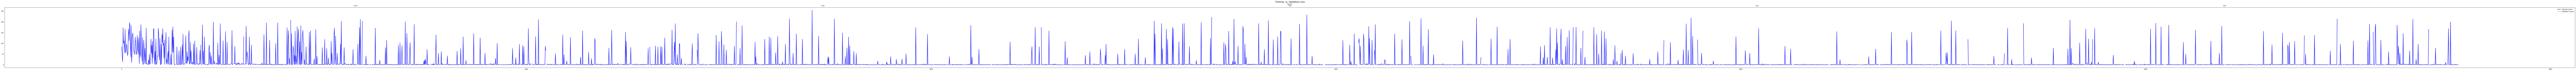

In [9]:
fig = plt.figure(figsize=(256, 6))
line_weight = 3
alpha = .8
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twiny()
lns1 = ax1.plot(train_losses, color='blue', lw=line_weight, alpha=alpha, label='Training Losses')
lns2 = ax2.plot(val_losses, color='orange', lw=line_weight, alpha=alpha, label='Validation Losses')
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper right')
plt.title('Training- vs. Validation-Loss', fontsize=15)
plt.ylabel('Modified LAD-Loss')
plt.xlabel('Epochs')
plt.show()

In [18]:
plot_heatmaps = False
write_output = True
def test():
    test_loss = 0
    iteration = 0
    num_test_samples = 300
    with torch.no_grad():
        for idx, (test_inputs, test_labels) in enumerate(dataloaders['val']):
            if idx >= num_test_samples:
                break
            else:
                output = net(torch.from_numpy(np.array(test_inputs)).to(device))
                test_labels = np.divide(test_labels, np.sum(np.array(test_labels)))
                loss = loss_fn(output[0].cpu(), torch.from_numpy(np.array(test_labels)[0][0]).cpu())*(distance(output[0].cpu().detach().numpy(), np.array(test_labels)[0][0])/4)
                test_loss += loss
                if write_output:
                    FileName2 = f'Data/FramesMovie/frames-%04d.png' % iteration
                    FileName = f'Data/OutputMovie/output-%04d.png' % iteration
                    cv2.imwrite(FileName2, np.float32(test_inputs[0][0]) * 255)
                    cv2.imwrite(FileName, np.float32(output.cpu()[0]) * 15000)
                if plot_heatmaps:
                    fig = plt.figure(figsize = (32,24))
                    ax1 = fig.add_subplot(2, 2, 1)
                    ax1.set_title('Output')
                    ax2 = fig.add_subplot(2, 2, 2)
                    ax2.set_title('Label')
                    sns.heatmap(output[0].cpu().detach().numpy(),ax=ax1, square=True, cbar_kws={'shrink': .8})
                    sns.heatmap(test_labels[0][0], ax=ax2, square=True, cbar_kws={'shrink': .8})
                    plt.show()
                iteration += 1
        
        test_loss = test_loss/num_test_samples
        print('Average test loss: ' ,test_loss.numpy())
        print('Testing completed')
test()

Average test loss:  2.7147171
Testing completed
